In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import numpy as np
import calendar

# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns
import squarify
import plotly.express as px

import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
from IPython.display import display

from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score


import statsmodels.api as sm

# Описание

   **Набор данных о ценах и объемах реализации продуктовых товаров и горюче-смазочных материалов в субъектах Российской Федерации по данным контрольно-кассовой техники. (Цены и объемы реализации продуктовых товаров и ГСМ в субъектах РФ (по данным ККТ)**

In [ ]:
url = 'https://www.nalog.gov.ru/opendata/7707329152-fnsprice/'
response = requests.get(url)
table = pd.read_html(response.text)
table[0]

№                                     Характеристика  \
0    1                            Идентификационный номер   
1    2                         Наименование набора данных   
2    3                             Описание набора данных   
3    4                             Владелец набора данных   
4    5                                 Ответственное лицо   
5    6                        Телефон ответственного лица   
6    7        Адрес электронной почты ответственного лица   
7    8                         Гиперссылка (URL) на набор   
8    9                                      Формат данных   
9   10                   Описание структуры набора данных   
10  11               Дата первой публикации набора данных   
11  12                 Дата последнего внесения изменений   
12  13                    Содержание последнего изменения   
13  14                                  Дата актуальности   
14  15  Ключевые слова, соответствующие содержанию наб...   
15  16  Гиперссылки (URL) на предыдущие релизы набора ...   
16  17  Гиперссылки (URL) на предыдущие версии структу...   
17  18                   Версия методических рекомендаций   

                              Значение характеристики  
0                                 7707329152-fnsprice  
1   Сведения о ценах и объемах реализации продукто...  
2   Набор содержит сведения о ежедневных средних ц...  
3                                         ФНС России.  
4   Перунов Владимир Андреевич Начальник отдела ан...  
5        8-495-913-03-17 8-495-913-00-00 (доб. 13-17)  
6                               v.perunov@tax.gov.ru.  
7   https://data.nalog.ru/opendata/7707329152-fnsp...  
8                                                 csv  
9   https://data.nalog.ru/opendata/7707329152-fnsp...  
10                                         31.08.2021  
11                                         31.03.2022  
12            Дополнение набора данными по 31.03.2022  
13                                         31.03.2022  
14  Цены, продукты питания, ГСМ, потребительская к...  
15  https://data.nalog.ru/opendata/7707329152-fnsp...  
16  https://data.nalog.ru/opendata/7707329152-fnsp...  
17                                                3.0

# <h1><font color='red'>Загрузка и обработка исходных данных
</font></h1>

In [ ]:
data = pd.read_csv('https://data.nalog.ru/opendata/7707329152-fnsprice/data-20220331-structure-20220331.csv',sep=';')
data

GA           GB           G1          G2      G3      G4     G5  \
0        1  79000000000  79000000000  01.01.2019    78,7  100,38  63,13   
1        1  79000000000  79000000000  02.01.2019   73,12   99,71  62,77   
2        1  79000000000  79000000000  03.01.2019    67,2   85,43  62,87   
3        1  79000000000  79000000000  04.01.2019   70,38   90,51  62,99   
4        1  79000000000  79000000000  05.01.2019   67,91   90,79  62,91   
...     ..          ...          ...         ...     ...     ...    ...   
100805  92  67000000000  67000000000  27.03.2022  139,99  145,64  69,04   
100806  92  67000000000  67000000000  28.03.2022  142,69   139,8  69,89   
100807  92  67000000000  67000000000  29.03.2022  140,19  150,72  69,35   
100808  92  67000000000  67000000000  30.03.2022  129,46  144,03  69,06   
100809  92  67000000000  67000000000  31.03.2022  135,49   140,9   69,6   

           G6      G7      G8  ...      G68      G69    G70    G71    G72  \
0       38,17   79,36   46,87  ...   965,95     1842  42,96  46,87   50,2   
1       34,35   75,87   47,23  ...  3754,26  6073,27  42,98  46,92   50,3   
2       32,04   72,45   63,65  ...  5249,03  7307,13  41,13  46,86  50,77   
3       31,59   68,59   45,04  ...  6322,01   7700,3  43,31  47,34  50,74   
4       31,09   74,41   48,43  ...  7170,37     9070  43,34  47,41  50,35   
...       ...     ...     ...  ...      ...      ...    ...    ...    ...   
100805  52,57  114,81  102,25  ...   6705,5  5543,33   51,1  55,91  64,76   
100806  53,56  106,04   98,04  ...  7251,28  5306,96  51,07  56,05  64,58   
100807   51,5  105,67   94,97  ...  7032,49  5848,94  51,05  56,12  64,62   
100808  50,66  110,22  102,48  ...   6435,3  5613,75  51,32   56,1  64,58   
100809  52,16  124,16   97,14  ...  7029,79  5378,47  51,25  56,09  64,58   

          G73        G74        G75      G76       G77  
0       45,53  103778,69   56968,84   121,19  13973,49  
1       45,38  185820,84  119512,26    95,09   39283,9  
2       45,46  219913,38  126519,19   107,82  45498,67  
3       45,99   204939,7  119111,97   126,87  50337,48  
4       46,03  213400,81  120972,52    75,22  52357,29  
...       ...        ...        ...      ...       ...  
100805  57,82    23036,5   41288,85   864,99  10340,68  
100806  57,58   31370,96   46514,32  1011,73  15512,08  
100807   57,9   38191,88   62470,95  1272,65  22398,62  
100808   57,8   38824,89   64664,49  1035,95   24210,3  
100809  57,89   39932,33   67705,11  1463,04  25034,82  

[100810 rows x 79 columns]

In [ ]:
# описание
description = pd.read_csv('https://data.nalog.ru/opendata/7707329152-fnsprice/structure-20220331.csv', sep=';')

In [ ]:
description.head()

The name of the set  \
0  Сведения о ценах и объемах реализации продукто...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  The relevance of the data  Unit of measure  Id  \
0          as of 31.03.2022  thousand rubles  GA   
1                       NaN              NaN  GB   
2                       NaN              NaN  G1   
3                       NaN              NaN  G2   
4                       NaN              NaN  G3   

                           Field name English name  \
0                     Дата наблюдения       region   
1  Код региона в кодировке ФНС России        oktmo   
2                    ОКАТО региона РФ        okato   
3                    ОКТМО региона РФ         date   
4                            Макароны        pasta   

                          Description unit of measurement     field Type  \
0                     Дата наблюдения          ДД.ММ.ГГГГ   (dd.mm.yyyy)   
1  Код региона в кодировке ФНС России                 NaN         string   
2                    ОКАТО региона РФ                 NaN         string   
3                    ОКТМО региона РФ                 NaN         string   
4                            Макароны              руб/кг        numeric   

  unique obligatory        length  \
0    Yes        Yes  255 символов   
1     No         No   10 символов   
2     No         No   10 символов   
3     No         No   10 символов   
4     No         No   10 символов   

   Number of characters after the decimal point  
0                                           NaN  
1                                         10.00  
2                                         10.00  
3                                         10.00  
4                                         10.00

In [ ]:
description.columns

Index(['The name of the set', 'The relevance of the data', 'Unit of measure',
       'Id', 'Field name', 'English name', 'Description',
       'unit of measurement', 'field Type', 'unique', 'obligatory', 'length',
       'Number of characters after the decimal point'],
      dtype='object')

In [ ]:
description['Description'].unique()

array(['Дата наблюдения', 'Код региона в кодировке ФНС России',
       'ОКАТО региона РФ', 'ОКТМО региона РФ', 'Макароны', 'Бобовые ',
       'Хлеб', 'Мука', 'Рис', 'Другие крупы ', 'Картофель ',
       'Огурцы и помидоры', 'Прочие овощи ', 'Столовые корнеплоды ',
       'Капуста', 'Фрукты', 'Сахар ', 'Конфеты ', 'Печенье ', 'Баранина ',
       'Говядина', 'Мясо птицы', 'Свинина ', 'Рыба свеж ', 'Сельдь ',
       'Творог ', 'Сметана ', 'Масло сливочное ', 'Молоко кефир ', 'Сыр ',
       'Яйца ', 'Маргарин и другие жиры ', 'Масло раститительное ',
       'Соль ', 'Специи ', 'Чай ',
       'Стоимость потребительской корзины для трудоспособных граждан',
       'Стоимость потребительской корзины для пенсионеров ',
       'Стоимость потребительской корзины для детей до 18 лет',
       'Макароны (Объем проданной продукции)',
       '(Объем проданной продукции)', 'Хлеб (Объем проданной продукции)',
       'Мука  (Объем проданной продукции)',
       'Рис (Объем проданной продукции)',
       'Д

<font color='green'>описание столбцов на русском не совсем совпадает с данными

In [ ]:
description['English name'].unique()

array(['region', 'oktmo', 'okato', 'date', 'pasta', 'legumes', 'bread',
       'flour', 'rice', 'groats', 'potatoes', 'cucumber', 'vegetable',
       'roots', 'cabbage', 'fruit', 'sugar', 'candy', 'biscuits',
       'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
       'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg',
       'margarine', 'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2',
       'cpi_3', 'pasta_value', 'legumes_value', 'bread_value',
       'flour_value', 'rice_value', 'groats_value', 'potatoes_value',
       'cucumber_value', 'vegetable_value', 'roots_value',
       'cabbage_value', 'fruit_value', 'sugar_value', 'candy_value',
       'biscuits_value', 'mutton_value', 'beef_value', 'chicken_value',
       'pork_value', 'fish_value', 'herring_value', 'curd_value',
       'sour_creame_value', 'butter_value', 'milk_kefir_value',
       'cheese_value', 'egg_value', 'margarine_value', 'oil_value',
       'salt_value', 'spice_value', 'tea_value', 'ai92', 

In [ ]:
# создаю список из названий колонок, чтобы при чтении файла сразу их задать
cols_name = description['English name'].unique()

In [ ]:
fnsprice = pd.read_csv('https://data.nalog.ru/opendata/7707329152-fnsprice/data-20220331-structure-20220331.csv',\
                       sep=';', names=cols_name, low_memory=False, skiprows=1, decimal=',')

In [ ]:
fnsprice.head(5)

region        oktmo        okato        date  pasta  legumes  bread  flour  \
0       1  79000000000  79000000000  01.01.2019  78.70   100.38  63.13  38.17   
1       1  79000000000  79000000000  02.01.2019  73.12    99.71  62.77  34.35   
2       1  79000000000  79000000000  03.01.2019  67.20    85.43  62.87  32.04   
3       1  79000000000  79000000000  04.01.2019  70.38    90.51  62.99  31.59   
4       1  79000000000  79000000000  05.01.2019  67.91    90.79  62.91  31.09   

   rice  groats  ...  spice_value  tea_value  ai92  ai95  ai98    dt  \
0 79.36   46.87  ...       965.95    1842.00 42.96 46.87 50.20 45.53   
1 75.87   47.23  ...      3754.26    6073.27 42.98 46.92 50.30 45.38   
2 72.45   63.65  ...      5249.03    7307.13 41.13 46.86 50.77 45.46   
3 68.59   45.04  ...      6322.01    7700.30 43.31 47.34 50.74 45.99   
4 74.41   48.43  ...      7170.37    9070.00 43.34 47.41 50.35 46.03   

   ai92_value  ai95_value  ai98_value  dt_value  
0   103778.69    56968.84      121.19  13973.49  
1   185820.84   119512.26       95.09  39283.90  
2   219913.38   126519.19      107.82  45498.67  
3   204939.70   119111.97      126.87  50337.48  
4   213400.81   120972.52       75.22  52357.29  

[5 rows x 79 columns]

In [ ]:
fnsprice.isnull().mean()

region       0.00
oktmo        0.00
okato        0.00
date         0.00
pasta        0.00
             ... 
dt           0.00
ai92_value   0.00
ai95_value   0.00
ai98_value   0.00
dt_value     0.00
Length: 79, dtype: float64

In [ ]:
fnsprice.dtypes

region          int64
oktmo           int64
okato           int64
date           object
pasta         float64
               ...   
dt            float64
ai92_value    float64
ai95_value    float64
ai98_value    float64
dt_value      float64
Length: 79, dtype: object

In [ ]:
# преобразую дату
fnsprice['date'] = pd.to_datetime(fnsprice['date'], format='%d.%m.%Y')

##<h1><font color='orange'>Расшифровка кодов региона


In [ ]:
# беру данные с сайта Консультант
url = f'https://www.consultant.ru/document/cons_doc_LAW_362347/fbd1cbdda52afdf022ea839e1da784599284b641/'
table = pd.read_html(url)
code_regions = pd.DataFrame(table[0])
code_regions

0                                                  1
0   Код                                       Наименование
1    01                         Республика Адыгея (Адыгея)
2    02                            Республика Башкортостан
3    03                                 Республика Бурятия
4    04                                   Республика Алтай
..  ...                                                ...
82   87                         Чукотский автономный округ
83   89                    Ямало-Ненецкий автономный округ
84   91                                    Республика Крым
85   92                                     г. Севастополь
86   99  Иные территории, включая город и космодром Бай...

[87 rows x 2 columns]

In [ ]:
code_regions.columns = ['Код', 'Наименование']
code_regions.drop(0, inplace=True)
code_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 1 to 86
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Код           86 non-null     object
 1   Наименование  86 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [ ]:
code_regions['Код'] = code_regions['Код'].astype('int64')

In [ ]:
# соединяю датафреймы, чтобы добавить название региона
fnsprice = fnsprice.merge(code_regions, how='left', left_on='region', right_on='Код')

In [ ]:
fnsprice = fnsprice.rename(columns={'Наименование':'region_name'})

In [ ]:
col = fnsprice.pop('region_name')
fnsprice.insert(1, 'region_name', col)

In [ ]:
fnsprice.drop('Код', axis=1, inplace=True)

In [ ]:
fnsprice.head(5)

region                 region_name        oktmo        okato       date  \
0       1  Республика Адыгея (Адыгея)  79000000000  79000000000 2019-01-01   
1       1  Республика Адыгея (Адыгея)  79000000000  79000000000 2019-01-02   
2       1  Республика Адыгея (Адыгея)  79000000000  79000000000 2019-01-03   
3       1  Республика Адыгея (Адыгея)  79000000000  79000000000 2019-01-04   
4       1  Республика Адыгея (Адыгея)  79000000000  79000000000 2019-01-05   

   pasta  legumes  bread  flour  rice  ...  spice_value  tea_value  ai92  \
0  78.70   100.38  63.13  38.17 79.36  ...       965.95    1842.00 42.96   
1  73.12    99.71  62.77  34.35 75.87  ...      3754.26    6073.27 42.98   
2  67.20    85.43  62.87  32.04 72.45  ...      5249.03    7307.13 41.13   
3  70.38    90.51  62.99  31.59 68.59  ...      6322.01    7700.30 43.31   
4  67.91    90.79  62.91  31.09 74.41  ...      7170.37    9070.00 43.34   

   ai95  ai98    dt  ai92_value  ai95_value  ai98_value  dt_value  
0 46.87 50.20 45.53   103778.69    56968.84      121.19  13973.49  
1 46.92 50.30 45.38   185820.84   119512.26       95.09  39283.90  
2 46.86 50.77 45.46   219913.38   126519.19      107.82  45498.67  
3 47.34 50.74 45.99   204939.70   119111.97      126.87  50337.48  
4 47.41 50.35 46.03   213400.81   120972.52       75.22  52357.29  

[5 rows x 80 columns]

##<h1><font color='orange'>Группировка регионов по федеральным округам.

Данные взяты с сайта Росстата https://rosstat.gov.ru/compendium/document/13282

In [ ]:
district = {'Центральный': [31, 32, 33, 36, 37, 40, 44, 46, 48, 50, 57, 62, 67, 68, 69, 71, 76, 77],
      'Северо-Западный': [10, 11, 83, 29, 35, 39, 47, 51, 53, 60, 78],
      'Южный': [1, 8, 91, 23, 30, 34, 61, 92], 'Северо-Кавказский': [5, 6, 7, 9, 15, 20, 26],
      'Приволжский': [2, 12, 13, 16, 18, 21, 59, 43, 52, 56, 58, 63, 64, 73], 'Уральский': [45, 66, 86, 89, 72, 74],
      'Сибирский': [4, 17, 19, 22, 24, 38, 42, 54, 55, 70], 'Дальневосточный': [3, 14, 75, 41, 25, 27, 28, 49, 65, 79, 87]}

In [ ]:
def get_name_district(region_code):
    for key, val in district.items():
        if region_code in val:
           return key

In [ ]:
fnsprice['district'] = fnsprice['region'].apply(get_name_district)
col = fnsprice.pop('district')
fnsprice.insert(2, 'district', col)

##<h1><font color='orange'>Единицы измерения

In [ ]:
description['unit of measurement'].unique()

array(['ДД.ММ.ГГГГ', nan, 'руб/кг', 'руб/л', 'руб/шт', 'руб', 'кг', 'л',
       'шт', 'руб/литр', 'литр'], dtype=object)

In [ ]:
measurements = description.pivot_table(index='English name', values='unit of measurement', aggfunc='first').reset_index()
measurements

English name unit of measurement
0              ai92            руб/литр
1        ai92_value                литр
2              ai95            руб/литр
3        ai95_value                литр
4              ai98            руб/литр
..              ...                 ...
71      sugar_value                  кг
72              tea              руб/шт
73        tea_value                  шт
74        vegetable              руб/кг
75  vegetable_value                  кг

[76 rows x 2 columns]

In [ ]:
# Есть группы, единицы которых по размерности сильно отличаются от большинства
measurements[measurements['unit of measurement'] == 'шт']

English name unit of measurement
32    egg_value                  шт
69  spice_value                  шт
73    tea_value                  шт

In [ ]:
measurements.isnull().sum()

English name           0
unit of measurement    0
dtype: int64

##<h1><font color='orange'>Подготовка данных по продуктам

In [ ]:
# убираю колонки с гсм
food = fnsprice.drop(fnsprice.columns[-8:], axis=1)

In [ ]:
food.head(5)

region                 region_name district        oktmo        okato  \
0       1  Республика Адыгея (Адыгея)    Южный  79000000000  79000000000   
1       1  Республика Адыгея (Адыгея)    Южный  79000000000  79000000000   
2       1  Республика Адыгея (Адыгея)    Южный  79000000000  79000000000   
3       1  Республика Адыгея (Адыгея)    Южный  79000000000  79000000000   
4       1  Республика Адыгея (Адыгея)    Южный  79000000000  79000000000   

        date  pasta  legumes  bread  flour  ...  sour_creame_value  \
0 2019-01-01  78.70   100.38  63.13  38.17  ...             320.84   
1 2019-01-02  73.12    99.71  62.77  34.35  ...            1162.37   
2 2019-01-03  67.20    85.43  62.87  32.04  ...            2985.69   
3 2019-01-04  70.38    90.51  62.99  31.59  ...            3237.12   
4 2019-01-05  67.91    90.79  62.91  31.09  ...            3193.21   

   butter_value  milk_kefir_value  cheese_value  egg_value  margarine_value  \
0        114.66           4028.87        342.37    8341.00             0.00   
1        482.12          13548.66       1249.10   30368.00           472.63   
2        940.51          28252.46       1909.07   39458.00           647.50   
3       1054.73          30873.46       2329.84   60577.72           457.64   
4       1552.76          26868.51       2641.69   72589.00           266.31   

   oil_value  salt_value  spice_value  tea_value  
0     754.79        0.00       965.95    1842.00  
1    1698.41     1496.71      3754.26    6073.27  
2    2746.81     2191.28      5249.03    7307.13  
3    3407.63     2161.41      6322.01    7700.30  
4    3499.26     2413.64      7170.37    9070.00  

[5 rows x 73 columns]

In [ ]:
food.columns

Index(['region', 'region_name', 'district', 'oktmo', 'okato', 'date', 'pasta',
       'legumes', 'bread', 'flour', 'rice', 'groats', 'potatoes', 'cucumber',
       'vegetable', 'roots', 'cabbage', 'fruit', 'sugar', 'candy', 'biscuits',
       'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
       'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg', 'margarine',
       'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2', 'cpi_3', 'pasta_value',
       'legumes_value', 'bread_value', 'flour_value', 'rice_value',
       'groats_value', 'potatoes_value', 'cucumber_value', 'vegetable_value',
       'roots_value', 'cabbage_value', 'fruit_value', 'sugar_value',
       'candy_value', 'biscuits_value', 'mutton_value', 'beef_value',
       'chicken_value', 'pork_value', 'fish_value', 'herring_value',
       'curd_value', 'sour_creame_value', 'butter_value', 'milk_kefir_value',
       'cheese_value', 'egg_value', 'margarine_value', 'oil_value',
       'salt_value', 'spice_value', '

In [ ]:
food_price = food.copy()
food_price = food_price[['region', 'region_name', 'district', 'date','pasta',
        'legumes', 'bread', 'flour', 'rice', 'groats', 'potatoes', 'cucumber',
         'vegetable', 'roots', 'cabbage', 'fruit', 'sugar', 'candy', 'biscuits',
        'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
        'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg', 'margarine',
         'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2', 'cpi_3']]

In [ ]:
food_price.head()

region                 region_name district       date  pasta  legumes  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01  78.70   100.38   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02  73.12    99.71   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03  67.20    85.43   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04  70.38    90.51   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05  67.91    90.79   

   bread  flour  rice  groats  ...  cheese  egg  margarine   oil  salt  spice  \
0  63.13  38.17 79.36   46.87  ...  522.82 7.83       0.00 81.21  0.00  39.43   
1  62.77  34.35 75.87   47.23  ...  486.92 7.82     104.56 90.76 27.57  33.92   
2  62.87  32.04 72.45   63.65  ...  482.70 7.78     106.36 82.92 21.56  32.47   
3  62.99  31.59 68.59   45.04  ...  456.04 7.27     104.67 81.77 19.61  30.99   
4  62.91  31.09 74.41   48.43  ...  457.03 7.30     103.32 79.78 22.68  29.44   

    tea   cpi_1   cpi_2   cpi_3  
0 84.94 5023.51 4301.36 5001.97  
1 78.12 5086.32 4354.00 5064.53  
2 73.09 4930.56 4214.30 4911.48  
3 73.11 4750.81 4061.60 4719.68  
4 65.68 4811.02 4113.07 4736.88  

[5 rows x 39 columns]

In [ ]:
food_price = food_price.rename(columns={'cpi_1' : 'cpi_working', 'cpi_2' : 'cpi_retiree', 'cpi_3' : 'cpi_minor' })

<font color='green'>Данная таблица неудобна тем,что она широкая, приведу в нужный мне вид



In [ ]:
food_price = food_price.melt(id_vars=['region',	'region_name',	'district',	'date', 'cpi_working', 'cpi_retiree', 'cpi_minor'],
                             var_name='category', value_name='price_per_unit')
food_price.head()

region                 region_name district       date  cpi_working  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01      5023.51   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02      5086.32   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03      4930.56   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04      4750.81   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05      4811.02   

   cpi_retiree  cpi_minor category  price_per_unit  
0      4301.36    5001.97    pasta           78.70  
1      4354.00    5064.53    pasta           73.12  
2      4214.30    4911.48    pasta           67.20  
3      4061.60    4719.68    pasta           70.38  
4      4113.07    4736.88    pasta           67.91

<font color='green'>Сделаю тоже самое для количества

In [ ]:
fnsprice.columns

Index(['region', 'region_name', 'district', 'oktmo', 'okato', 'date', 'pasta',
       'legumes', 'bread', 'flour', 'rice', 'groats', 'potatoes', 'cucumber',
       'vegetable', 'roots', 'cabbage', 'fruit', 'sugar', 'candy', 'biscuits',
       'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
       'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg', 'margarine',
       'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2', 'cpi_3', 'pasta_value',
       'legumes_value', 'bread_value', 'flour_value', 'rice_value',
       'groats_value', 'potatoes_value', 'cucumber_value', 'vegetable_value',
       'roots_value', 'cabbage_value', 'fruit_value', 'sugar_value',
       'candy_value', 'biscuits_value', 'mutton_value', 'beef_value',
       'chicken_value', 'pork_value', 'fish_value', 'herring_value',
       'curd_value', 'sour_creame_value', 'butter_value', 'milk_kefir_value',
       'cheese_value', 'egg_value', 'margarine_value', 'oil_value',
       'salt_value', 'spice_value', '

In [ ]:
food_quantity = fnsprice[['region',	'region_name',	'district',	'date', 'pasta_value',
       'legumes_value', 'bread_value', 'flour_value', 'rice_value',
       'groats_value', 'potatoes_value', 'cucumber_value', 'vegetable_value',
       'roots_value', 'cabbage_value', 'fruit_value', 'sugar_value',
       'candy_value', 'biscuits_value', 'mutton_value', 'beef_value',
       'chicken_value', 'pork_value', 'fish_value', 'herring_value',
       'curd_value', 'sour_creame_value', 'butter_value', 'milk_kefir_value',
       'cheese_value', 'egg_value', 'margarine_value', 'oil_value',
       'salt_value', 'spice_value', 'tea_value']]

In [ ]:
food_quantity = food_quantity.melt(id_vars=['region',	'region_name',	'district',	'date'], var_name='category', value_name='quantity')
food_quantity.head()

region                 region_name district       date     category  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01  pasta_value   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02  pasta_value   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03  pasta_value   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04  pasta_value   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05  pasta_value   

   quantity  
0   1191.69  
1   3726.69  
2   6012.31  
3   5886.43  
4   9694.22

In [ ]:
 food_price.shape, food_quantity.shape

((3225920, 9), (3225920, 6))

In [ ]:
# Соединяю в итоговый датафрейм
food_sales = pd.merge(food_price, food_quantity.drop(columns=['region',	'region_name',	'district',	'date',	'category']),
                      left_index=True, right_index=True)

In [ ]:
food_sales.head()

region                 region_name district       date  cpi_working  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01      5023.51   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02      5086.32   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03      4930.56   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04      4750.81   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05      4811.02   

   cpi_retiree  cpi_minor category  price_per_unit  quantity  
0      4301.36    5001.97    pasta           78.70   1191.69  
1      4354.00    5064.53    pasta           73.12   3726.69  
2      4214.30    4911.48    pasta           67.20   6012.31  
3      4061.60    4719.68    pasta           70.38   5886.43  
4      4113.07    4736.88    pasta           67.91   9694.22

In [ ]:
#  добавляю колонку с суммой продаж в рублях

food_sales['total_sales'] = food_sales['price_per_unit'] * food_sales['quantity']

In [ ]:
col = food_sales.pop('quantity')
food_sales.insert(8, 'quantity', col)

In [ ]:
# Добавляю единицы измерения в итоговые данные
measurements['English name'].values

array(['ai92', 'ai92_value', 'ai95', 'ai95_value', 'ai98', 'ai98_value',
       'beef', 'beef_value', 'biscuits', 'biscuits_value', 'bread',
       'bread_value', 'butter', 'butter_value', 'cabbage',
       'cabbage_value', 'candy', 'candy_value', 'cheese', 'cheese_value',
       'chicken', 'chicken_value', 'cpi_1', 'cpi_2', 'cpi_3', 'cucumber',
       'cucumber_value', 'curd', 'curd_value', 'dt', 'dt_value', 'egg',
       'egg_value', 'fish', 'fish_value', 'flour', 'flour_value', 'fruit',
       'fruit_value', 'groats', 'groats_value', 'herring',
       'herring_value', 'legumes', 'legumes_value', 'margarine',
       'margarine_value', 'milk_kefir', 'milk_kefir_value', 'mutton',
       'mutton_value', 'oil', 'oil_value', 'pasta', 'pasta_value', 'pork',
       'pork_value', 'potatoes', 'potatoes_value', 'region', 'rice',
       'rice_value', 'roots', 'roots_value', 'salt', 'salt_value',
       'sour_creame', 'sour_creame_value', 'spice', 'spice_value',
       'sugar', 'sugar_value', 't

In [ ]:
measurements.head()

English name unit of measurement
0         ai92            руб/литр
1   ai92_value                литр
2         ai95            руб/литр
3   ai95_value                литр
4         ai98            руб/литр

In [ ]:
unit = measurements[measurements['English name'].map(lambda x: x.endswith('_value'))]

unit['English name'] = unit['English name'].str.replace('_value', '')

<ipython-input-48-3ea53368b78b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit['English name'] = unit['English name'].str.replace('_value', '')


In [ ]:
unit.head(3)

English name unit of measurement
1         ai92                литр
3         ai95                литр
5         ai98                литр

In [ ]:
food_sales = pd.merge(food_sales, unit, how='left', left_on='category', right_on='English name')

In [ ]:
food_sales = food_sales.drop(columns='English name')
food_sales = food_sales.rename(columns={'unit of measurement': 'unit'})
col = food_sales.pop('unit')
food_sales.insert(8, 'unit', col)
food_sales.head()

region                 region_name district       date  cpi_working  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01      5023.51   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02      5086.32   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03      4930.56   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04      4750.81   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05      4811.02   

   cpi_retiree  cpi_minor category unit  quantity  price_per_unit  total_sales  
0      4301.36    5001.97    pasta   кг   1191.69           78.70     93786.00  
1      4354.00    5064.53    pasta   кг   3726.69           73.12    272495.57  
2      4214.30    4911.48    pasta   кг   6012.31           67.20    404027.23  
3      4061.60    4719.68    pasta   кг   5886.43           70.38    414286.94  
4      4113.07    4736.88    pasta   кг   9694.22           67.91    658334.48

In [ ]:
food_sales.isna().mean()

region           0.00
region_name      0.00
district         0.00
date             0.00
cpi_working      0.00
cpi_retiree      0.00
cpi_minor        0.00
category         0.00
unit             0.00
quantity         0.00
price_per_unit   0.00
total_sales      0.00
dtype: float64

# <h1><font color='red'>Датафрейм food_sales_kg по весовому товару

<font color='green'>Для удобства сохранила итоговый датафрейм в файл csv на гугл диск

In [ ]:
! gdown --id 1FiYKGaocdM2wmC6wiaW7FRfxf55wM1wX

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FiYKGaocdM2wmC6wiaW7FRfxf55wM1wX
To: /content/food_sales.csv
100% 453M/453M [00:05<00:00, 86.7MB/s]


In [ ]:
food_sales = pd.read_csv('/content/food_sales.csv')

In [ ]:
food_sales.head()

region                 region_name district        date  cpi_working  \
0       1  Республика Адыгея (Адыгея)    Южный  2019-01-01      5023.51   
1       1  Республика Адыгея (Адыгея)    Южный  2019-01-02      5086.32   
2       1  Республика Адыгея (Адыгея)    Южный  2019-01-03      4930.56   
3       1  Республика Адыгея (Адыгея)    Южный  2019-01-04      4750.81   
4       1  Республика Адыгея (Адыгея)    Южный  2019-01-05      4811.02   

   cpi_retiree  cpi_minor category unit  quantity  price_per_unit  total_sales  
0      4301.36    5001.97    pasta   кг   1191.69           78.70     93786.00  
1      4354.00    5064.53    pasta   кг   3726.69           73.12    272495.57  
2      4214.30    4911.48    pasta   кг   6012.31           67.20    404027.23  
3      4061.60    4719.68    pasta   кг   5886.43           70.38    414286.94  
4      4113.07    4736.88    pasta   кг   9694.22           67.91    658334.48

In [ ]:
food_sales.dtypes

region              int64
region_name        object
district           object
date               object
cpi_working       float64
cpi_retiree       float64
cpi_minor         float64
category           object
unit               object
quantity          float64
price_per_unit    float64
total_sales       float64
dtype: object

In [ ]:
food_sales['date'] = pd.to_datetime(food_sales['date'], format='%Y.%m.%d')

In [ ]:
food_sales.isna().sum()

region            0
region_name       0
district          0
date              0
cpi_working       0
cpi_retiree       0
cpi_minor         0
category          0
unit              0
quantity          0
price_per_unit    0
total_sales       0
dtype: int64

In [ ]:
# извлекаю месяц и год из даты
food_sales['month_year'] = food_sales['date'].dt.strftime('%Y-%m')
food_sales['month_year'] = pd.to_datetime(food_sales['month_year'], format='%Y-%m')

# <h1><font color='red'>Очистка данных

In [ ]:
food_sales.describe()

region  cpi_working  cpi_retiree  cpi_minor    quantity  \
count 3225920.00   3225920.00   3225920.00 3225920.00  3225920.00   
mean       43.39      5727.31      4878.93    5748.07    41024.84   
std        25.20      1374.11      1161.58    1474.76   175928.86   
min         1.00         0.00         0.00       0.00    -9218.87   
25%        22.00      4953.20      4225.49    4963.04     2230.00   
50%        43.00      5493.48      4680.69    5481.58     9519.76   
75%        64.00      6206.66      5282.12    6162.02    27978.28   
max        92.00     20292.65     16722.40   19410.61 10906878.00   

       price_per_unit  total_sales  
count      3225920.00   3225920.00  
mean           148.16   2687018.99  
std            158.40   6469416.82  
min              0.00  -2615456.23  
25%             40.22    237234.31  
50%             84.12    883240.24  
75%            216.61   2661310.09  
max          39685.51 507514938.91

*   <font color='green'>Сильный разброс между минимильными и максимальными значениями
*   Отрицательное значение по полю quantity
*   Максимальное значение по полю quantity, скорее всего, в штуках
*   Аномальное максимальное значение цены за единицу измерения
*   0 в минимальном значении может говорить об отсутствии данных по каким-то регионам

##<h1><font color='orange'>CPI

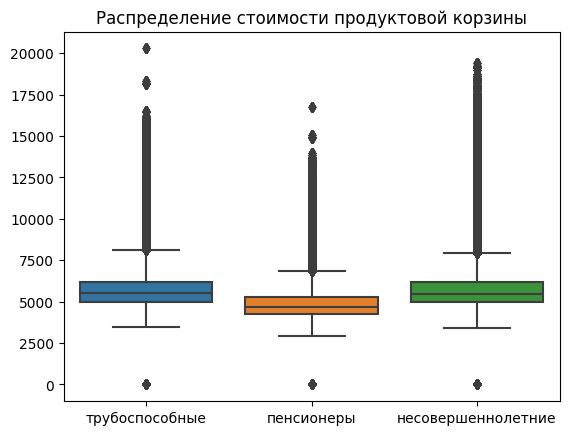

In [ ]:
sns.boxplot([food_sales['cpi_working'], food_sales['cpi_retiree'], food_sales['cpi_minor']])
plt.gca().set_xticklabels(['трубоспособные', 'пенсионеры', 'несовершеннолетние'])
plt.title('Распределение стоимости продуктовой корзины')
plt.show()

<font color='green'>Распределение ненормальное, длинные хвосты справа, выбросы.

In [ ]:
# Выбросы в cpi

# для трудоспособного населения
q1 = food_sales['cpi_working'].quantile(0.25)
q3 = food_sales['cpi_working'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
cpi_working_outliers = [x for x in food_sales['cpi_working'] if x < lower_bound or x > upper_bound]

# для пенсионеров
q1 = food_sales['cpi_retiree'].quantile(0.25)
q3 = food_sales['cpi_retiree'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
cpi_retiree_outliers = [x for x in food_sales['cpi_retiree'] if x < lower_bound or x > upper_bound]

# для несовершеннолетних
q1 = food_sales['cpi_minor'].quantile(0.25)
q3 = food_sales['cpi_minor'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
cpi_minor_outliers = [x for x in food_sales['cpi_minor'] if x < lower_bound or x > upper_bound]

In [ ]:
cpi_working_outliers = pd.DataFrame(cpi_working_outliers, columns=['working'])
cpi_retiree_outliers = pd.DataFrame(cpi_retiree_outliers, columns=['retiree'])
cpi_minor_outliers = pd.DataFrame(cpi_minor_outliers, columns=['minor'])

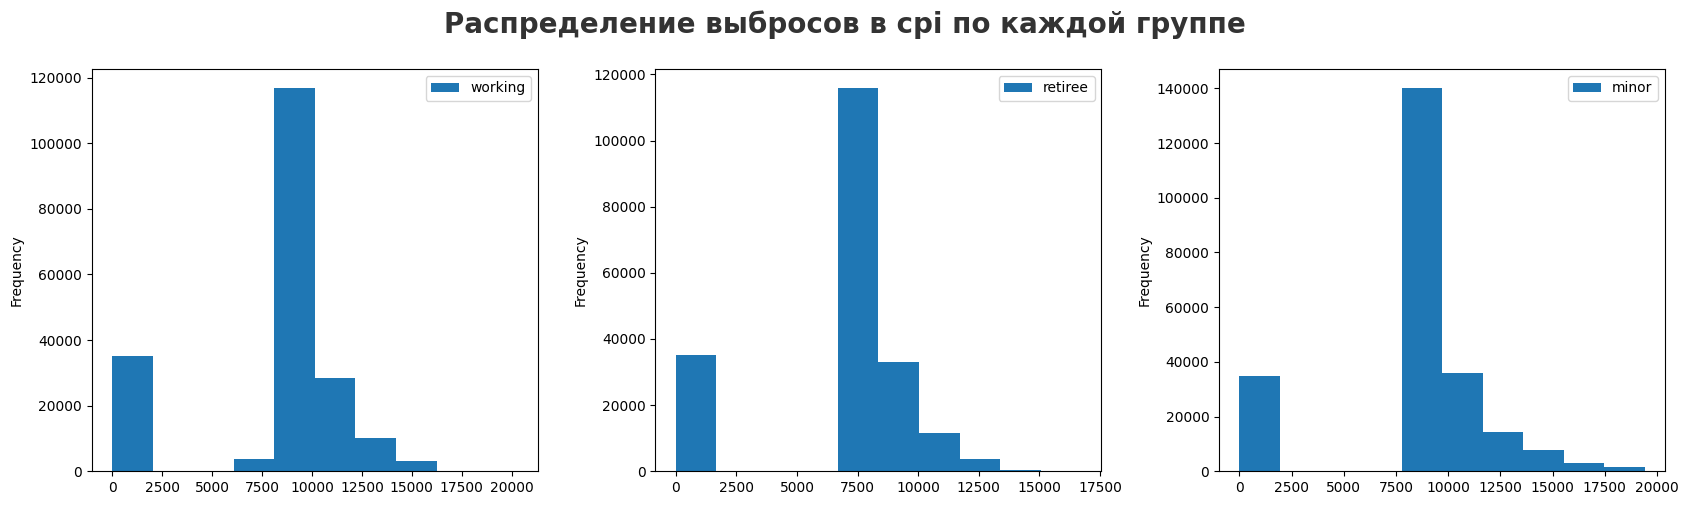

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
plt.suptitle('Распределение выбросов в cpi по каждой группе', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)
cpi_working_outliers.plot(kind='hist', ax=axs[0])
cpi_retiree_outliers.plot(kind='hist', ax=axs[1])
cpi_minor_outliers.plot(kind='hist', ax=axs[2])
plt.tight_layout()

plt.show()


<font color='green'>Во всех группах выбросы со значением примерно от 7500 до 15000 не являются аномальными и, скорее всего, такой эффект наблюдается из-за данных за неполный 2022 год. С помощью доверительных интервалов определю значениия ниже и выше которых нужно провести проверку на адекватность

In [ ]:
confidence_interval_working_outliers = cpi_working_outliers.quantile([0.025, 0.975])
confidence_interval_retiree_outliers = cpi_retiree_outliers.quantile([0.025, 0.975])
confidence_interval_minor_outliers = cpi_minor_outliers.quantile([0.025, 0.975])

confidence_interval = pd.merge(confidence_interval_working_outliers, confidence_interval_retiree_outliers,
                              left_index=True, right_index=True).merge(confidence_interval_minor_outliers,
                                                                       left_index=True, right_index=True)

confidence_interval

working  retiree    minor
0.03     0.00     0.00     0.00
0.97 13712.38 11568.76 15050.92

In [ ]:
food_sales[food_sales['cpi_working'] == 0][['region', 'region_name']].value_counts()

region  region_name         
6       Республика Ингушетия    35008
dtype: int64

In [ ]:
# низкие значения встречаются в одном регионе
region_6 = food_sales[food_sales['region'] == 6]
region_6

region           region_name           district       date  \
5930          6  Республика Ингушетия  Северо-Кавказский 2019-01-01   
5931          6  Республика Ингушетия  Северо-Кавказский 2019-01-02   
5932          6  Республика Ингушетия  Северо-Кавказский 2019-01-03   
5933          6  Республика Ингушетия  Северо-Кавказский 2019-01-04   
5934          6  Республика Ингушетия  Северо-Кавказский 2019-01-05   
...         ...                   ...                ...        ...   
3132221       6  Республика Ингушетия  Северо-Кавказский 2022-03-27   
3132222       6  Республика Ингушетия  Северо-Кавказский 2022-03-28   
3132223       6  Республика Ингушетия  Северо-Кавказский 2022-03-29   
3132224       6  Республика Ингушетия  Северо-Кавказский 2022-03-30   
3132225       6  Республика Ингушетия  Северо-Кавказский 2022-03-31   

         cpi_working  cpi_retiree  cpi_minor category unit  quantity  \
5930            0.00         0.00       0.00    pasta   кг      0.00   
5931            0.00         0.00       0.00    pasta   кг      0.00   
5932            0.00         0.00       0.00    pasta   кг      0.00   
5933            0.00         0.00       0.00    pasta   кг      0.00   
5934            0.00         0.00       0.00    pasta   кг      0.00   
...              ...          ...        ...      ...  ...       ...   
3132221      4576.87      3826.26    4828.99      tea   шт    236.00   
3132222      4611.63      3846.64    4886.41      tea   шт    262.00   
3132223      4652.08      3883.69    4928.90      tea   шт    281.00   
3132224      4598.93      3832.43    4859.55      tea   шт    320.00   
3132225      4616.53      3853.61    4850.34      tea   шт    262.00   

         price_per_unit  total_sales month_year  
5930               0.00         0.00 2019-01-01  
5931               0.00         0.00 2019-01-01  
5932               0.00         0.00 2019-01-01  
5933               0.00         0.00 2019-01-01  
5934               0.00         0.00 2019-01-01  
...                 ...          ...        ...  
3132221           87.40     20626.40 2022-03-01  
3132222           85.12     22301.44 2022-03-01  
3132223           76.80     21580.80 2022-03-01  
3132224           83.61     26755.20 2022-03-01  
3132225           79.93     20941.66 2022-03-01  

[37952 rows x 13 columns]

In [ ]:
region_6.groupby('month_year')[['cpi_working', 'cpi_retiree', 'cpi_minor','quantity', 'total_sales']].sum()

cpi_working  cpi_retiree  cpi_minor  quantity  total_sales
month_year                                                            
2019-01-01         0.00         0.00       0.00   3019.48    200573.55
2019-02-01         0.00         0.00       0.00   3759.26    267446.59
2019-03-01         0.00         0.00       0.00   2439.00    162474.60
2019-04-01         0.00         0.00       0.00   4081.83    280812.67
2019-05-01         0.00         0.00       0.00   2891.20    187759.69
2019-06-01         0.00         0.00       0.00   3363.00    233103.98
2019-07-01         0.00         0.00       0.00   1187.15     86358.75
2019-08-01         0.00         0.00       0.00   1862.36    151977.41
2019-09-01         0.00         0.00       0.00   1370.70    109987.92
2019-10-01         0.00         0.00       0.00   1464.64    105371.59
2019-11-01         0.00         0.00       0.00    597.00     35688.66
2019-12-01         0.00         0.00       0.00    716.96     48586.25
2020-01-01         0.00         0.00       0.00    406.00     24081.14
2020-02-01         0.00         0.00       0.00    274.00     16849.71
2020-03-01         0.00         0.00       0.00   1325.00     77477.79
2020-04-01         0.00         0.00       0.00      0.00         0.00
2020-05-01         0.00         0.00       0.00      0.00         0.00
2020-06-01         0.00         0.00       0.00      0.00         0.00
2020-07-01         0.00         0.00       0.00    428.00     24965.24
2020-08-01         0.00         0.00       0.00      0.00         0.00
2020-09-01         0.00         0.00       0.00   2166.67    162637.30
2020-10-01         0.00         0.00       0.00   2252.72    214566.42
2020-11-01         0.00         0.00       0.00      0.00         0.00
2020-12-01         0.00         0.00       0.00  23032.73   1451116.53
2021-01-01         0.00         0.00       0.00 220582.66  11654883.72
2021-02-01         0.00         0.00       0.00 154085.71  14689559.09
2021-03-01         0.00         0.00       0.00 159216.37  17014123.30
2021-04-01         0.00         0.00       0.00 167618.89  10753909.72
2021-05-01         0.00         0.00       0.00 163413.42  11284409.24
2021-06-01         0.00         0.00       0.00 209430.56  11759414.26
2021-07-01         0.00         0.00       0.00 168528.36  10072100.03
2021-08-01         0.00         0.00       0.00 268698.96  14613834.86
2021-09-01         0.00         0.00       0.00 264162.68  15379380.08
2021-10-01         0.00         0.00       0.00 259651.17  16657105.77
2021-11-01         0.00         0.00       0.00 265645.35  15880907.69
2021-12-01    271222.72    228131.84  280455.04 276067.10  18436846.92
2022-01-01   4279554.24   3600706.88 4419576.64 240241.52  14351301.41
2022-02-01   3845483.20   3229740.16 3951611.84 220607.78  16650065.54
2022-03-01   4310749.12   3610913.92 4508758.40 314890.60  22709070.47

<font color='green'>Вижу отсутствующие или очень низкие значения до 2021 года, скорее всего, из-за отсутствия данных с контрольно-кассовой техники. Предположу, это связано с тем, что реформа ККТ проходила в четыре этапа. Например, только с 1 июля 2019 года к ней подключались микропредприятия торговли и общепита, а только с 1 июля 2021 года применять ККТ обязали предпринимателей, реализующих товары собственного производства. Вероятно, в этом регионе преобладают мелкие предприятия торговли, а малая доля крупных торговых сетей объясняет такие результаты. В связи с этим, удалю этот регион из данных

In [ ]:
food_sales = food_sales.drop(food_sales[food_sales['region'] == 6].index)

<font color='green'>Проверю максимальные значения выбросов

In [ ]:
max_cpi_working = food_sales[food_sales['cpi_working'] > 15000].head()
max_cpi_working.head()

region                 region_name           district       date  \
5815        5         Республика Дагестан  Северо-Кавказский 2021-12-07   
5816        5         Республика Дагестан  Северо-Кавказский 2021-12-08   
5817        5         Республика Дагестан  Северо-Кавказский 2021-12-09   
20047      17             Республика Тыва         Сибирский  2021-12-07   
96560      87  Чукотский автономный округ    Дальневосточный 2020-05-09   

       cpi_working  cpi_retiree  cpi_minor category unit  quantity  \
5815      18174.47     14925.46   14122.50    pasta   кг   3690.27   
5816      18133.27     14884.90   14004.78    pasta   кг   3865.09   
5817      18336.49     15076.89   14366.96    pasta   кг   4022.93   
20047     20292.65     16722.40   16250.46    pasta   кг   4525.93   
96560     15172.19     12868.62   17944.48    pasta   кг    189.71   

       price_per_unit  total_sales month_year  
5815            93.31    344339.09 2021-12-01  
5816            94.82    366487.83 2021-12-01  
5817            90.41    363713.10 2021-12-01  
20047           69.44    314280.58 2021-12-01  
96560          197.64     37494.28 2020-05-01

In [ ]:
max_cpi_working.groupby(['region', 'region_name'])['cpi_working'].agg(['min', 'max'])

min      max
region region_name                                 
5      Республика Дагестан        18133.27 18336.49
17     Республика Тыва            20292.65 20292.65
87     Чукотский автономный округ 15172.19 15172.19

<font color='green'>посмотрю динамику стоимости продуктовой корзины по этим регионам

In [ ]:
region_5 = food_sales[food_sales['region'] == 5][['cpi_working', 'cpi_retiree', 'cpi_minor', 'month_year']]

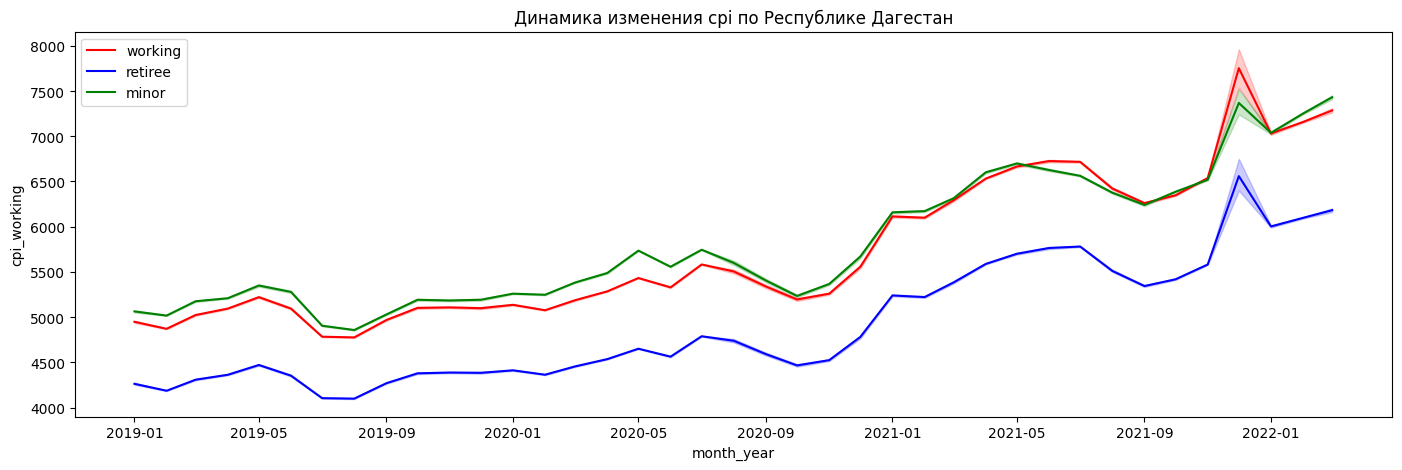

In [ ]:
fig, axs = plt.subplots(figsize=(17, 5))
sns.lineplot(x = region_5['month_year'], y = region_5['cpi_working'], label='working', color='red')
sns.lineplot(x = region_5['month_year'], y = region_5['cpi_retiree'], label='retiree', color='blue')
sns.lineplot(x = region_5['month_year'], y = region_5['cpi_minor'], label='minor', color='green')
plt.title('Динамика изменения cpi по Республике Дагестан')
plt.show()

<font color='green'>Скачок на уровне декабря 2022 года, может говорить о сезонном увеличении. Не вижу аномалий, кривая восходящая, указывает на постепенное повышение cpi

In [ ]:
region_17 = food_sales[food_sales['region'] == 17][['cpi_working', 'cpi_retiree', 'cpi_minor', 'month_year']]

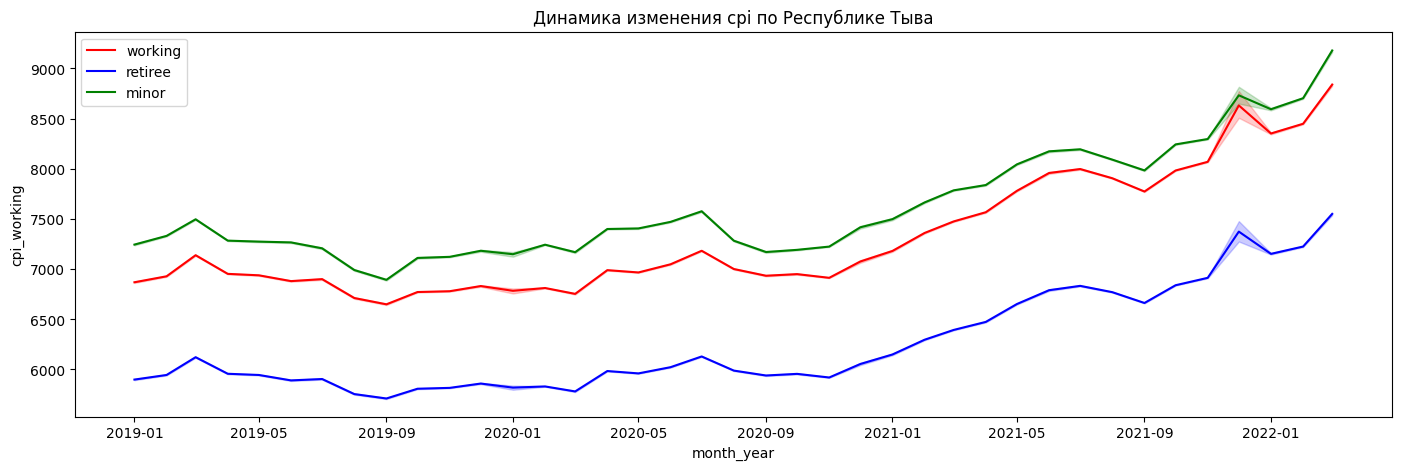

In [ ]:
fig, axs = plt.subplots(figsize=(17, 5))
sns.lineplot(x = region_17['month_year'], y = region_17['cpi_working'], label='working', color='red')
sns.lineplot(x = region_17['month_year'], y = region_17['cpi_retiree'], label='retiree', color='blue')
sns.lineplot(x = region_17['month_year'], y = region_17['cpi_minor'], label='minor', color='green')
plt.title('Динамика изменения cpi по Республике Тыва')
plt.show()

<font color='green'>Аналогичная с Дагестаном история, выбросы не являются аномальными

Text(0.5, 1.0, 'Динамика изменения cpi по Чукотскому автономному округу')

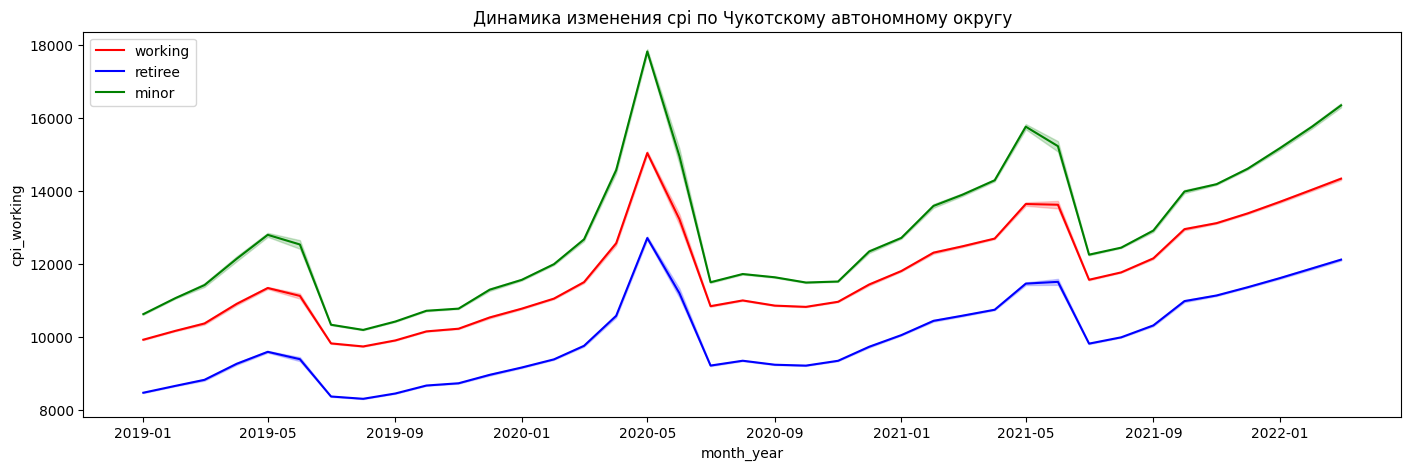

In [ ]:
region_87 = food_sales[food_sales['region'] == 87][['cpi_working', 'cpi_retiree', 'cpi_minor', 'month_year']]

fig, axs = plt.subplots(figsize=(17, 5))
sns.lineplot(x = region_87['month_year'], y = region_87['cpi_working'], label='working', color='red')
sns.lineplot(x = region_87['month_year'], y = region_87['cpi_retiree'], label='retiree', color='blue')
sns.lineplot(x = region_87['month_year'], y = region_87['cpi_minor'], label='minor', color='green')
plt.title('Динамика изменения cpi по Чукотскому автономному округу')

<font color='green'>Пики приходятся на май, что говорит о сезонности. Выбросы по этому региону не являются аномалиями

Text(0.5, 1.0, 'Динамика изменения cpi по группам')

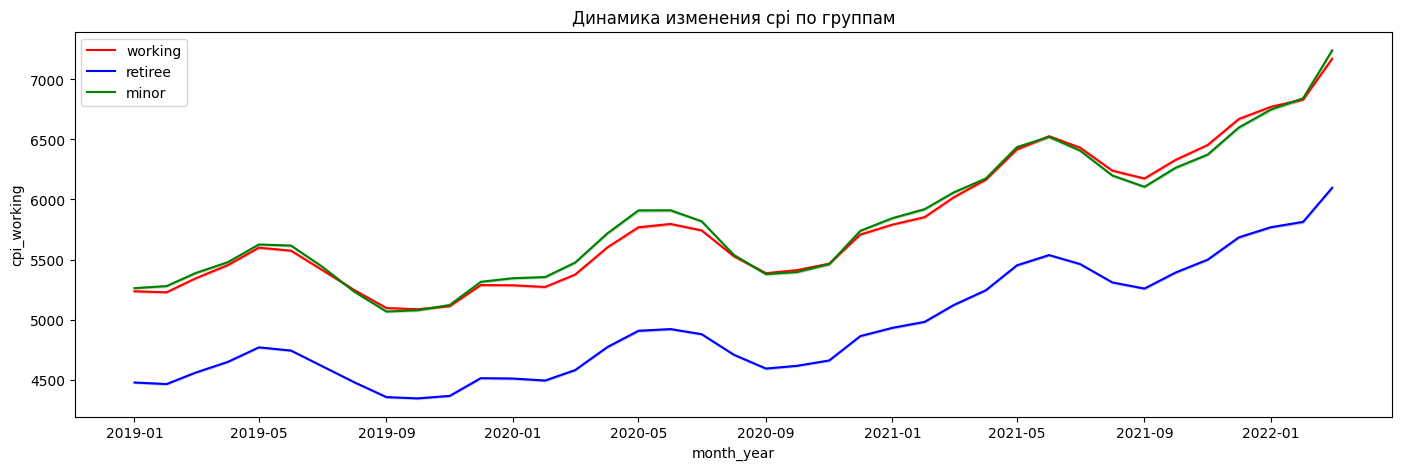

In [ ]:
# Динамика cpi по всем регионам
fig, axs = plt.subplots(figsize=(17, 5))
sns.lineplot(x = food_sales['month_year'], y = food_sales['cpi_working'], label='working', color='red')
sns.lineplot(x = food_sales['month_year'], y = food_sales['cpi_retiree'], label='retiree', color='blue')
sns.lineplot(x = food_sales['month_year'], y = food_sales['cpi_minor'], label='minor', color='green')
plt.title('Динамика изменения cpi по группам')

<font color='green'>Замечание: на графиках видно, что стоимость продуктовой корзины для разной категории граждан сонаправлены, поэтому для понимания данных в разрезе cpi можно оперировать средневзвешенным значением.
По данным Росстата
средняя численность населения составляет:

><font color='green'>Всего - 145557576 чел
моложе трудоспособного населения - 27317547 чел
трудоспособное население - 83226837 чел
старше трудоспособного населения - 35013192

https://rosstat.gov.ru/storage/mediabank/Bul_chislen_nasel-pv_01-01-2022.pdf



In [ ]:
# Процентное соотношение групп населения
total = 145557576
minor = round(27317547 / total, 2)
working = round(83226837 / total, 2)
retiree = round(35013192 / total, 2)

In [ ]:
# Создаю колонку со средневзвешенным
weights = [working, retiree, minor]
cpi = ['cpi_working', 'cpi_retiree', 'cpi_minor']
weighted_mean = sum(food_sales[col] * weight for col, weight in zip(cpi, weights)) / sum(weights)

food_sales = food_sales.assign(weighted_cpi=weighted_mean)


In [ ]:
col = food_sales.pop('weighted_cpi')
food_sales.insert(4, 'weighted_cpi', col)


In [ ]:
food_sales.drop(columns=['cpi_minor', 'cpi_retiree', 'cpi_working'], inplace=True)

In [ ]:
food_sales.head()

region                 region_name district       date  weighted_cpi  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01       4846.10   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02       4906.42   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03       4755.03   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04       4579.48   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05       4629.43   

  category unit  quantity  price_per_unit  total_sales month_year  
0    pasta   кг   1191.69           78.70     93786.00 2019-01-01  
1    pasta   кг   3726.69           73.12    272495.57 2019-01-01  
2    pasta   кг   6012.31           67.20    404027.23 2019-01-01  
3    pasta   кг   5886.43           70.38    414286.94 2019-01-01  
4    pasta   кг   9694.22           67.91    658334.48 2019-01-01

##<h1><font color='orange'>price_per_unit

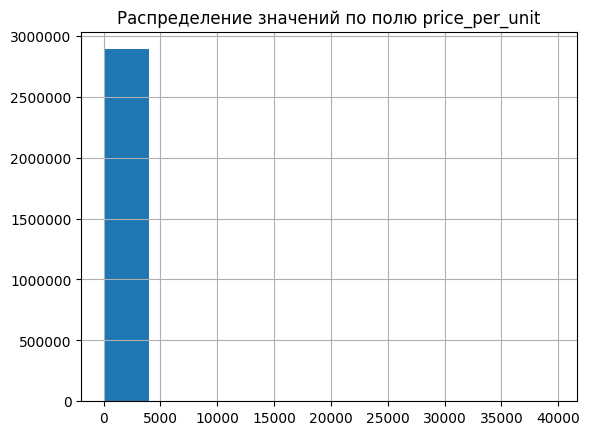

In [ ]:
food_sales['price_per_unit'].hist()
plt.ticklabel_format(style='plain', axis='both')
plt.title('Распределение значений по полю price_per_unit')
plt.show()

<font color='green'>Есть аномально высокие цены

In [ ]:
# Выбросы

q1 = food_sales['price_per_unit'].quantile(0.25)
q3 = food_sales['price_per_unit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
price_outliers = [x for x in food_sales['price_per_unit'] if x < lower_bound or x > upper_bound]

In [ ]:
# Какие категории попадаю в выбросы?
food_sales[food_sales['price_per_unit'].isin(price_outliers)].groupby('category')['price_per_unit'].\
            agg(['min', 'mean', 'max'])



min    mean      max
category                           
beef        485.42  523.77  1147.18
biscuits    487.53  537.06   643.48
butter      485.41  580.49  1041.46
cabbage     598.45  598.45   598.45
candy       485.41  590.22  2034.55
cheese      485.41  550.58  1281.26
cucumber    485.92  649.75   972.29
curd        485.48  566.96   978.41
fish        485.42  579.79  1453.79
fruit       485.80  592.43   755.90
herring     485.51  524.67   848.15
margarine   550.52  550.52   550.52
mutton      485.41  570.84  1290.13
pork        485.44  565.86   865.71
roots       503.72  570.09   720.64
salt        556.31 6764.23 39685.51
sour_creame 485.45  632.50  1114.39
vegetable   500.94  556.41   593.64

In [ ]:
# В каких регионах аномальные значения?
out_price = food_sales[food_sales['price_per_unit'].isin(price_outliers)].\
            groupby(['category', 'region', 'region_name'])['price_per_unit'].\
            agg(['min', 'mean', 'max']).reset_index()
out_price

category  region                      region_name    min    mean  \
0           beef       1       Республика Адыгея (Адыгея) 485.48  496.44   
1           beef       4                 Республика Алтай 496.62  496.62   
2           beef       5              Республика Дагестан 485.82  518.67   
3           beef       7  Кабардино-Балкарская Республика 486.54  522.73   
4           beef       9  Карачаево-Черкесская Республика 486.36  515.84   
..           ...     ...                              ...    ...     ...   
472         salt      20             Чеченская Республика 556.31 2684.19   
473  sour_creame      41                  Камчатский край 485.81  504.02   
474  sour_creame      49              Магаданская область 485.45  507.61   
475  sour_creame      87       Чукотский автономный округ 486.78  697.10   
476    vegetable      87       Чукотский автономный округ 500.94  556.41   

        max  
0    521.19  
1    496.62  
2    619.23  
3    603.98  
4    552.40  
..      ...  
472 7171.13  
473  518.63  
474  604.35  
475 1114.39  
476  593.64  

[477 rows x 6 columns]

<font color='green'>Практически на все категории товаров цены выглядят адекватными. Завышенная цена может встречаться в зависимости от региона или сезона. Так, например, самые высокие цена на фрукты и овощи встречаются в северных регионах. Из всего списка можно выделить только соль, цены на которые кажутся неправдоподобными

In [ ]:
out_price[out_price['category'] == 'salt'][['region', 'region_name', 'mean']]

region           region_name     mean
441       5   Республика Дагестан 13079.75
442      17       Республика Тыва 39685.51
443      20  Чеченская Республика  2684.19

<font color='green'>Проанализирую цены по этим регионам

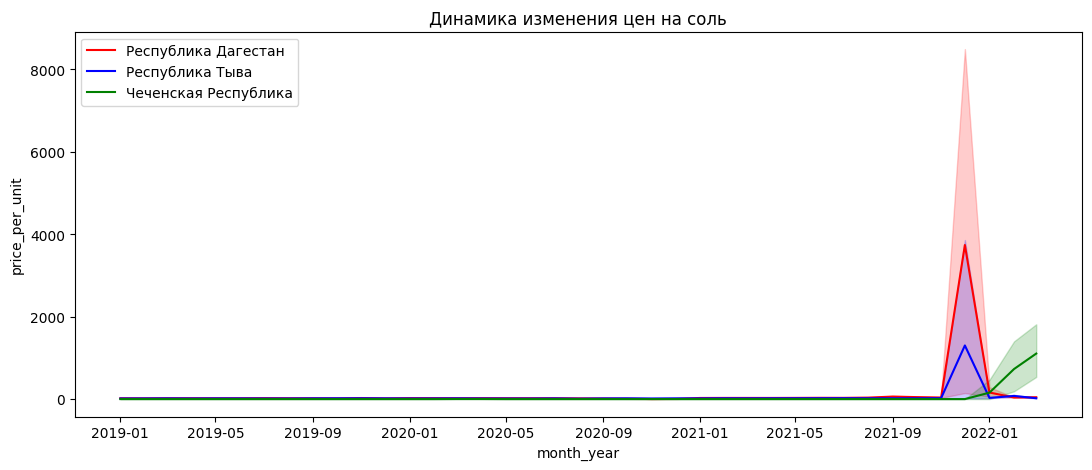

In [ ]:
salt_5 = food_sales[(food_sales['region'] == 5) & (food_sales['category'] == 'salt')]
salt_17 = food_sales[(food_sales['region'] == 17) & (food_sales['category'] == 'salt')]
salt_20 = food_sales[(food_sales['region'] == 20) & (food_sales['category'] == 'salt')]

fig, axs = plt.subplots(figsize=(13, 5))
sns.lineplot(x = salt_5['month_year'], y = salt_5['price_per_unit'], label='Республика Дагестан', color='red')
sns.lineplot(x = salt_17['month_year'], y = salt_17['price_per_unit'], label='Республика Тыва', color='blue')
sns.lineplot(x = salt_20['month_year'], y = salt_20['price_per_unit'], label='Чеченская Республика', color='green')
plt.title('Динамика изменения цен на соль')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'Периоды, в которые наблюдаются выбросы')

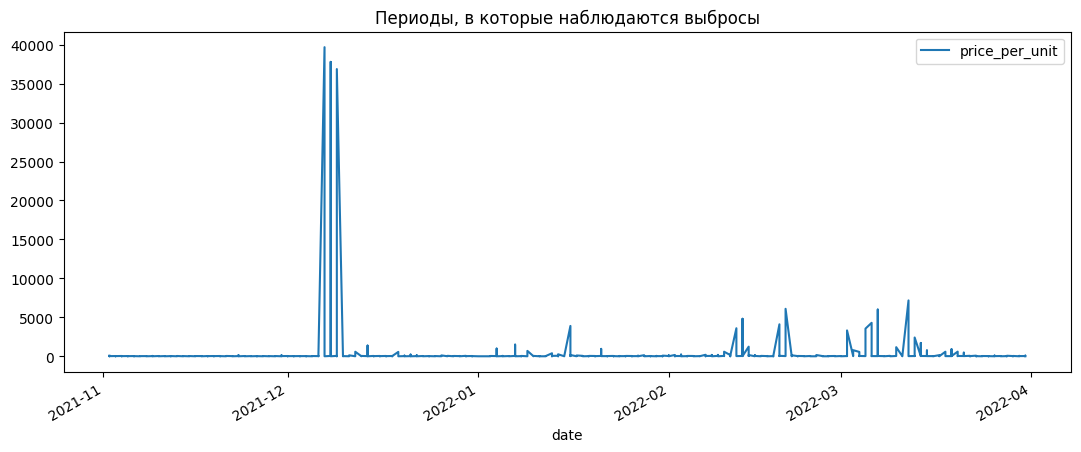

In [ ]:
fig, axs = plt.subplots(figsize=(13, 5))
food_sales[((food_sales['region'] == 5) | (food_sales['region'] == 17) | (food_sales['region'] == 20)) &\
                            (food_sales['category'] == 'salt') & (food_sales['date'] > '2021-11-01')].\
                            plot(x='date', y='price_per_unit', ax=axs)
plt.title('Периоды, в которые наблюдаются выбросы')

<font color='green'>Примечательно, что в остальные периоды наблюдается цена близкая к нулю, что говорит об отсутствии продаж либо данных по продажам

In [ ]:
out_price_salt = food_sales[((food_sales['region'] == 5) | (food_sales['region'] == 17) | (food_sales['region'] == 20)) &\
                            (food_sales['category'] == 'salt')]

In [ ]:
# Выбросы

q1 = out_price_salt['price_per_unit'].quantile(0.25)
q3 = out_price_salt['price_per_unit'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
salt_outliers = [x for x in out_price_salt['price_per_unit'] if x < lower_bound or x > upper_bound]

In [ ]:
out_price_salt = out_price_salt[out_price_salt['price_per_unit'].isin(salt_outliers)]
out_price_salt.tail()

region           region_name           district       date  \
2947193      20  Чеченская Республика  Северо-Кавказский 2022-03-15   
2947196      20  Чеченская Республика  Северо-Кавказский 2022-03-18   
2947197      20  Чеченская Республика  Северо-Кавказский 2022-03-19   
2947198      20  Чеченская Республика  Северо-Кавказский 2022-03-20   
2947199      20  Чеченская Республика  Северо-Кавказский 2022-03-21   

         weighted_cpi category unit  quantity  price_per_unit  total_sales  \
2947193       7342.18     salt   кг     28.92          744.70     21536.72   
2947196       7505.26     salt   кг     31.08          584.43     18164.08   
2947197       7566.81     salt   кг     40.55          901.57     36558.66   
2947198       7341.54     salt   кг     37.49          594.84     22300.55   
2947199       7223.85     salt   кг     42.90          463.78     19896.16   

        month_year  
2947193 2022-03-01  
2947196 2022-03-01  
2947197 2022-03-01  
2947198 2022-03-01  
2947199 2022-03-01

<font color='green'>В строчках, где аномально высокие цены, так же очень низкие значения по количеству. Вероятно, произошла ошибка при загрузке данных, которую я не могу точно интерпретировать

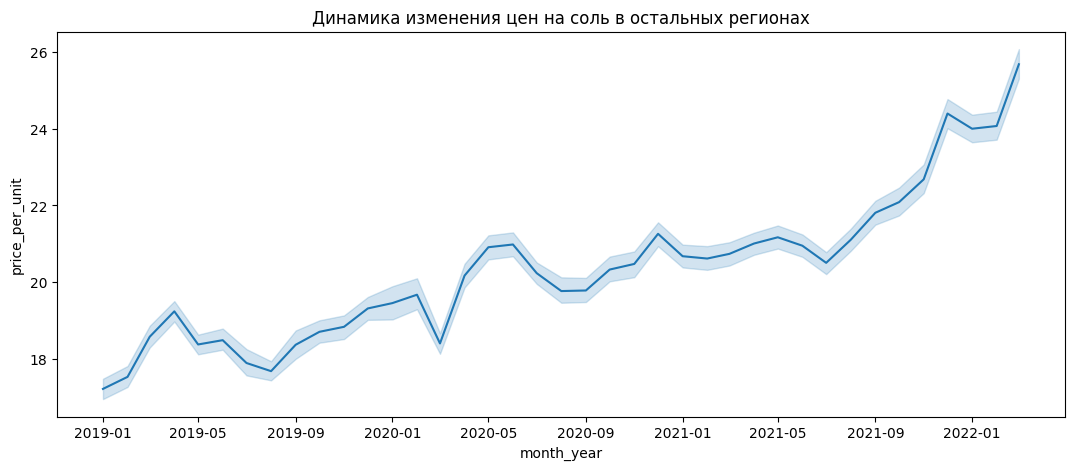

In [ ]:
# По другим регионам
other_regions_salt = food_sales[(food_sales['category'] == 'salt') & \
                                (~food_sales['region'].isin([5, 17, 20]))]

fig, axs = plt.subplots(figsize=(13, 5))
sns.lineplot(x = other_regions_salt['month_year'],\
             y = other_regions_salt['price_per_unit'])

plt.title('Динамика изменения цен на соль в остальных регионах')
plt.show()

<font color='green'>По данным с сайта PБK, динамика цен на соль следующая:

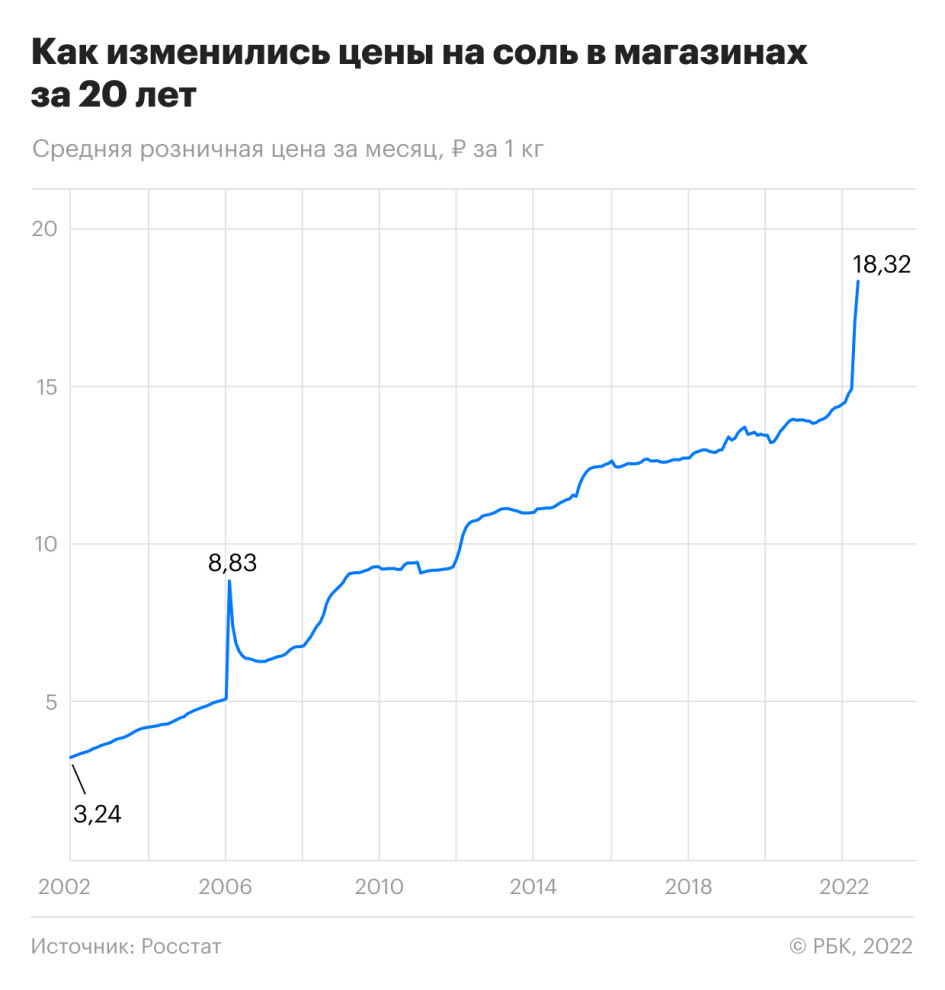

In [ ]:
# URL страницы, на которой находятся изображения
url = 'https://www.rbc.ru/newspaper/2022/05/26/628cd0639a7947504fed16ac'

# src атрибут нужного  изображения
img_src = '//s0.rbk.ru/v6_top_pics/resized/945xH/media/img/2/99/756534146068992.jpg'

# запрос на получение HTML-кода страницы
response = requests.get(url)

# объект BeautifulSoup для парсинга HTML-кода страницы
soup = BeautifulSoup(response.text, 'html.parser')

images = soup.find_all('img')

# поиск нужного изображения по его атрибутам
for image in images:
    if image['src'] == img_src:
        # загрузка изображения по URL-адресу
        response = requests.get(f'https:{img_src}')
        # объект изображения из полученных данных
        img = Image.open(BytesIO(response.content))
        # изображение в notebook
        display(img)
        break

<font color='green'>По графику видно, что резкий скачок цен наблюдается примерно с января-февраля 2022 года, но даже в этом случае средняя розничная цена не превышает 20 руб., в отличае от вобросов в наших данных.



In [ ]:
print('Процент аномальных значений от общего числа наблюдений по группе товаров "Соль": ',\
      round(*len(salt_outliers) * 100 / food_sales[(food_sales['category'] == 'salt') &\
                                                   (food_sales['region'].isin([5, 17, 20]))]['category'].value_counts().values, 2),'%')

Процент аномальных значений от общего числа наблюдений по группе товаров "Соль":  2.7 %


<font color='green'>удаляю эти выбросы

In [ ]:
index_to_drop = food_sales[(food_sales['category'] == 'salt') & (food_sales['region'].isin([5, 17, 20]))].index
food_sales.drop(index=index_to_drop, inplace=True)

In [ ]:
food_sales[food_sales['price_per_unit'] == food_sales['price_per_unit'].max()]

region          region_name         district       date  \
1368620      49  Магаданская область  Дальневосточный 2022-03-08   

         weighted_cpi category unit  quantity  price_per_unit  total_sales  \
1368620      12260.39    candy   кг    612.65         2034.55   1246467.06   

        month_year  
1368620 2022-03-01

<font color='green'>Допущу, что какие-то конфеты могут стоить 2000 руб за кг в Магаданской области

## <h1><font color='orange'> quantity

In [ ]:
food_sales['quantity'].describe()

count    3184410.00
mean       41558.24
std       177009.34
min        -9218.87
25%         2413.03
50%         9781.54
75%        28438.74
max     10906878.00
Name: quantity, dtype: float64

<font color='green'>Обращает на себя внимание отрицательное значение по полю, сильная разница между средним и медианным значением

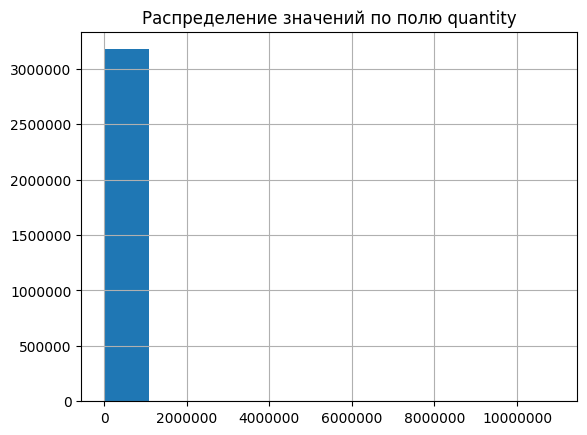

In [ ]:
food_sales['quantity'].hist()
plt.ticklabel_format(style='plain', axis='both')
plt.title('Распределение значений по полю quantity')
plt.show()

In [ ]:
negative_quantity = food_sales[food_sales['quantity'] < 0]
negative_quantity.head()

region                 region_name           district       date  \
729313       20        Чеченская Республика  Северо-Кавказский 2022-01-14   
911207        4            Республика Алтай         Сибирский  2019-12-26   
923361       14    Республика Саха (Якутия)    Дальневосточный 2020-10-15   
1109192       1  Республика Адыгея (Адыгея)              Южный 2019-10-10   
1756210      36         Воронежская область        Центральный 2021-07-19   

         weighted_cpi  category unit  quantity  price_per_unit  total_sales  \
729313        7427.91  cucumber   кг    -27.88          244.26     -6809.97   
911207        4570.74     roots   кг  -1730.29           37.23    -64418.70   
923361        7266.40     roots   кг   -710.11           86.10    -61140.47   
1109192       4482.36     fruit   кг   -128.70           66.20     -8519.94   
1756210       5653.25   chicken   кг  -9218.87          171.38  -1579929.94   

        month_year  
729313  2022-01-01  
911207  2019-12-01  
923361  2020-10-01  
1109192 2019-10-01  
1756210 2021-07-01

In [ ]:
negative_quantity.groupby(['date', 'region', 'region_name'])['quantity'].agg(['count', 'sum'])

count      sum
date       region region_name                                   
2019-01-28 52     Нижегородская область               1  -966.89
2019-03-29 61     Ростовская область                  1  -183.39
2019-04-16 21     Чувашская Республика - Чувашия      1  -848.63
2019-04-25 52     Нижегородская область               1 -6241.99
2019-04-30 52     Нижегородская область               1 -1174.19
2019-05-29 61     Ростовская область                  1 -4369.66
2019-05-30 61     Ростовская область                  1 -1336.23
2019-06-04 61     Ростовская область                  1 -5553.55
2019-06-10 61     Ростовская область                  1 -1053.29
2019-06-16 83     Ненецкий автономный округ           1   -69.76
2019-06-24 52     Нижегородская область               1  -927.64
2019-07-05 61     Ростовская область                  1  -119.82
2019-07-26 61     Ростовская область                  1 -2459.29
2019-07-30 61     Ростовская область                  1 -1295.94
2019-08-07 61     Ростовская область                  1  -866.42
2019-08-14 61     Ростовская область                  1   -71.82
2019-09-04 61     Ростовская область                  1 -2915.38
2019-09-19 83     Ненецкий автономный округ           1   -55.23
2019-09-23 52     Нижегородская область               1  -893.27
2019-10-02 83     Ненецкий автономный округ           1   -82.93
2019-10-10 1      Республика Адыгея (Адыгея)          1  -128.70
2019-12-18 52     Нижегородская область               1   -89.50
2019-12-24 21     Чувашская Республика - Чувашия      1  -655.95
2019-12-26 4      Республика Алтай                    1 -1730.29
2020-01-23 52     Нижегородская область               1 -3126.66
2020-02-17 52     Нижегородская область               1 -3845.01
2020-02-27 52     Нижегородская область               1 -2045.56
2020-04-27 52     Нижегородская область               1  -402.14
2020-04-29 59     Пермский край                       1  -112.07
2020-06-17 61     Ростовская область                  1  -611.76
2020-08-13 92     г. Севастополь                      1   -58.67
2020-08-17 61     Ростовская область                  1  -455.41
2020-09-14 61     Ростовская область                  1 -4293.25
2020-09-23 61     Ростовская область                  1  -186.84
2020-09-28 43     Кировская область                   1  -481.57
           61     Ростовская область                  1 -1537.65
2020-10-02 56     Оренбургская область                1   -91.27
2020-10-15 14     Республика Саха (Якутия)            1  -710.11
2020-10-20 43     Кировская область                   1 -2259.64
2020-10-28 21     Чувашская Республика - Чувашия      1  -828.73
2020-10-29 21     Чувашская Республика - Чувашия      1  -128.82
2020-11-23 52     Нижегородская область               1 -8498.81
2020-12-09 21     Чувашская Республика - Чувашия      1 -1060.58
2020-12-10 21     Чувашская Республика - Чувашия      1  -685.72
2020-12-14 52     Нижегородская область               1  -141.03
2021-03-05 57     Орловская область                   1  -284.07
2021-03-18 52     Нижегородская область               1 -4750.76
2021-03-24 21     Чувашская Республика - Чувашия      1  -860.21
2021-04-14 57     Орловская область                   1  -567.37
2021-05-19 56     Оренбургская область                1    -1.05
2021-07-19 36     Воронежская область                 1 -9218.87
2021-09-13 43     Кировская область                   1  -380.59
2021-10-21 21     Чувашская Республика - Чувашия      1 -1160.34
2021-11-10 52     Нижегородская область               1  -764.44
2021-11-30 39     Калининградская область             1 -2464.18
2022-01-14 20     Чеченская Республика                1   -27.88

In [ ]:
# разбивка по регионам
negative_quantity.groupby('region_name')['quantity'].sum().sort_values()

region_name
Нижегородская область            -33867.89
Ростовская область               -27309.70
Воронежская область               -9218.87
Чувашская Республика - Чувашия    -6228.98
Кировская область                 -3121.80
Калининградская область           -2464.18
Республика Алтай                  -1730.29
Орловская область                  -851.44
Республика Саха (Якутия)           -710.11
Ненецкий автономный округ          -207.92
Республика Адыгея (Адыгея)         -128.70
Пермский край                      -112.07
Оренбургская область                -92.32
г. Севастополь                      -58.67
Чеченская Республика                -27.88
Name: quantity, dtype: float64

In [ ]:
negative_quantity[negative_quantity['region_name'] == 'Нижегородская область'].\
                  groupby(['month_year', 'region_name', 'category'])['quantity'].sum()

month_year  region_name            category
2019-01-01  Нижегородская область  fish        -966.89
2019-04-01  Нижегородская область  fish       -7416.18
2019-06-01  Нижегородская область  fish        -927.64
2019-09-01  Нижегородская область  fish        -893.27
2019-12-01  Нижегородская область  fish         -89.50
2020-01-01  Нижегородская область  fish       -3126.66
2020-02-01  Нижегородская область  fish       -5890.57
2020-04-01  Нижегородская область  fish        -402.14
2020-11-01  Нижегородская область  fish       -8498.81
2020-12-01  Нижегородская область  fish        -141.03
2021-03-01  Нижегородская область  fish       -4750.76
2021-11-01  Нижегородская область  fish        -764.44
Name: quantity, dtype: float64

In [ ]:
negative_quantity[negative_quantity['region_name'] == 'Ростовская область'].\
                  groupby(['month_year', 'region_name', 'category'])['quantity'].sum()

month_year  region_name         category
2019-03-01  Ростовская область  fish        -183.39
2019-05-01  Ростовская область  fish       -5705.89
2019-06-01  Ростовская область  fish       -6606.84
2019-07-01  Ростовская область  fish       -3875.05
2019-08-01  Ростовская область  fish        -938.24
2019-09-01  Ростовская область  fish       -2915.38
2020-06-01  Ростовская область  fish        -611.76
2020-08-01  Ростовская область  fish        -455.41
2020-09-01  Ростовская область  fish       -6017.74
Name: quantity, dtype: float64

In [ ]:
# группы товаров с отрицательными значениями
negative_quantity.groupby('category')['quantity'].sum().sort_values()

category
fish         -71642.87
chicken       -9218.87
milk_kefir    -2464.18
roots         -2440.40
herring        -138.16
fruit          -128.70
pork            -69.76
cucumber        -27.88
Name: quantity, dtype: float64

<font color='green'>Из анализа видно, что отрицательные значения встречаются у продуктов, которые быстро портятся. Вероятнее всего, в этих транзакциях отражены списание товара. Удалю эти строки, т.к. они не относятся к продажам

In [ ]:
food_sales = food_sales.drop(food_sales[food_sales['quantity'] < 0].index)

<font color='green'>Длинный хвост на гистограмме обусловлнен, вероятно, разными единицами змерения

In [ ]:
# Действительно, яйца - штучный товар
food_sales[food_sales['quantity'] > 1000000]['category'].value_counts()

egg           9301
milk_kefir     655
fruit          346
sugar            2
pasta            1
legumes          1
groats           1
potatoes         1
salt             1
Name: category, dtype: int64

In [ ]:
food_sales[food_sales['unit'] == 'шт']['category'].value_counts()

egg      99624
spice    99624
tea      99624
Name: category, dtype: int64

<font color='green'>При анализе продаж в натуральном выражении, для соблюдения размерности, необходимо обработать штучный товар отдельно, так как точно не известно вес одной штуки. Выделяю этот товар в отдельный датафрейм

###<h1><font color='orange'>Нулевые значения

<font color='green'>Нулевые значения считаю ошибкой загрузки, т.к. не может быть, чтобы по какому-то товару не было ни одной транзакции по целому региону

In [ ]:
# Количество нулевых значений 132272
zero = food_sales[(food_sales['quantity'] == 0) & (food_sales['price_per_unit'] == 0)]
zero.shape

(132272, 11)

In [ ]:
zero

region                 region_name           district       date  \
19341        17             Республика Тыва         Сибирский  2020-01-01   
22723        20        Чеченская Республика  Северо-Кавказский 2019-07-09   
22799        20        Чеченская Республика  Северо-Кавказский 2019-09-23   
22831        20        Чеченская Республика  Северо-Кавказский 2019-10-25   
23008        20        Чеченская Республика  Северо-Кавказский 2020-04-19   
...         ...                         ...                ...        ...   
3221474      87  Чукотский автономный округ    Дальневосточный 2019-10-26   
3221541      87  Чукотский автономный округ    Дальневосточный 2020-01-01   
3221907      87  Чукотский автономный округ    Дальневосточный 2021-01-01   
3222272      87  Чукотский автономный округ    Дальневосточный 2022-01-01   
3222273      87  Чукотский автономный округ    Дальневосточный 2022-01-02   

         weighted_cpi category unit  quantity  price_per_unit  total_sales  \
19341         4567.82    pasta   кг      0.00            0.00         0.00   
22723         5676.85    pasta   кг      0.00            0.00         0.00   
22799         5187.21    pasta   кг      0.00            0.00         0.00   
22831         5234.34    pasta   кг      0.00            0.00         0.00   
23008         6520.44    pasta   кг      0.00            0.00         0.00   
...               ...      ...  ...       ...             ...          ...   
3221474       9874.75      tea   шт      0.00            0.00         0.00   
3221541      10301.42      tea   шт      0.00            0.00         0.00   
3221907      11280.36      tea   шт      0.00            0.00         0.00   
3222272      13534.29      tea   шт      0.00            0.00         0.00   
3222273      13467.95      tea   шт      0.00            0.00         0.00   

        month_year  
19341   2020-01-01  
22723   2019-07-01  
22799   2019-09-01  
22831   2019-10-01  
23008   2020-04-01  
...            ...  
3221474 2019-10-01  
3221541 2020-01-01  
3221907 2021-01-01  
3222272 2022-01-01  
3222273 2022-01-01  

[132272 rows x 11 columns]

In [ ]:
zero.groupby(zero['date'].dt.year)['quantity'].count()

date
2019    40842
2020    44260
2021    36984
2022    10186
Name: quantity, dtype: int64

In [ ]:
# Вкаждом месяце есть нулевые значения
zero.groupby('month_year')['quantity'].count()

month_year
2019-01-01    3518
2019-02-01    2812
2019-03-01    3179
2019-04-01    3176
2019-05-01    3388
2019-06-01    3468
2019-07-01    3708
2019-08-01    3651
2019-09-01    3564
2019-10-01    3775
2019-11-01    3335
2019-12-01    3268
2020-01-01    3921
2020-02-01    3220
2020-03-01    3413
2020-04-01    3518
2020-05-01    3748
2020-06-01    3840
2020-07-01    3916
2020-08-01    3975
2020-09-01    3722
2020-10-01    3810
2020-11-01    3737
2020-12-01    3440
2021-01-01    3211
2021-02-01    2439
2021-03-01    2862
2021-04-01    2822
2021-05-01    3190
2021-06-01    3304
2021-07-01    3347
2021-08-01    3326
2021-09-01    3206
2021-10-01    3238
2021-11-01    3144
2021-12-01    2895
2022-01-01    3807
2022-02-01    3105
2022-03-01    3274
Name: quantity, dtype: int64

In [ ]:
# В каких регионах?
zero.groupby('region_name')['quantity'].count().sort_values()

region_name
г. Санкт-Петербург                1
Краснодарский край                2
Ставропольский край               5
Свердловская область             55
Ленинградская область           129
                              ...  
Республика Дагестан            5061
Республика Тыва                5995
Ненецкий автономный округ      8576
Чукотский автономный округ     9644
Чеченская Республика          15281
Name: quantity, Length: 82, dtype: int64

In [ ]:
# По каким категориям?
zero.groupby('category')['quantity'].count().sort_values()

category
fruit              4
bread              5
biscuits           8
candy             12
tea               13
spice             13
cheese            15
milk_kefir        22
pasta             26
chicken           92
egg               92
sour_creame      243
cucumber         253
oil              326
groats           361
butter           389
roots            390
vegetable        439
curd             692
potatoes         722
rice            1419
sugar           1459
cabbage         2025
salt            2120
flour           2313
legumes         2620
pork            4323
herring         4368
beef            7508
fish           12282
margarine      12834
mutton         74884
Name: quantity, dtype: int64

In [ ]:
# удалю эти строчки
food_sales = food_sales.drop(food_sales[(food_sales['quantity'] == 0) & (food_sales['price_per_unit'] == 0)].index)

###<h1><font color='orange'>Разделения товара на штучный и весовой (л, кг)

In [ ]:
piece_goods = food_sales.copy()
piece_goods = food_sales[food_sales['unit'] == 'шт']

In [ ]:
piece_goods.describe()

region  weighted_cpi    quantity  price_per_unit  total_sales
count 298754.00     298754.00   298754.00       298754.00    298754.00
mean      43.84       5588.92   195338.82           40.60   2428773.77
std       25.01       1214.76   521858.65           32.11   4299360.31
min        1.00       3312.00      119.00            3.02      4371.72
25%       23.00       4797.53    16253.62            6.96    593467.74
50%       44.00       5309.93    35021.87           33.84   1324102.16
75%       64.75       5985.81   181101.12           71.59   2507881.15
max       92.00      18667.77 10906878.00          472.40 405427729.18

In [ ]:
food_sales = food_sales[food_sales['unit'] != 'шт']

###<h1><font color='orange'>Выбросы

In [ ]:
food_sales['quantity'].describe()

count   2753328.00
mean      26869.41
std       61830.11
min           2.27
25%        2668.06
50%        9282.08
75%       25327.85
max     3421756.60
Name: quantity, dtype: float64

In [ ]:
# Выбросы

q1 = food_sales['quantity'].quantile(0.25)
q3 = food_sales['quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
quantity_outliers = [x for x in food_sales['quantity'] if x < lower_bound or x > upper_bound]


In [ ]:
food_sales[food_sales['quantity'].isin(quantity_outliers)].sort_values(by='quantity')

region            region_name     district       date  weighted_cpi  \
1283968      63      Самарская область  Приволжский 2020-12-17       5322.40   
2518343      91        Республика Крым        Южный 2020-04-10       5414.28   
581464       66   Свердловская область    Уральский 2019-11-21       4675.37   
360809       50     Московская область  Центральный 2019-09-23       5019.60   
86612        74    Челябинская область    Уральский 2019-02-04       4556.75   
...         ...                    ...          ...        ...           ...   
544192       34  Волгоградская область        Южный 2021-10-01       5491.88   
1268275      50     Московская область  Центральный 2020-03-17       5551.94   
2477995      50     Московская область  Центральный 2020-03-17       5551.94   
2510017      77              г. Москва  Центральный 2020-03-17       6202.51   
191976       77              г. Москва  Центральный 2021-10-27       7387.78   

           category unit   quantity  price_per_unit  total_sales month_year  
1283968       sugar   кг   59317.61           46.62   2765386.98 2020-12-01  
2518343  milk_kefir    л   59317.64           66.56   3948182.12 2020-04-01  
581464       groats   кг   59317.79           47.95   2844288.03 2019-11-01  
360809        flour   кг   59317.84           33.43   1982995.39 2019-09-01  
86612         pasta   кг   59318.03           70.01   4152855.28 2019-02-01  
...             ...  ...        ...             ...          ...        ...  
544192       groats   кг 1483547.17           67.45 100065256.62 2021-10-01  
1268275       sugar   кг 1595728.77           26.20  41808093.77 2020-03-01  
2477995  milk_kefir    л 1596881.05           63.03 100651412.58 2020-03-01  
2510017  milk_kefir    л 1670602.84           64.38 107553410.84 2020-03-01  
191976      legumes   кг 3421756.60          148.32 507514938.91 2021-10-01  

[299548 rows x 11 columns]

In [ ]:
food_sales[food_sales['quantity'] == food_sales['quantity'].max()]

region region_name     district       date  weighted_cpi category  \
191976      77   г. Москва  Центральный 2021-10-27       7387.78  legumes   

       unit   quantity  price_per_unit  total_sales month_year  
191976   кг 3421756.60          148.32 507514938.91 2021-10-01

In [ ]:
legumes = food_sales[(food_sales['category'] == 'legumes') & (food_sales['region'] == 77)]

<Axes: xlabel='date', ylabel='quantity'>

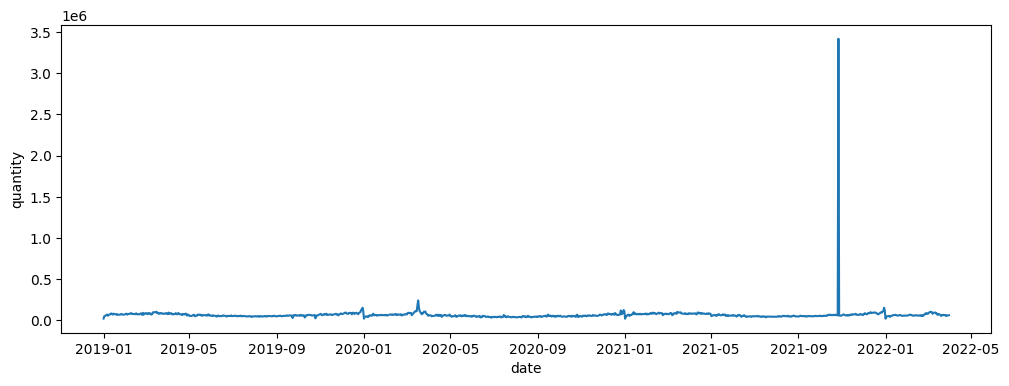

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=legumes, x='date', y='quantity', ax=ax)

<font color='green'>Выброс в данной строчке, удаляю

In [ ]:
food_sales = food_sales.drop(191976)

##<h1><font color='orange'>Добавление сезона и перевод названий

In [ ]:
# Добавлю столбец с сезоном, чтобы посмотреть данные в этом разрезе
def get_season(month):
    if month in [1, 2, 12]: # Зима
        return 1
    elif month in [3, 4, 5]: # Весна
        return 2
    elif month in [6, 7, 8]: # Лето
        return 3
    else:
        return 4   # Осень

food_sales['season'] = food_sales['date'].dt.month.apply(get_season)

<font color='green'>Перевожу названия категорий на русски язык, чтобы данные были в едином стиле

In [ ]:
description['English name'].unique()

array(['region', 'oktmo', 'okato', 'date', 'pasta', 'legumes', 'bread',
       'flour', 'rice', 'groats', 'potatoes', 'cucumber', 'vegetable',
       'roots', 'cabbage', 'fruit', 'sugar', 'candy', 'biscuits',
       'mutton', 'beef', 'chicken', 'pork', 'fish', 'herring', 'curd',
       'sour_creame', 'butter', 'milk_kefir', 'cheese', 'egg',
       'margarine', 'oil', 'salt', 'spice', 'tea', 'cpi_1', 'cpi_2',
       'cpi_3', 'pasta_value', 'legumes_value', 'bread_value',
       'flour_value', 'rice_value', 'groats_value', 'potatoes_value',
       'cucumber_value', 'vegetable_value', 'roots_value',
       'cabbage_value', 'fruit_value', 'sugar_value', 'candy_value',
       'biscuits_value', 'mutton_value', 'beef_value', 'chicken_value',
       'pork_value', 'fish_value', 'herring_value', 'curd_value',
       'sour_creame_value', 'butter_value', 'milk_kefir_value',
       'cheese_value', 'egg_value', 'margarine_value', 'oil_value',
       'salt_value', 'spice_value', 'tea_value', 'ai92', 

In [ ]:
description['Description'].unique()

array(['Дата наблюдения', 'Код региона в кодировке ФНС России',
       'ОКАТО региона РФ', 'ОКТМО региона РФ', 'Макароны', 'Бобовые ',
       'Хлеб', 'Мука', 'Рис', 'Другие крупы ', 'Картофель ',
       'Огурцы и помидоры', 'Прочие овощи ', 'Столовые корнеплоды ',
       'Капуста', 'Фрукты', 'Сахар ', 'Конфеты ', 'Печенье ', 'Баранина ',
       'Говядина', 'Мясо птицы', 'Свинина ', 'Рыба свеж ', 'Сельдь ',
       'Творог ', 'Сметана ', 'Масло сливочное ', 'Молоко кефир ', 'Сыр ',
       'Яйца ', 'Маргарин и другие жиры ', 'Масло раститительное ',
       'Соль ', 'Специи ', 'Чай ',
       'Стоимость потребительской корзины для трудоспособных граждан',
       'Стоимость потребительской корзины для пенсионеров ',
       'Стоимость потребительской корзины для детей до 18 лет',
       'Макароны (Объем проданной продукции)',
       '(Объем проданной продукции)', 'Хлеб (Объем проданной продукции)',
       'Мука  (Объем проданной продукции)',
       'Рис (Объем проданной продукции)',
       'Д

In [ ]:
# Словарь
v = {'pasta': 'Макароны', 'legumes': 'Бобовые', 'bread': 'Хлеб', 'flour': 'Мука',\
     'rice': 'Рис', 'groats': 'Другие крупы','potatoes': 'Картофель', 'cucumber': 'Огурцы_помидоры',\
      'vegetable': 'Прочие_овощи', 'roots': 'Столовые_корнеплоды', 'cabbage': 'Капуста',\
     'fruit': 'Фрукты', 'sugar': 'Сахар', 'candy': 'Конфеты', 'biscuits': 'Печенье',\
       'mutton': 'Баранина', 'beef': 'Говядина', 'chicken': 'Мясо_птицы', 'pork': 'Свинина',\
      'fish': 'Рыба_свеж', 'herring': 'Сельдь', 'curd': 'Творог', 'sour_creame': 'Сметана',\
      'butter': 'Масло_сливочное', 'milk_kefir': 'Молоко_кефир', 'cheese': 'Сыр',\
      'margarine': 'Маргарин_жиры', 'oil': 'Масло_раститительное', 'salt': 'Соль'}

In [ ]:
food_sales['category'] = food_sales['category'].replace(v)

In [ ]:
food_sales.head()

region                 region_name district       date  weighted_cpi  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01       4846.10   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02       4906.42   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03       4755.03   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04       4579.48   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05       4629.43   

   category unit  quantity  price_per_unit  total_sales month_year  season  
0  Макароны   кг   1191.69           78.70     93786.00 2019-01-01       1  
1  Макароны   кг   3726.69           73.12    272495.57 2019-01-01       1  
2  Макароны   кг   6012.31           67.20    404027.23 2019-01-01       1  
3  Макароны   кг   5886.43           70.38    414286.94 2019-01-01       1  
4  Макароны   кг   9694.22           67.91    658334.48 2019-01-01       1

In [ ]:
# Проверю все ли названия переименовались правильно
food_sales.category.unique()

array(['Макароны', 'Бобовые', 'Хлеб', 'Мука', 'Рис', 'Другие крупы',
       'Картофель', 'Огурцы_помидоры', 'Прочие_овощи',
       'Столовые_корнеплоды', 'Капуста', 'Фрукты', 'Сахар', 'Конфеты',
       'Печенье', 'Баранина', 'Говядина', 'Мясо_птицы', 'Свинина',
       'Рыба_свеж', 'Сельдь', 'Творог', 'Сметана', 'Масло_сливочное',
       'Молоко_кефир', 'Сыр', 'Маргарин_жиры', 'Масло_раститительное',
       'Соль'], dtype=object)

In [ ]:
# Обнаружила лишний пробел в названии фо
food_sales.district.unique()

array(['Южный', 'Приволжский', 'Дальневосточный', 'Сибирский ',
       'Северо-Кавказский', 'Северо-Западный', 'Центральный', 'Уральский'],
      dtype=object)

In [ ]:
food_sales['district'] = food_sales['district'].replace('Сибирский ', 'Сибирский')

In [ ]:
food_sales.district.unique()

array(['Южный', 'Приволжский', 'Дальневосточный', 'Сибирский',
       'Северо-Кавказский', 'Северо-Западный', 'Центральный', 'Уральский'],
      dtype=object)

<font color='green'>сохраняю очищенный датафрейм, чтобы не выполнять предыдущие шаги

# <font color='red'>ЗАГРУЗКА

## <font color='orange'>Датасет

In [ ]:
! gdown --id 1yI_RGIb9m4TVok_EvMBZYxB44CcKQdsD

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yI_RGIb9m4TVok_EvMBZYxB44CcKQdsD
To: /content/food_sales_kg.csv
100% 423M/423M [00:07<00:00, 53.4MB/s]


In [ ]:
df = pd.read_csv('/content/food_sales_kg.csv', parse_dates=['date', 'month_year'])

In [ ]:
df.head()

region                 region_name district       date  weighted_cpi  \
0       1  Республика Адыгея (Адыгея)    Южный 2019-01-01       4846.10   
1       1  Республика Адыгея (Адыгея)    Южный 2019-01-02       4906.42   
2       1  Республика Адыгея (Адыгея)    Южный 2019-01-03       4755.03   
3       1  Республика Адыгея (Адыгея)    Южный 2019-01-04       4579.48   
4       1  Республика Адыгея (Адыгея)    Южный 2019-01-05       4629.43   

   category unit  quantity  price_per_unit  total_sales month_year  season  
0  Макароны   кг   1191.69           78.70     93786.00 2019-01-01       1  
1  Макароны   кг   3726.69           73.12    272495.57 2019-01-01       1  
2  Макароны   кг   6012.31           67.20    404027.23 2019-01-01       1  
3  Макароны   кг   5886.43           70.38    414286.94 2019-01-01       1  
4  Макароны   кг   9694.22           67.91    658334.48 2019-01-01       1

In [ ]:
df.dtypes

region                     int64
region_name               object
district                  object
date              datetime64[ns]
weighted_cpi             float64
category                  object
unit                      object
quantity                 float64
price_per_unit           float64
total_sales              float64
month_year        datetime64[ns]
season                     int64
dtype: object

In [ ]:
df.isna().sum()

region            0
region_name       0
district          0
date              0
weighted_cpi      0
category          0
unit              0
quantity          0
price_per_unit    0
total_sales       0
month_year        0
season            0
dtype: int64

<font color='green'>Из-за того, что за 2022 год данные представлены только за три месяца убираю их из обработки

In [ ]:
df_2022 = df[df['date'].dt.year == 2022]

In [ ]:
df = df[df['date'] < '2022-01-01']

In [ ]:
df.describe()

region  weighted_cpi   quantity  price_per_unit  total_sales  \
count 2544521.00    2544521.00 2544521.00      2544521.00   2544521.00   
mean       43.99       5468.26   26983.39          166.16   2859852.79   
std        24.79       1108.97   62325.76          152.90   6800619.65   
min         1.00       3312.00       2.27            5.68       628.79   
25%        23.00       4757.30    2670.81           53.06    282412.78   
50%        44.00       5213.98    9292.29          100.17    929312.92   
75%        64.00       5815.71   25347.65          245.50   2855132.86   
max        92.00      18667.77 1670602.84         1856.68 215223488.60   

          season  
count 2544521.00  
mean        2.50  
std         1.11  
min         1.00  
25%         2.00  
50%         2.00  
75%         3.00  
max         4.00

## <font color='orange'>Уровень жизни

In [ ]:
# Рейтинг регионов по уровню жизни:
url = 'https://top-rf.ru/places/110-rejting-regionov.html'
standard = pd.read_html(url)

In [ ]:
standard_df = pd.DataFrame()
for i in range(1, len(standard)):
    standard_df = pd.concat([standard_df, standard[i]], ignore_index=True)

In [ ]:
standard_df = standard_df.rename(columns={standard_df.columns[i]: standard_df.iloc[0][i] for i in range(len(standard_df.columns))})
standard_df.drop(0, inplace=True)
standard_df

№          Субъект РФ Итоговый балл № в 2021г.
1    1              Москва         82999          1
2    2     Санкт-Петербург         82307          2
3    3     Московская обл.         78195          3
4    4     Респ. Татарстан         72113          4
5    5  Краснодарский край         71186          5
..  ..                 ...           ...        ...
85  85          Респ. Тыва         23758         85
86   -                 ДНР           н/д        н/д
87   -    Запорожская обл.           н/д        н/д
88   -                 ЛНР           н/д        н/д
89   -     Херсонская обл.           н/д        н/д

[89 rows x 4 columns]

##<h1><font color='orange'>Численность населения и рейтинг регионов
https://rosstat.gov.ru/compendium/document/13282

<font color='green'>
Для анализа мне понадобится информация о численности населения. Численность населения каждого региона может использоваться для расчета показателей на душу населения Скачиваю файл с сайта Росстата, добавив в него коды регионов фнс, чтобы можно было сопоставить с основными данными, так же добавлю рейтинг уровня жизни

In [ ]:
! gdown --id 1hEJ56HrU80GvlUA6WvoVG3RsXq39o7iU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hEJ56HrU80GvlUA6WvoVG3RsXq39o7iU
To: /content/PrPopul2023_Site_.xlsx
100% 22.4k/22.4k [00:00<00:00, 66.1MB/s]


In [ ]:
population = pd.read_excel('/content/PrPopul2023_Site_.xlsx', skiprows=5)

In [ ]:
population.head()

Unnamed: 0                     Unnamed: 1 В среднем за 2022 год  \
0        Код                            NaN         Все население   
1        NaN           Российская Федеpация             146702395   
2        NaN  Центральный федеральный округ              40263995   
3         31           Белгородская область               1525580   
4         32               Брянская область               1158634   

            Unnamed: 3          Unnamed: 4     Unnamed: 5  
0  Городское население  Сельское население  уровень жизни  
1            109808572            36893823            NaN  
2             33080161             7183834            NaN  
3               996584              528996              6  
4               806066              352568             38

In [ ]:
population = population[['Unnamed: 0', 'Unnamed: 1', 'В среднем за 2022 год', 'Unnamed: 5']]

In [ ]:
population.drop(0, inplace=True)

In [ ]:
population = population.rename(columns={'Unnamed: 0':'code', 'Unnamed: 1': 'region',\
                                        'В среднем за 2022 год': 'avg_population',\
                                        'Unnamed: 5':'rating'})
population.head()

code                         region avg_population rating
1  NaN           Российская Федеpация      146702395    NaN
2  NaN  Центральный федеральный округ       40263995    NaN
3   31           Белгородская область        1525580      6
4   32               Брянская область        1158634     38
5   33           Владимирская область        1333692     36

In [ ]:
population.dropna(inplace=True)

In [ ]:
population.dtypes

code              object
region            object
avg_population    object
rating            object
dtype: object

In [ ]:
population['code'] = population['code'].astype('int64')
population['avg_population'] = population['avg_population'].astype('int64')
population['rating'] = population['rating'].astype('int64')

In [ ]:
population

code                        region  avg_population  rating
3     31          Белгородская область         1525580       6
4     32              Брянская область         1158634      38
5     33          Владимирская область         1333692      36
6     36           Воронежская область         2293644      11
7     37            Ивановская область          919304      46
..   ...                           ...             ...     ...
92    28              Амурская область          759921      72
93    49           Магаданская область          135238      51
94    65           Сахалинская область          462997      31
95    79  Еврейская автономная область          148506      83
96    87    Чукотский автономный округ           47710      70

[85 rows x 4 columns]

<ipython-input-95-6713e32b278b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_population.loc[:, 'label'] = top_population['region'].str.replace(' ', '\n')


Text(0.5, 1.0, 'Топ-20 регионов с самой высокой численностью населения')

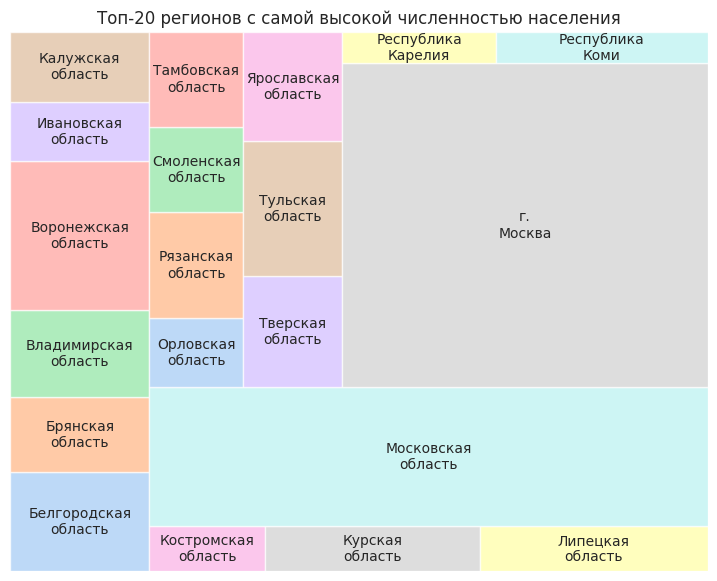

In [ ]:
# Топ-20 регионов с самым большим количеством населения
top_population = population.head(20)
top_population.loc[:, 'label'] = top_population['region'].str.replace(' ', '\n')

fig, ax = plt.subplots(figsize=(9, 7))
squarify.plot(sizes=top_population['avg_population'], label=top_population['label'],
              color=sns.color_palette('pastel', len(top_population['avg_population'])), alpha=0.7, text_kwargs={'fontsize':10})
plt.axis("off")
plt.title('Топ-20 регионов с самой высокой численностью населения')

In [ ]:
# Пятерка регионов с самым высоким уровнем жизни
population.sort_values(by='rating').head(5)

code                region  avg_population  rating
20    77             г. Москва        13056333       1
33    78    г.Санкт-Петербург          5603201       2
12    50    Московская область         8568355       3
55    16  Республика Татарстан         4001013       4
38    23    Краснодарский край         5825209       5

# <font color='red'>Анализ

## <font color='orange'>Cтоимость продуктовой корзины

### <font color='orange'>Анализ по годам

In [ ]:
df['weighted_cpi'].describe()

count   2544521.00
mean       5468.26
std        1108.97
min        3312.00
25%        4757.30
50%        5213.98
75%        5815.71
max       18667.77
Name: weighted_cpi, dtype: float64

<font color='green'>*   Минимальная cpi - 3312 руб
     *   Максисальная cpi - 18667.77 руб
        * Среднее и медианное значения отличаются не сильно, что говорит о небольшом количетсве выбросов



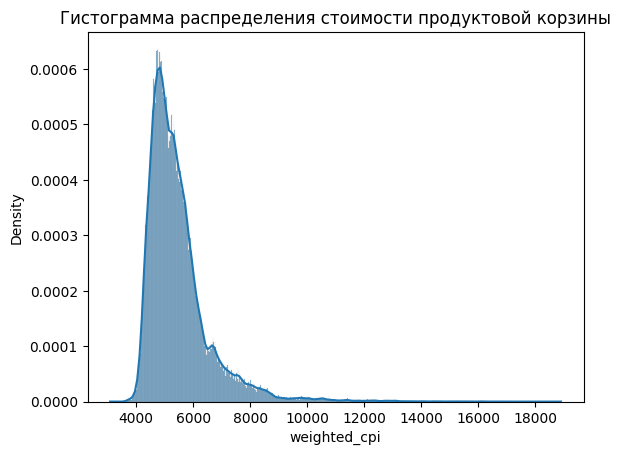

In [ ]:
sns.histplot(df['weighted_cpi'], kde=True, stat="density", kde_kws=dict(cut=4), alpha=.5)
plt.title('Гистограмма распределения стоимости продуктовой корзины')
plt.show()

<font color='green'>Распределение ненормальное, скошено вправо

<font color='green'>Гипотеза: Существуют значимые различия в средних значениях cpi по годам

In [ ]:
year_2019 = df[df['date'].dt.year == 2019][['date', 'weighted_cpi']]
year_2019['year'] = 2019
year_2019 = year_2019[['year', 'weighted_cpi']]
year_2020 = df[df['date'].dt.year == 2020][['date', 'weighted_cpi']]
year_2020['year'] = 2020
year_2020 = year_2020[['year', 'weighted_cpi']]
year_2021 = df[df['date'].dt.year == 2021][['date', 'weighted_cpi']]
year_2021['year'] = 2021
year_2021 = year_2021[['year', 'weighted_cpi']]

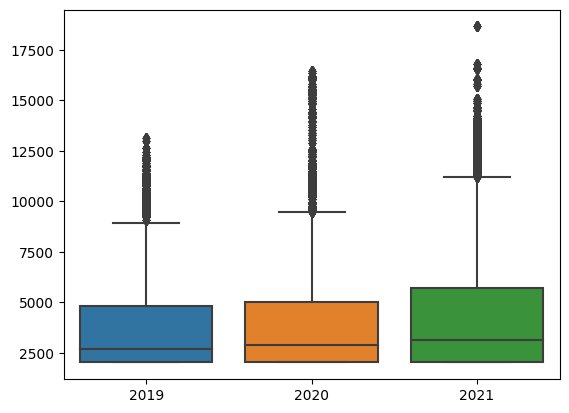

In [ ]:
sns.boxplot([year_2019, year_2020, year_2021])
plt.gca().set_xticklabels(['2019', '2020', '2021'])
plt.show()

<font color='green'>Визуально средние значения cpi отличаются несильно

In [ ]:
# Проверка на однородность дисперсий
stat_l, p_l = stats.levene(year_2019['weighted_cpi'], year_2020['weighted_cpi'], year_2021['weighted_cpi'])

print('stat=%.3f, p=%.3f' % (stat_l, p_l))
alpha = 0.05
if p_l > alpha:
    print('H0 не отвергается: дисперсии выборок равны')
else:
    print('H0 отвергается: дисперсии этих выборок неоднородны')

stat=3425.306, p=0.000
H0 отвергается: дисперсии этих выборок неоднородны


In [ ]:
# Проверка гипотезы о наличие значимых различий в выборках
alpha = 0.05

f_value, p_value = stats.f_oneway(year_2019['weighted_cpi'], year_2020['weighted_cpi'], year_2021['weighted_cpi'])
print('F-value:', f_value)
print('p-value:', p_value)
if p_value < alpha:
    print('Средние значения в трех группах отличаются.')
else:
    print('Отличий нет.')

F-value: 176261.01592481355
p-value: 0.0
Средние значения в трех группах отличаются.


In [ ]:
v = np.concatenate([year_2019['weighted_cpi'], year_2020['weighted_cpi'], year_2021['weighted_cpi']])
labels = ['year_2019'] * len(year_2019['weighted_cpi']) + ['year_2020'] * len(year_2020['weighted_cpi']) + ['year_2021'] * len(year_2021['weighted_cpi'])
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
year_2019 year_2020  214.054   0.0 210.3104 217.7976   True
year_2019 year_2021 905.7283   0.0   901.99 909.4666   True
year_2020 year_2021 691.6744   0.0  687.935 695.4137   True
-----------------------------------------------------------


<font color='green'>Существуют значимые различия стоимости продуктовой корзины по годам

In [ ]:
# Среднее значение cpi по годам и сравнение год к году
change_cpi = df.groupby(df['date'].dt.year)['weighted_cpi'].mean().reset_index()
change_cpi['change_%'] = change_cpi['weighted_cpi'].pct_change()
change_cpi

date  weighted_cpi  change_%
0  2019       5094.13       NaN
1  2020       5308.19      0.04
2  2021       5999.86      0.13

### <font color='orange'>Федеральные округа и регионы

In [ ]:
# группирую по годам
mean_cpi_year = df[['date', 'district', 'weighted_cpi']]
mean_cpi_year.loc[:, 'year'] = mean_cpi_year['date'].dt.year
cpi_district_year = mean_cpi_year.groupby(['district', 'year'])['weighted_cpi'].mean().unstack()


<ipython-input-18-472cdfd3f21e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_cpi_year.loc[:, 'year'] = mean_cpi_year['date'].dt.year


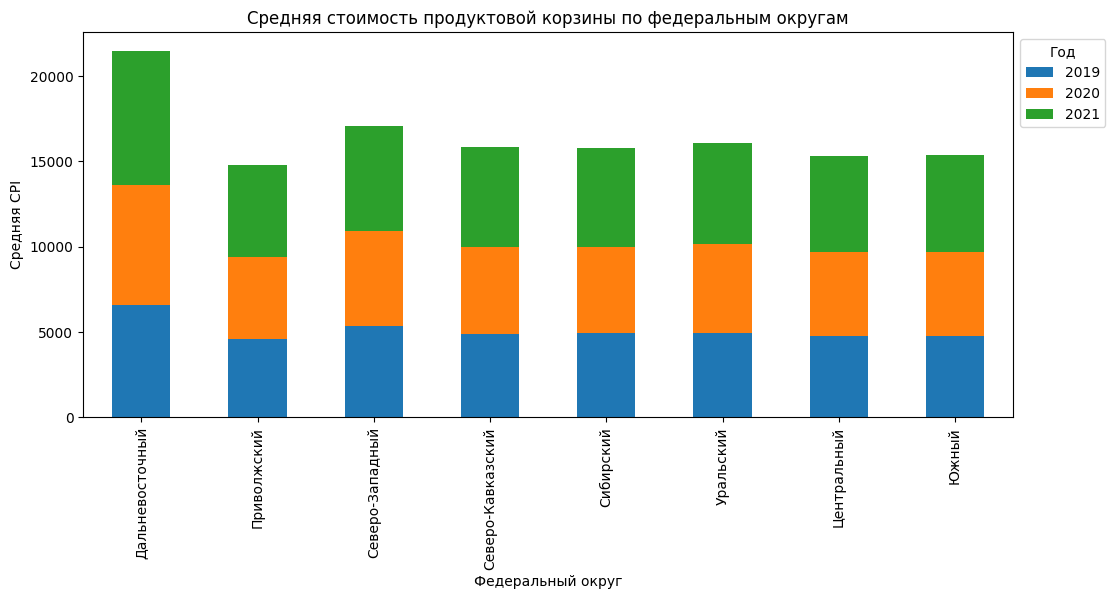

In [ ]:
ax = cpi_district_year.plot.bar(stacked=True, figsize=(12, 5))
plt.title('Средняя стоимость продуктовой корзины по федеральным округам')
plt.xlabel('Федеральный округ')
plt.ylabel('Средняя CPI')
ax.legend(title='Год', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

<font color='green'>Сильное увеличение в 2021 году

In [ ]:
# Процент увеличения по годам по федеральным округам
mean_cpi_district = mean_cpi_year.pivot_table(index='district', columns='year', values='weighted_cpi', aggfunc='mean').reset_index()
pct_change_result = mean_cpi_district[[2019, 2020, 2021]].pct_change(axis=1)

mean_cpi_district['2019_change'] = pct_change_result[2019]
mean_cpi_district['2020_change'] = pct_change_result[2020]
mean_cpi_district['2021_change'] = pct_change_result[2021]

mean_cpi_district

year           district    2019    2020    2021  2019_change  2020_change  \
0       Дальневосточный 6553.40 7067.98 7884.68          NaN         0.08   
1           Приволжский 4609.57 4779.00 5394.13          NaN         0.04   
2       Северо-Западный 5368.86 5555.58 6178.09          NaN         0.03   
3     Северо-Кавказский 4897.51 5101.45 5863.13          NaN         0.04   
4             Сибирский 4919.86 5068.63 5774.99          NaN         0.03   
5             Уральский 4957.49 5221.67 5907.71          NaN         0.05   
6           Центральный 4784.23 4929.38 5584.79          NaN         0.03   
7                 Южный 4787.46 4918.32 5680.37          NaN         0.03   

year  2021_change  
0            0.12  
1            0.13  
2            0.11  
3            0.15  
4            0.14  
5            0.13  
6            0.13  
7            0.15

<font color='green'>В 2021 году темпы роста стоимости продуктовой корзины ускорились. Если в Дальневосточном фо за 2021 год увеличение составило всего 4%, то по остальным регионам от 8 до 12%.

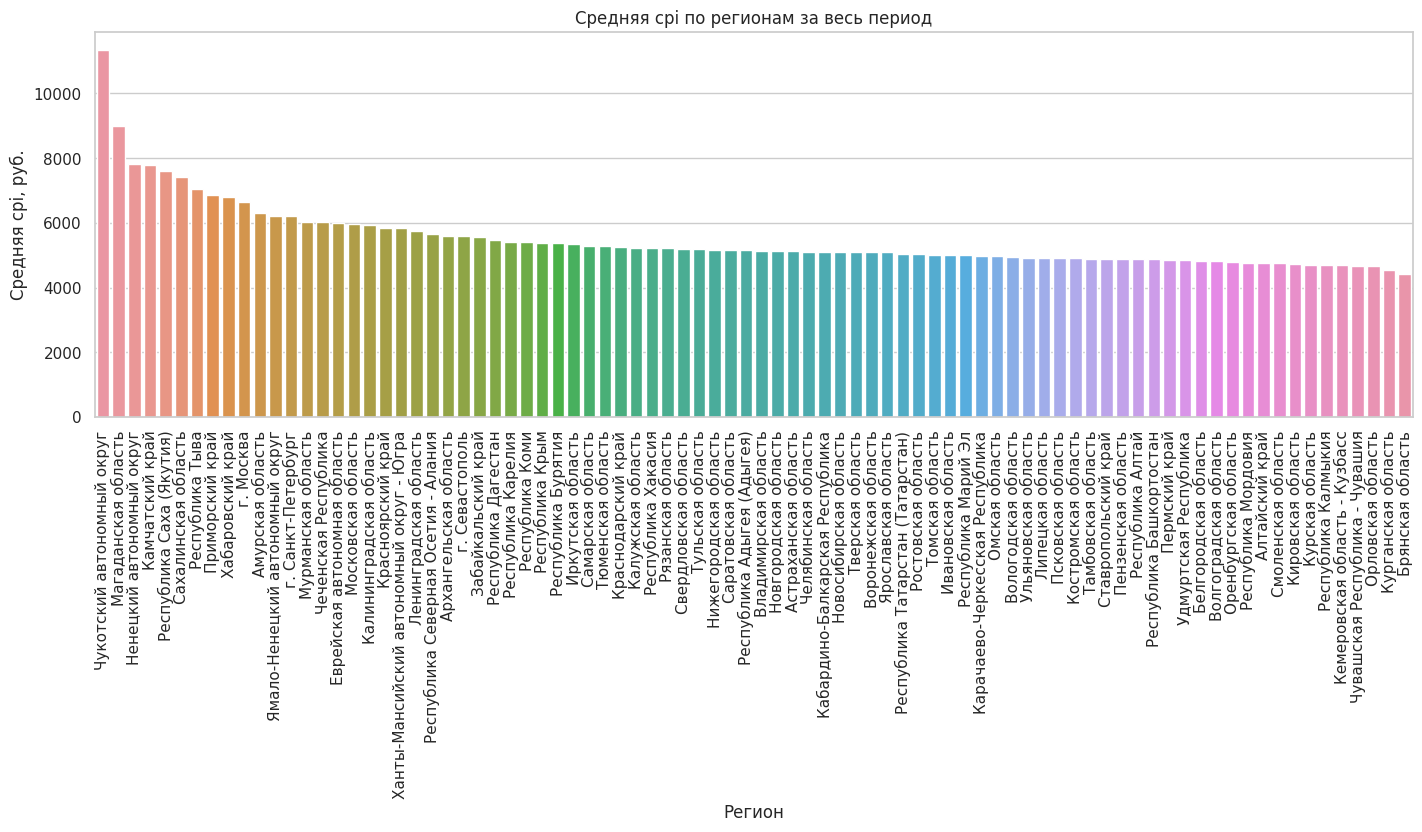

In [ ]:
# Средняя cpi в разрезе регионов
cpi_region = df.groupby('region_name')['weighted_cpi'].mean().sort_values(ascending=False)
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = cpi_region.index, y = cpi_region.values, ax=axs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Средняя cpi по регионам за весь период')
plt.xlabel('Регион')
plt.ylabel('Средняя cpi, руб.')
plt.show()

<font color='green'>Самая высокая стоимость продуктовой корзины наблюдается в Дальневосточном федеральном огруге. Несмотря на то, что в Центральном ФО один из самых низких cpi, исключение составляет Москва, что говорит о высоком уровне жизни, в сравнении с другими регионами, и, как следствие, повышенные цены на основные продовольственные товары. Согласно графикам, cpi возрастает в зависимости отдаленности региона от центра. Уровень цен в этих регионах, скорее всего, связан с дорогой логистикой. Так же, ввиду климатических условий, затруднено местное сельскохозяйственное производство.

In [ ]:
cpi_rating = df.groupby(['region', 'region_name'])['weighted_cpi'].mean().reset_index()
cpi_rating = cpi_rating.merge(population, how='left', left_on='region', right_on='code')\
              [['region_name', 'weighted_cpi', 'rating']].sort_values(by='weighted_cpi', ascending=False)
cpi_rating.head(20)

region_name  weighted_cpi  rating
80                Чукотский автономный округ      11337.94      70
47                       Магаданская область       9003.58      51
78                 Ненецкий автономный округ       7828.53      75
39                           Камчатский край       7799.23      40
12                  Республика Саха (Якутия)       7589.07      71
63                       Сахалинская область       7428.48      31
15                           Республика Тыва       7050.72      85
23                           Приморский край       6864.47      43
25                          Хабаровский край       6809.02      30
75                                 г. Москва       6646.56       1
26                          Амурская область       6289.62      72
81           Ямало-Ненецкий автономный округ       6220.47      17
76                        г. Санкт-Петербург       6203.52       2
49                        Мурманская область       6029.30      35
18                      Чеченская Республика       6023.43      57
77              Еврейская автономная область       5998.31      83
48                        Московская область       5954.34       3
37                   Калининградская область       5932.54       8
22                         Красноярский край       5847.26      37
79  Ханты-Мансийский автономный округ - Югра       5833.76       9

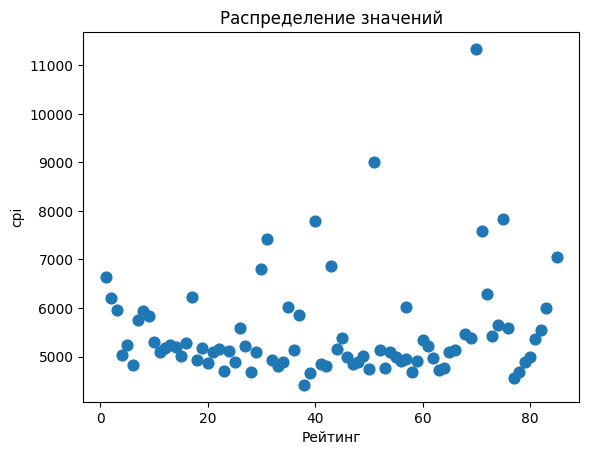

In [ ]:
x = cpi_rating['rating']
y = cpi_rating['weighted_cpi']
plt.scatter(x, y, s=60)

plt.xlabel('Рейтинг')
plt.ylabel('cpi')


# colorbar = plt.colorbar()
# colorbar.set_label('Рейтинг')

plt.title('Распределение значений')

plt.show()

<font color='green'>Действительно, принимая во внимание, что Москва занимает первое место в рейтинге регионов, продукты питания, на самом деле, населению обходятся дешевле, чем в регионах дальневосточного фо и занимают меньшую долю в расходах населения

### <font color='orange'>Динамика и сезонность

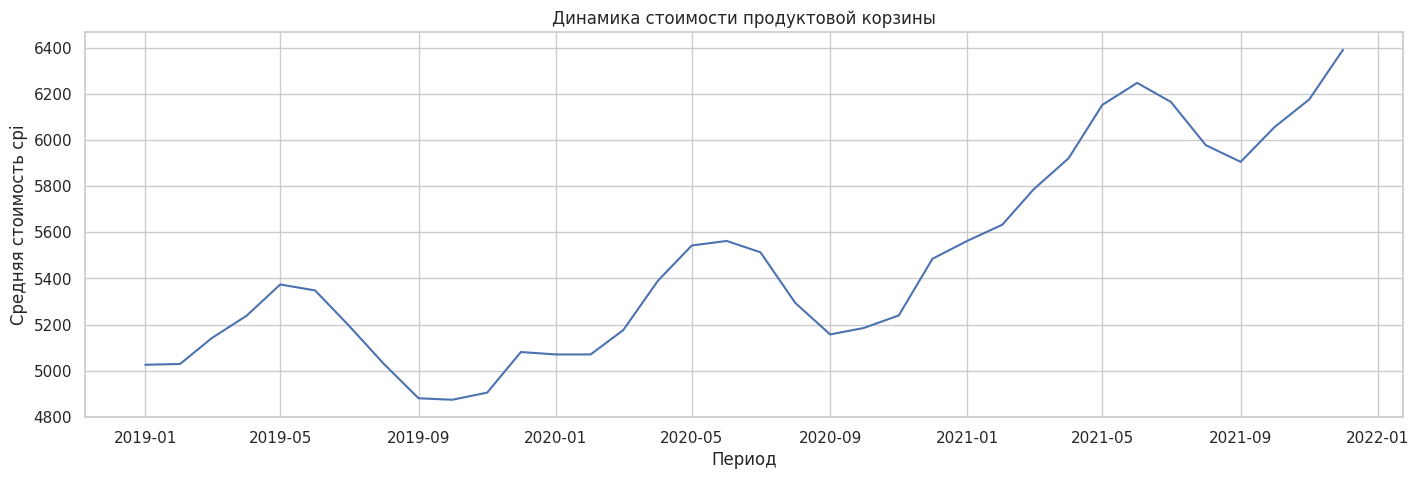

In [ ]:
# Динамика cpi
cpi_date = df.groupby('month_year')['weighted_cpi'].mean().sort_values()
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.lineplot(x = cpi_date.index, y = cpi_date.values, ax=axs)
plt.title('Динамика стоимости продуктовой корзины')
plt.xlabel('Период')
plt.ylabel('Средняя стоимость cpi')
plt.show()

<font color='green'>На графике прослеживается восходящий тренд и наблюдается цикличность в динамике

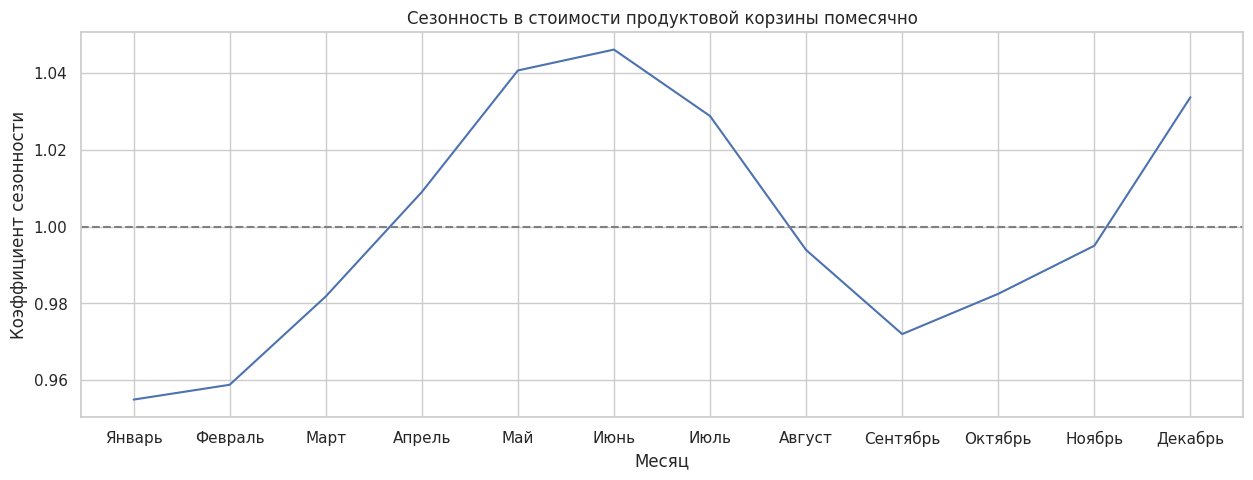

In [ ]:
# Определяю коэффициент сезонности
season = pd.DataFrame(df.groupby('date')['weighted_cpi'].mean()).reset_index()

# преобразую столбец с датами в формат datetime
season['date'] = pd.to_datetime(season['date'])

# добавляю столбец с месяцем
season['month'] = season['date'].dt.month

# группирую по месяцам и вычисляю среднее для каждого месяца

monthly_cpi = season.groupby('month')['weighted_cpi'].mean()

# вычисляю общее среднее значение за весь период
cpi_mean = season['weighted_cpi'].mean()

#  вычисляю коэффициент сезонности
seasonality = monthly_cpi / cpi_mean


months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
x = season['month'].unique()

fig, axs = plt.subplots(figsize=(15, 5))
seasonality.plot()
plt.xticks(x, months)
plt.axhline(y=1, color='grey', linestyle='--')
plt.title('Сезонность в стоимости продуктовой корзины помесячно')
plt.xlabel('Месяц')
plt.ylabel('Коэффициент сезонности')
plt.show()


<font color='green'>Наблюдаются колебания коэффициента сезонности.Рост в весенне-летний период и падение в осенние месяцы. Колебания могут быть из-за разных факторов: смена времени года,инфляция, изменение спроса, увеличение предложений по определенным группам товаров. Например, в августе cpi может падать, из-за того, что на прилавки магазинов начинают в больших объемах поступать овощи. Однако в преддверии этого времени цена продуктовой корзины может быть чуть выше.

In [ ]:
season_cpi = df.groupby(['season','district'])['weighted_cpi'].mean().reset_index()
season_cpi.head()

season           district  weighted_cpi
0       1    Дальневосточный       7045.31
1       1        Приволжский       4840.85
2       1    Северо-Западный       5621.34
3       1  Северо-Кавказский       5287.14
4       1          Сибирский       5170.61

In [ ]:
cpi_region_season = season_cpi.pivot_table(values='weighted_cpi', index='district', columns='season', aggfunc=sum)


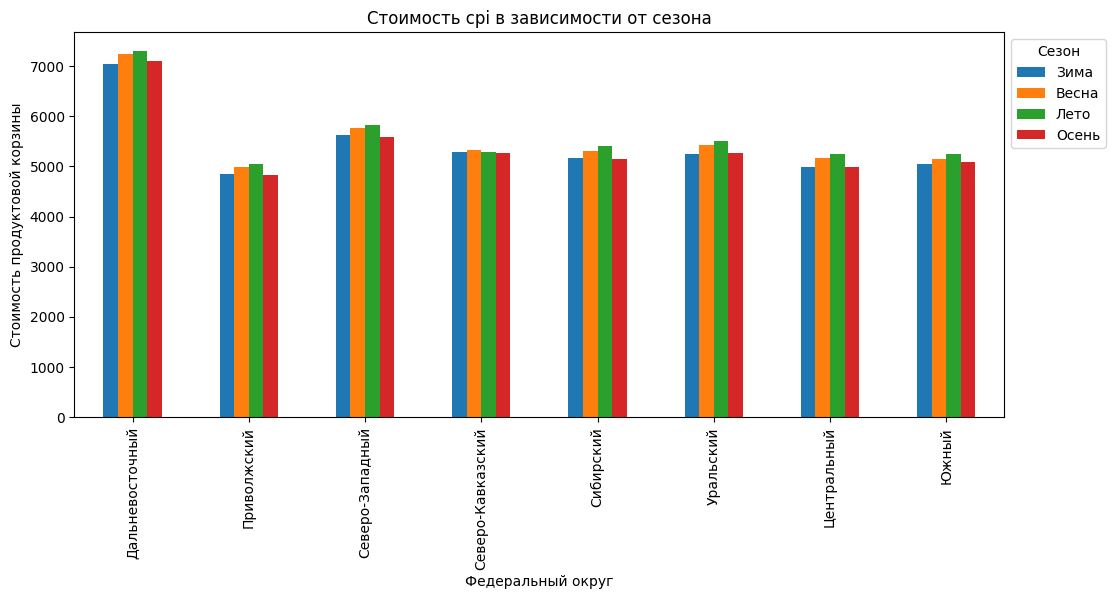

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = cpi_region_season.plot(kind='bar', ax=ax)
ax.set_xlabel('Федеральный округ')
ax.set_ylabel('Стоимость продуктовой корзины')
ax.legend(labels=['Зима', 'Весна', 'Лето', 'Осень'], title='Сезон', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Стоимость cpi в зависимости от сезона')
plt.show()

<font color='green'>Практически во всех регионах увеличение cpi наблюдается в весенне-летний период, исключение составляет Северо-кавказский регион, где разница менее выражена

<font color='brown'>Замечание: нужно иметь ввиду, что в Северо-Кавказском фо есть регионы, по которым не было данных из-за чего анализ может быть искажен

## <font color='orange'>Цены

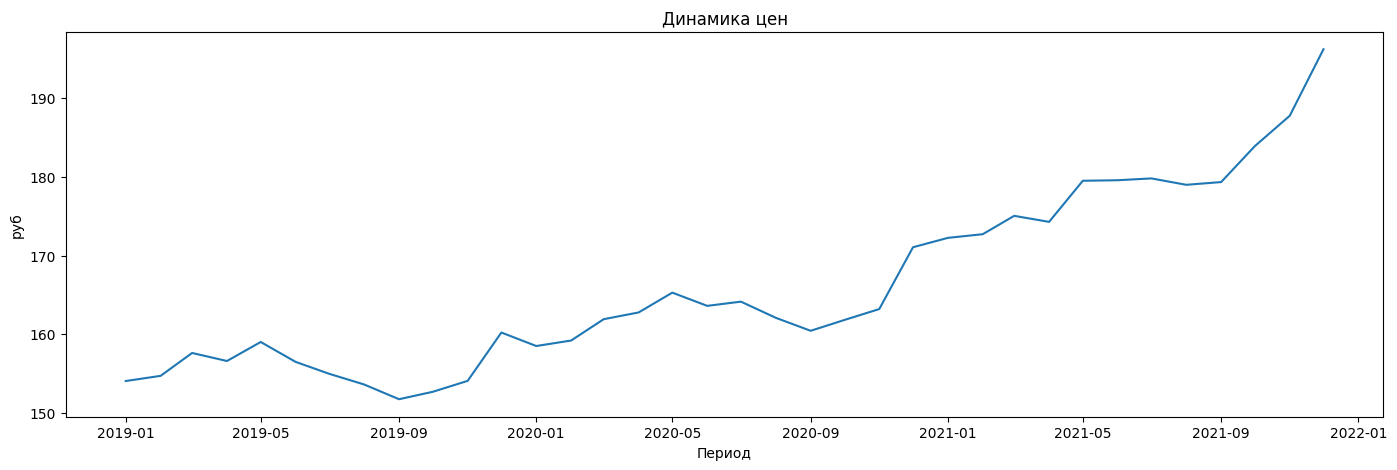

In [ ]:
# Динамика цен
sales = df.groupby('month_year')['price_per_unit'].mean().sort_values()
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.lineplot(x = sales.index, y = sales.values, ax=axs)
plt.title('Динамика цен')
plt.xlabel('Период')
plt.ylabel('руб')
plt.show()

In [ ]:
# Средняя цена по группам товаров
df.groupby('category')['price_per_unit'].mean().sort_values()

category
Соль                    20.44
Капуста                 31.88
Прочие_овощи            33.83
Картофель               34.11
Мука                    35.40
Сахар                   42.35
Столовые_корнеплоды     50.93
Молоко_кефир            58.76
Другие крупы            60.17
Хлеб                    73.29
Рис                     77.64
Макароны                81.58
Масло_раститительное    96.40
Фрукты                  99.32
Бобовые                100.46
Маргарин_жиры          122.46
Огурцы_помидоры        135.66
Мясо_птицы             173.59
Печенье                180.20
Сметана                209.07
Сельдь                 242.64
Свинина                268.52
Творог                 287.56
Конфеты                306.19
Говядина               365.00
Рыба_свеж              398.03
Баранина               406.31
Сыр                    506.60
Масло_сливочное        527.23
Name: price_per_unit, dtype: float64

<font color='green'>Самая высока цен у масла и сыра, дешевле всего соль и некоторые виды овощей. Рассчитаю по каким группам цены изменились сильнее всего

### <font color='orange'>Изменения по группам товаров

In [ ]:
# расчет изменения цен по каждой категории товаров с учетом изменения за каждый день в течение трех лет
grouped  = pd.DataFrame(df.groupby(['category', 'date'])['price_per_unit'].mean().reset_index())
grouped['date'] = pd.to_datetime(grouped['date'], format='%Y.%m.%d')

grouped['pct_change'] = grouped.groupby('category')['price_per_unit'].pct_change(periods=1095) # дней за 3 года

pct_change_category = grouped.groupby('category')['pct_change'].sum().sort_values(ascending=False)
pct_change_category

category
Капуста                 0.91
Картофель               0.91
Другие крупы            0.71
Рыба_свеж               0.68
Бобовые                 0.60
Мука                    0.55
Маргарин_жиры           0.51
Столовые_корнеплоды     0.49
Соль                    0.46
Масло_раститительное    0.40
Говядина                0.37
Рис                     0.34
Мясо_птицы              0.31
Масло_сливочное         0.30
Макароны                0.29
Хлеб                    0.29
Сельдь                  0.26
Фрукты                  0.26
Сыр                     0.22
Сахар                   0.20
Сметана                 0.20
Молоко_кефир            0.19
Творог                  0.17
Печенье                 0.15
Огурцы_помидоры         0.15
Прочие_овощи            0.15
Конфеты                 0.12
Свинина                 0.07
Баранина               -0.13
Name: pct_change, dtype: float64

In [ ]:
# изменение цен в среднем по годам
pct_change_price = df[['category', 'date', 'price_per_unit']]
pct_change_price = pct_change_price.pivot_table(index='category', columns=pct_change_price['date'].dt.year, values='price_per_unit', aggfunc='mean').reset_index()
pct_change_result = pct_change_price[[2019, 2020, 2021]].pct_change(axis=1)

pct_change_price['2019_change'] = pct_change_result[2019]
pct_change_price['2020_change'] = pct_change_result[2020]
pct_change_price['2021_change'] = pct_change_result[2021]
pct_change_price

date              category   2019   2020   2021  2019_change  2020_change  \
0                 Баранина 377.80 413.80 424.22          NaN         0.10   
1                  Бобовые  89.43 100.64 111.20          NaN         0.13   
2                 Говядина 348.88 362.04 383.86          NaN         0.04   
3             Другие крупы  48.22  61.66  70.60          NaN         0.28   
4                  Капуста  33.66  25.34  36.60          NaN        -0.25   
5                Картофель  27.89  29.87  44.58          NaN         0.07   
6                  Конфеты 287.12 301.00 330.47          NaN         0.05   
7                 Макароны  73.72  81.54  89.47          NaN         0.11   
8            Маргарин_жиры 110.25 114.42 142.69          NaN         0.04   
9     Масло_раститительное  80.18  89.02 120.05          NaN         0.11   
10         Масло_сливочное 499.68 534.16 547.73          NaN         0.07   
11            Молоко_кефир  55.68  58.83  61.78          NaN         0.06   
12                    Мука  32.23  35.23  38.72          NaN         0.09   
13              Мясо_птицы 164.50 162.67 193.60          NaN        -0.01   
14         Огурцы_помидоры 126.60 130.18 150.18          NaN         0.03   
15                 Печенье 167.47 177.04 196.09          NaN         0.06   
16            Прочие_овощи  34.40  32.84  34.24          NaN        -0.05   
17                     Рис  70.45  78.93  83.52          NaN         0.12   
18               Рыба_свеж 378.57 384.22 430.61          NaN         0.01   
19                   Сахар  38.86  37.65  50.60          NaN        -0.03   
20                 Свинина 260.80 256.08 288.65          NaN        -0.02   
21                  Сельдь 226.21 239.37 262.12          NaN         0.06   
22                 Сметана 199.83 209.94 217.40          NaN         0.05   
23                    Соль  18.78  20.57  21.96          NaN         0.10   
24     Столовые_корнеплоды  43.79  46.00  63.02          NaN         0.05   
25                     Сыр 474.24 513.65 531.90          NaN         0.08   
26                  Творог 276.79 287.35 298.52          NaN         0.04   
27                  Фрукты  90.99 100.58 106.37          NaN         0.11   
28                    Хлеб  67.62  72.30  79.95          NaN         0.07   

date  2021_change  
0            0.03  
1            0.10  
2            0.06  
3            0.14  
4            0.44  
5            0.49  
6            0.10  
7            0.10  
8            0.25  
9            0.35  
10           0.03  
11           0.05  
12           0.10  
13           0.19  
14           0.15  
15           0.11  
16           0.04  
17           0.06  
18           0.12  
19           0.34  
20           0.13  
21           0.10  
22           0.04  
23           0.07  
24           0.37  
25           0.04  
26           0.04  
27           0.06  
28           0.11

<font color='green'>* Коэффициент вариации (CV) цен за 2021 год



In [ ]:
# Общий
std_ = df[df['date'].dt.year == 2021]['price_per_unit'].std()
mean_ = df[df['date'].dt.year == 2021]['price_per_unit'].mean()

cv = std_ / mean_ *100
cv

88.75361456674523

In [ ]:
grouped = df[df['date'].dt.year == 2021].groupby('region_name')['price_per_unit'].agg(['mean', 'std'])

cv = grouped['std'] / grouped['mean'] *100
grouped['CV_price'] = cv
grouped = grouped.sort_values(by='CV_price', ascending=False)
grouped

mean    std  CV_price
region_name                                            
Республика Дагестан             187.90 176.32     93.84
Астраханская область            171.11 160.40     93.74
Республика Калмыкия             145.67 135.60     93.08
Карачаево-Черкесская Республика 155.86 144.72     92.86
Курганская область              155.44 143.59     92.38
...                                ...    ...       ...
Камчатский край                 254.80 198.60     77.94
Магаданская область             273.79 213.19     77.86
Чукотский автономный округ      333.29 257.13     77.15
Республика Саха (Якутия)        230.48 171.57     74.44
Чеченская Республика            157.61 116.10     73.67

[84 rows x 3 columns]

<font color='green'>Очень высокая изменчивость может быть обусловлена значительным ростом цен в течение всего периода

### <font color='orange'>Топ категорий с самым большим подорожанием

In [ ]:
print('Топ-5 товаров, на которые сильнее всего выросли цены: ')
print(pct_change_category[:5].index)

Топ-5 товаров, на которые сильнее всего выросли цены: 
Index(['Капуста', 'Картофель', 'Другие крупы', 'Рыба_свеж', 'Бобовые'], dtype='object', name='category')


In [ ]:
print('Топ-5 товаров, на которые меньше всего выросли цены: ')
print(pct_change_category[-5:].index)

Топ-5 товаров, на которые меньше всего выросли цены: 
Index(['Огурцы_помидоры', 'Прочие_овощи', 'Конфеты', 'Свинина', 'Баранина'], dtype='object', name='category')


<font color='green'>Здесь рассчитываются изменения на каждый день в течение всего периода, а не разница между начальной и конечной ценой в данных

In [ ]:
top_categories = ['Капуста', 'Картофель', 'Другие крупы', 'Рыба_свеж', 'Бобовые']
df_top = df[df['category'].isin(top_categories)]

df_top = df_top.groupby(['category', 'date'])['price_per_unit'].mean().reset_index()
df_top['date'] = pd.to_datetime(df_top['date'], format='%Y.%m.%d')

df_top

category       date  price_per_unit
0       Бобовые 2019-01-01           99.10
1       Бобовые 2019-01-02           93.97
2       Бобовые 2019-01-03           90.47
3       Бобовые 2019-01-04           90.13
4       Бобовые 2019-01-05           91.81
...         ...        ...             ...
5475  Рыба_свеж 2021-12-27          569.18
5476  Рыба_свеж 2021-12-28          584.86
5477  Рыба_свеж 2021-12-29          663.59
5478  Рыба_свеж 2021-12-30          705.59
5479  Рыба_свеж 2021-12-31          792.17

[5480 rows x 3 columns]

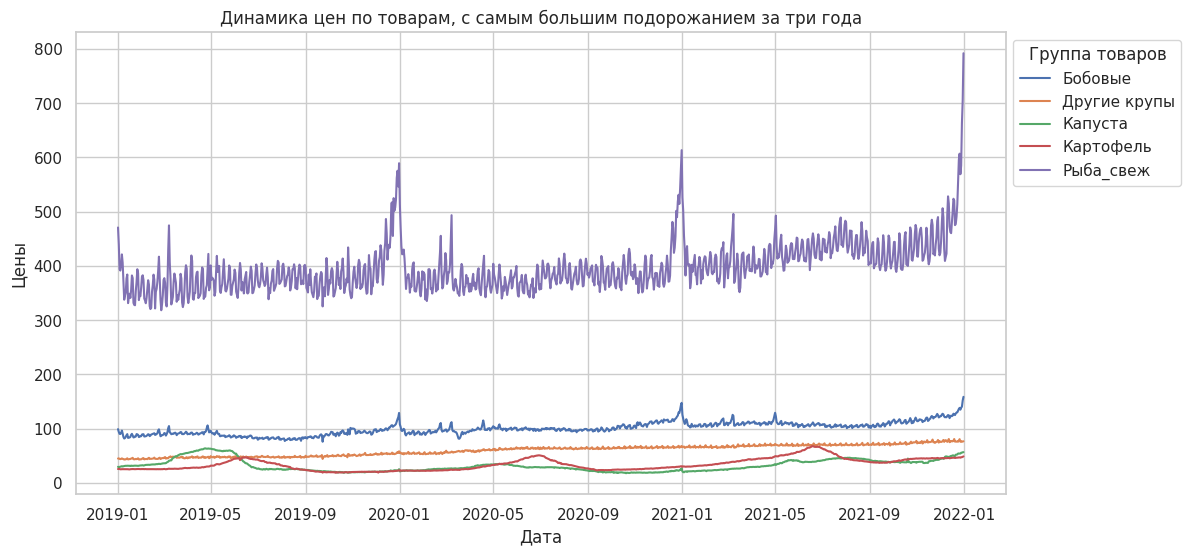

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(data=df_top, x='date', y='price_per_unit', hue='category', ax=ax)
ax.set_xlabel('Дата')
ax.set_ylabel('Цены')
ax.legend(title='Группа товаров', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_title('Динамика цен по товарам, с самым большим подорожанием за три года')
plt.show()

<font color='green'>На крупу цены повышались плавно. На бобовые наблюдается сезонность в период с января по май. На картофель и капусту также наблюдается увеличение цен в летние месяцы из-за того, что заканчивается старый урожай. По рыбе сильные всплески в декабре-январе.

### <font color='orange'>Цены в регионах

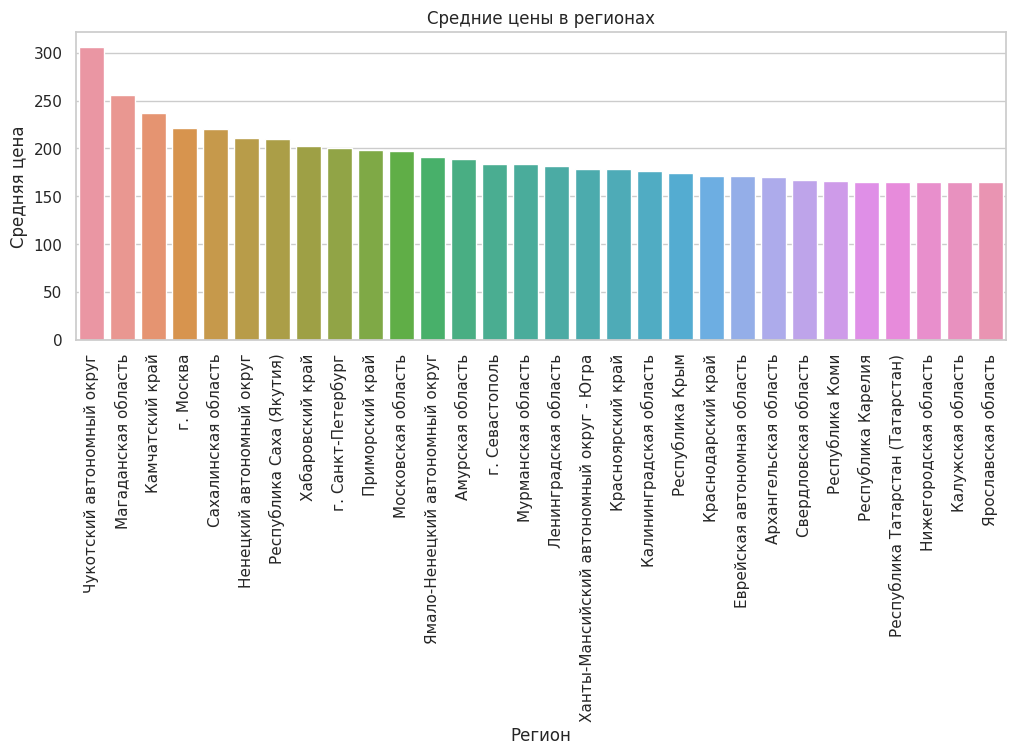

In [ ]:
price_district = df.groupby(['region_name'])['price_per_unit'].mean().sort_values(ascending=False).head(30)
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x=price_district.index, y=price_district.values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Регион')
ax.set_ylabel('Средняя цена')
ax.set_title('Средние цены в регионах')
plt.show()

<font color='green'>Москва так же входит в список регионов с самыми высокими ценами

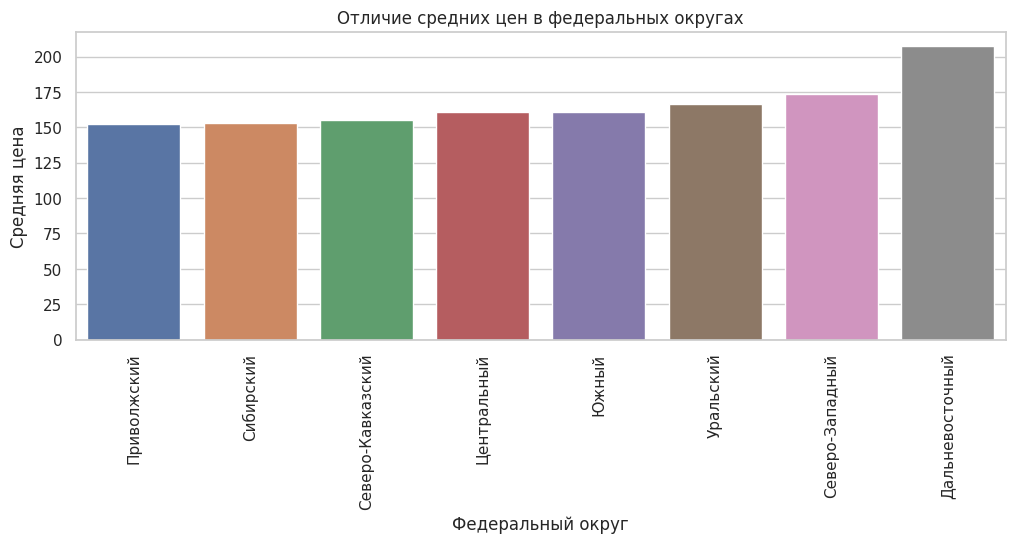

In [ ]:
price_district = df.groupby(['district'])['price_per_unit'].mean().sort_values()
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x=price_district.index, y=price_district.values, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Федеральный округ')
ax.set_ylabel('Средняя цена')
ax.set_title('Отличие средних цен в федеральных округах')
plt.show()

<font color='green'>По аналогии со стоимостью продуктовой корзины, средние цены зависят от уровня жизни. Визуально, Приволжский и Сибирский, а так же Центральный и Южный ФО не имеют различий в средних ценах. Проверю статистически

In [ ]:
privolg = df[df['district'] == 'Приволжский']['price_per_unit'].dropna()
syberian = df[df['district'] == 'Сибирский']['price_per_unit'].dropna()
kavkaz = df[df['district'] == 'Северо-Кавказский']['price_per_unit'].dropna()
south = df[df['district'] == 'Южный']['price_per_unit'].dropna()


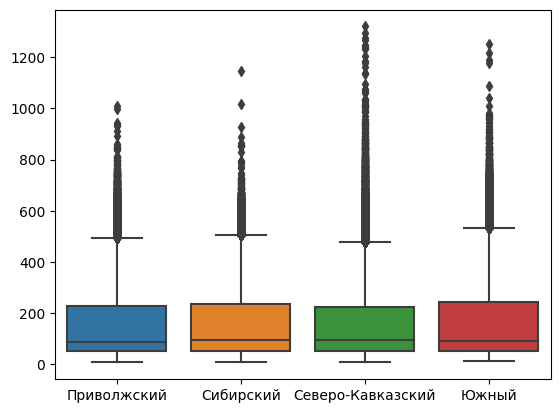

In [ ]:
sns.boxplot([privolg, syberian, kavkaz, south])
plt.gca().set_xticklabels(['Приволжский', 'Сибирский', 'Северо-Кавказский', 'Южный'])
plt.show()

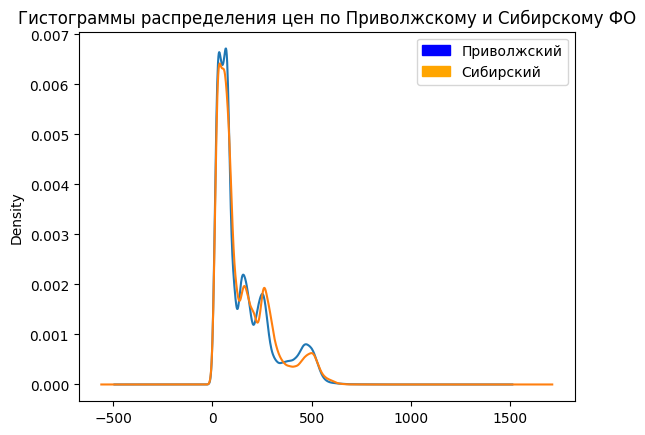

In [ ]:
privolg.plot(kind='density')
syberian.plot(kind='density')
red_patch = mpatches.Patch(color='blue', label='Приволжский')
red_patch2 = mpatches.Patch(color='orange', label='Сибирский')
plt.legend(handles=[red_patch, red_patch2])
plt.title('Гистограммы распределения цен по Приволжскому и Сибирскому ФО')
plt.show()

In [ ]:
# из-за большого количества наблюдений, проверкy на нормальность распределения буду проводить с помощью теста Андерсона-Дарлинга
result_privolg= stats.anderson(privolg)


print('result_privolg: ', 'stat=%.3f' % (result_privolg.statistic))
for i in range(len(result_privolg.critical_values)):
    sl, cv = result_privolg.significance_level[i], result_privolg.critical_values[i]
    if result_privolg.statistic < cv:
        print('Вероятно нормальное на уровне %.1f%%' % (sl))
    else:
        print('Вероятно ненормально на уровне %.1f%%' % (sl))
print()

result_syberian = stats.anderson(syberian)


print('result_syberian: ', 'stat=%.3f' % (result_syberian.statistic))
for i in range(len(result_syberian.critical_values)):
    sl, cv = result_syberian.significance_level[i], result_syberian.critical_values[i]
    if result_syberian.statistic < cv:
        print('Вероятно нормальное на уровне %.1f%%' % (sl))
    else:
        print('Вероятно ненормально на уровне %.1f%%' % (sl))

result_privolg:  stat=25274.769
Вероятно ненормально на уровне 15.0%
Вероятно ненормально на уровне 10.0%
Вероятно ненормально на уровне 5.0%
Вероятно ненормально на уровне 2.5%
Вероятно ненормально на уровне 1.0%

result_syberian:  stat=15558.753
Вероятно ненормально на уровне 15.0%
Вероятно ненормально на уровне 10.0%
Вероятно ненормально на уровне 5.0%
Вероятно ненормально на уровне 2.5%
Вероятно ненормально на уровне 1.0%


In [ ]:
# Проверка на однородность дисперсий
stat_l, p_l = stats.levene(privolg, syberian)

print('stat=%.3f, p=%.3f' % (stat_l, p_l))
alpha = 0.05
if p_l > alpha:
    print('H0 не отвергается: дисперсии выборок равны')
else:
    print('H0 отвергается: дисперсии этих выборок неоднородны')

stat=37.648, p=0.000
H0 отвергается: дисперсии этих выборок неоднородны


In [ ]:
# Проверка с помошью критерия Манна-Уитни
m_stat, p_value = stats.mannwhitneyu(privolg, syberian)
alpha = 0.05
print('stat=%.3f, p=%.10f' % (m_stat, p_value))
if p_value > alpha:
    print('Не отвергаем Н0. Различий в средних в средних ценах нет')
else:
    print('Отвергаем Н0. Наблюдаются значимые разчичия в средних ценах')

stat=64446758303.000, p=0.0000000000
Отвергаем Н0. Наблюдаются значимые разчичия в средних ценах


In [ ]:
print(f'средняя цена по Приволжскому фо: {privolg.mean(): .3f}')
print(f'средняя цена по Сибирскому фо: {syberian.mean(): .3f}')

средняя цена по Приволжскому фо:  152.490
средняя цена по Сибирскому фо:  152.915


<font color='green'>Проверка показала, что существуют значимые различия. Проведу проверку доверительного интервала для разницы средних

In [ ]:
d_dif = []
for i in range(1000):
    priv = privolg.sample(frac=1, replace=True).mean()
    sybe = syberian.sample(frac=1, replace=True).mean()
    d_dif.append(sybe - priv)

<Axes: >

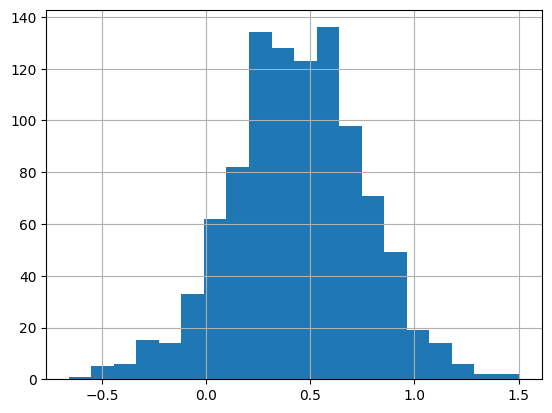

In [ ]:
pd.Series(d_dif).hist(bins=20)

In [ ]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.03   -0.24
0.97    1.07
dtype: float64

<font color='green'>0 входит в доверительный интервал,что не позволяет утверждать, что есть статистически значимые различия между группами

<font color='green'>Провожу проверку для южного и северо-кавказского федерального округов

In [ ]:
result_center= stats.anderson(kavkaz)


print('result_center: ', 'stat=%.3f' % (result_center.statistic))
for i in range(len(result_center.critical_values)):
    sl, cv = result_center.significance_level[i], result_center.critical_values[i]
    if result_center.statistic < cv:
        print('Вероятно нормальное на уровне %.1f%%' % (sl))
    else:
        print('Вероятно ненормально на уровне %.1f%%' % (sl))
print()

result_south = stats.anderson(south)


print('result_syberian: ', 'stat=%.3f' % (result_south.statistic))
for i in range(len(result_south.critical_values)):
    sl, cv = result_south.significance_level[i], result_south.critical_values[i]
    if result_south.statistic < cv:
        print('Вероятно нормальное на уровне %.1f%%' % (sl))
    else:
        print('Вероятно ненормально на уровне %.1f%%' % (sl))

result_center:  stat=9359.685
Вероятно ненормально на уровне 15.0%
Вероятно ненормально на уровне 10.0%
Вероятно ненормально на уровне 5.0%
Вероятно ненормально на уровне 2.5%
Вероятно ненормально на уровне 1.0%

result_syberian:  stat=14317.191
Вероятно ненормально на уровне 15.0%
Вероятно ненормально на уровне 10.0%
Вероятно ненормально на уровне 5.0%
Вероятно ненормально на уровне 2.5%
Вероятно ненормально на уровне 1.0%


In [ ]:
# Проверка на однородность дисперсий
stat_l, p_l = stats.levene(kavkaz, south)

print('stat=%.3f, p=%.3f' % (stat_l, p_l))
alpha = 0.05
if p_l > alpha:
    print('H0 не отвергается: дисперсии выборок равны')
else:
    print('H0 отвергается: дисперсии этих выборок неоднородны')

stat=394.334, p=0.000
H0 отвергается: дисперсии этих выборок неоднородны


In [ ]:
# Проверка с помошью критерия Манна-Уитни
m_stat, p_value = stats.mannwhitneyu(kavkaz, south)
alpha = 0.05
print('stat=%.3f, p=%.3f' % (m_stat, p_value))
if p_value > alpha:
    print('Не отвергаем Н0. Различий в средних в средних ценах нет')
else:
    print('Отвергаем Н0. Наблюдаются значимые разчичия в средних ценах')

stat=19578919435.500, p=0.042
Отвергаем Н0. Наблюдаются значимые разчичия в средних ценах


In [ ]:
print(f'средняя цена по Северо-кавказскому фо: {kavkaz.mean(): .3f}')
print(f'средняя цена по Южному фо: {south.mean(): .3f}')

средняя цена по Северо-кавказскому фо:  154.822
средняя цена по Южному фо:  160.858


In [ ]:
d_dif = []
for i in range(1000):
    c = kavkaz.sample(frac=1, replace=True).mean()
    s = south.sample(frac=1, replace=True).mean()
    d_dif.append(c - s)

<Axes: >

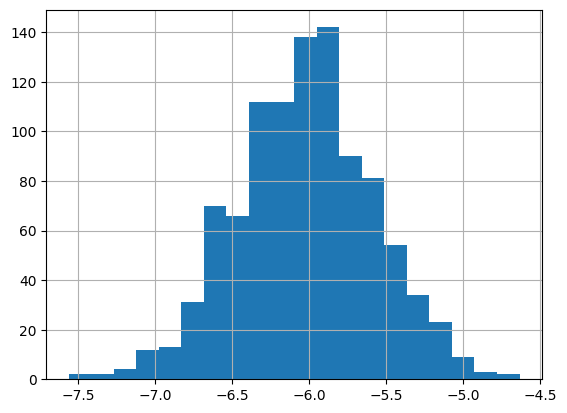

In [ ]:
pd.Series(d_dif).hist(bins=20)

In [ ]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.03   -6.92
0.97   -5.17
dtype: float64

<font color='green'>В среднем, цены в Северо-Кавказском регионе ниже, чем в южном

In [ ]:
# Изменение средних цен по годам
df.groupby(df['date'].dt.year)['price_per_unit'].mean().pct_change()

date
2019    NaN
2020   0.05
2021   0.11
Name: price_per_unit, dtype: float64

## <font color='orange'>Объем реализации

In [ ]:
df[['quantity', 'total_sales']].describe()

quantity  total_sales
count 2544521.00   2544521.00
mean    26983.39   2859852.79
std     62325.76   6800619.65
min         2.27       628.79
25%      2670.81    282412.78
50%      9292.29    929312.92
75%     25347.65   2855132.86
max   1670602.84 215223488.60

In [ ]:
# 17.03.2020 реализовали макисмальное количество молочных продуктов
df[df['quantity'] == df['quantity'].max()]

region region_name     district       date  weighted_cpi  \
2363454      77   г. Москва  Центральный 2020-03-17       6202.51   

             category unit   quantity  price_per_unit  total_sales month_year  \
2363454  Молоко_кефир    л 1670602.84           64.38 107553410.84 2020-03-01   

         season  
2363454       2

In [ ]:
# Минимальное количество
df[df['quantity'] == df['quantity'].min()]

region          region_name           district       date  \
1886107       5  Республика Дагестан  Северо-Кавказский 2020-12-29   

         weighted_cpi category unit  quantity  price_per_unit  total_sales  \
1886107       5310.72   Сельдь   кг      2.27          277.00       628.79   

        month_year  season  
1886107 2020-12-01       1

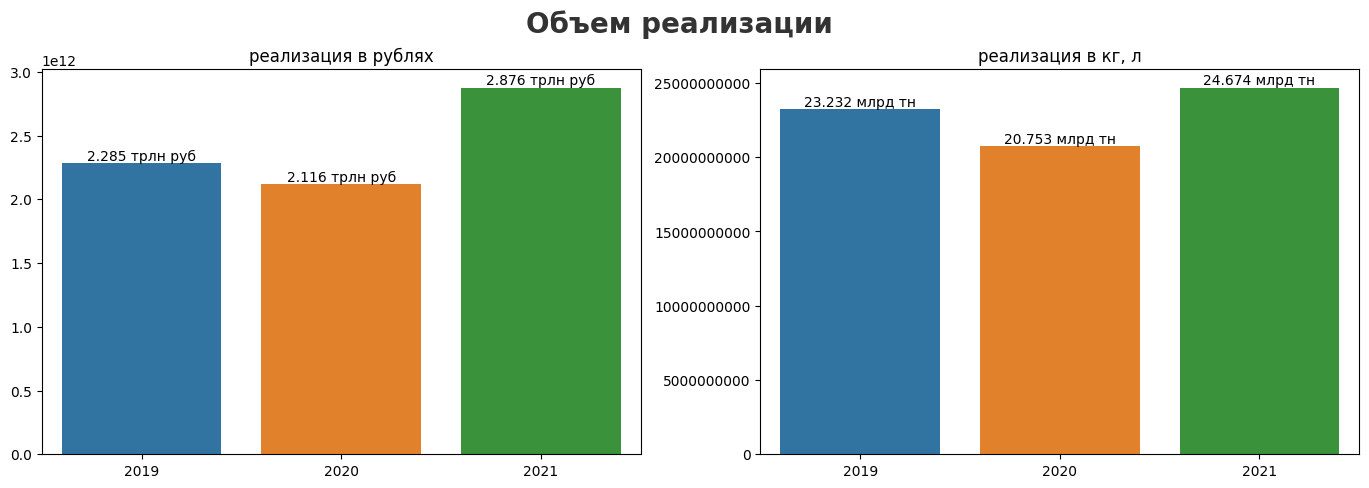

In [ ]:
total_sales = df.groupby(df['date'].dt.year)['total_sales'].sum()

fig, axs = plt.subplots(ncols=2, figsize=(17, 5))
plt.suptitle('Объем реализации', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1)

sns.barplot(x=total_sales.index, y=total_sales.values, ax=axs[0])
sns.barplot(x=quantity_sales.index, y=quantity_sales.values, label='реализация в кг, л', ax=axs[1])

axs[0].set_title('реализация в рублях')
axs[1].set_title('реализация в кг, л')

# форматирование оси y на первом графике
plt.ticklabel_format(style='sci', axis='y', scilimits=(12, 18))

# добавление подписей на бары первого графика
for i, v in enumerate(total_sales.values):
    axs[0].annotate('{:,.3f} трлн руб'.format(v/10**12), xy=(i, v), ha='center', va='bottom')

# форматирование оси y на втором графике
plt.ticklabel_format(style='sci', axis='y', scilimits=(9, 12))

# добавление подписей на бары второго графика
for i, v in enumerate(quantity_sales.values):
    axs[1].annotate('{:,.3f} млрд тн'.format(v/10**9), xy=(i, v), ha='center', va='bottom')

axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
plt.show()

<font color='green'>Визуально объем реализации в рублях изменяется сильнее, чем по весу

In [ ]:
# реализация в рублях по годам
total_sales_rub = df.groupby(df['date'].dt.year)['total_sales'].sum().reset_index()
total_sales_rub['cange'] = total_sales_rub['total_sales'].pct_change()
total_sales_rub

date      total_sales  cange
0  2019 2285301667726.88    NaN
1  2020 2115966220457.77  -0.07
2  2021 2875687589794.86   0.36

In [ ]:
# реализация в кг,л по годам
total_sales_kg = df.groupby(df['date'].dt.year)['quantity'].sum().reset_index()
total_sales_kg['cange'] = total_sales_kg['quantity'].pct_change()
total_sales_kg

date       quantity  cange
0  2019 23232021820.63    NaN
1  2020 20753410069.33  -0.11
2  2021 24674381777.96   0.19

<font color='green'>Падение объема в 2020 году в натуральном выражении превысило падение в рублях примерно на процент увеличения цен (Увеличение cpi в 2020 году составило 4%). А в 2021 году рост, в значительно степени, произошел из-за роста цен, т.к. прирост в рублях составил 36%, а по весу всего на 19%

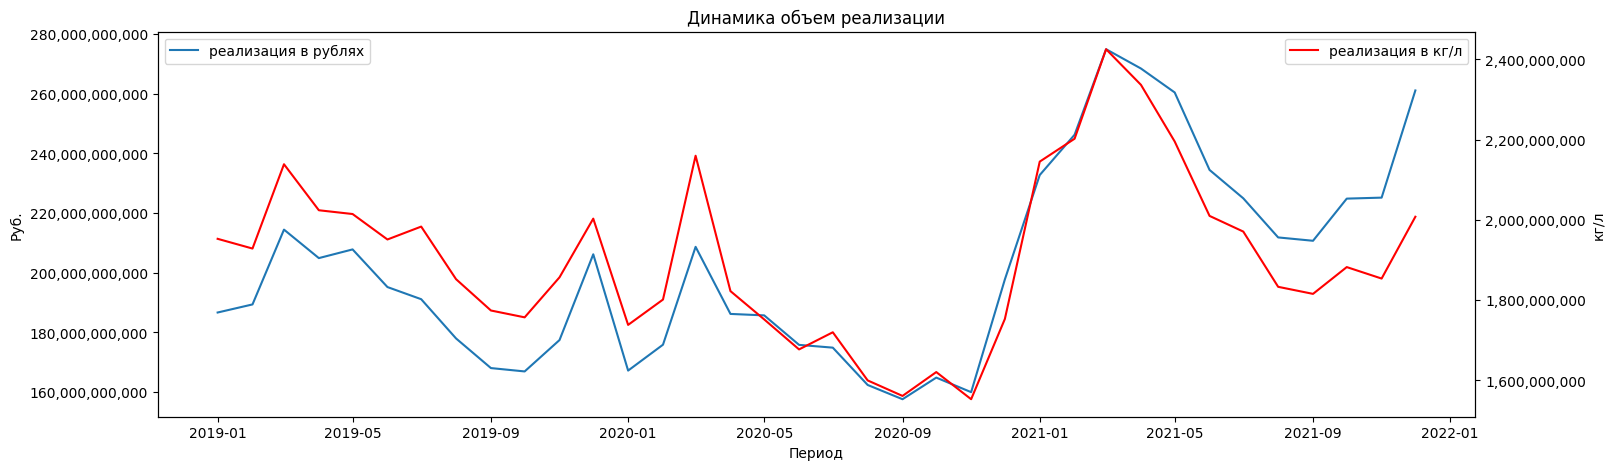

In [ ]:
# Графики по сумме продаж и количеству
total_sales = df.groupby('month_year')['total_sales'].sum()
quantity_sales = df.groupby('month_year')['quantity'].sum()

fig, axs = plt.subplots(figsize=(17, 5))
ax1 = sns.lineplot(x=total_sales.index, y=total_sales.values, label='реализация в рублях', ax=axs)
ax2 = ax1.twinx()  # Вторая ось y

# значения на первой оси y
fmt1 = '{x:,.0f}'
tick1 = mtick.StrMethodFormatter(fmt1)
ax1.yaxis.set_major_formatter(tick1)

# значения на второй оси y
fmt2 = '{x:,.0f}'
tick2 = mtick.StrMethodFormatter(fmt2)
ax2.yaxis.set_major_formatter(tick2)

# второй график на второй оси y
sns.lineplot(x=quantity_sales.index, y=quantity_sales.values, color='red', label='реализация в кг/л', ax=ax2)

#  названия для графиков и осей
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_title('Динамика объем реализации')
ax1.set_xlabel('Период')
ax1.set_ylabel('Руб.')
ax2.set_ylabel('кг/л')

plt.show()

In [ ]:
df[['total_sales', 'quantity']].corr(method='spearman')

total_sales  quantity
total_sales         1.00      0.81
quantity            0.81      1.00

<font color='green'>Направление графиков одинаковое, есть корреляция между реализацией в рублях и по весу, это может говорить о равномерном распределении групп товаров в продуктовом наборе на протяжении всего периода наблюдений. При проведении анализа нужно учитывать, что стоимость может включают в себя оптовые и розничные наценки на товары, в связи с этим буду оринтироваться на натуральных показателях (килограммах, литрах)

<font color='green'>* Коэффициент вариации (CV) объёма продаж за 2021 год

In [ ]:
# Общий
std_ = df[df['date'].dt.year == 2021]['total_sales'].std()
mean_ = df[df['date'].dt.year == 2021]['total_sales'].mean()

cv = std_ / mean_ *100
cv

229.45463923721636

In [ ]:
# по регионам
grouped = df[df['date'].dt.year == 2021].groupby('region_name')['total_sales'].agg(['mean', 'std'])

cv = grouped['std'] / grouped['mean'] *100
grouped['CV_value'] = cv
grouped = grouped.sort_values(by='CV_value', ascending=False)
grouped

mean        std  CV_value
region_name                                                    
Республика Дагестан              322609.16  423302.24    131.21
Чеченская Республика              88922.88  109636.90    123.29
Кабардино-Балкарская Республика  333441.33  394909.91    118.43
Республика Адыгея (Адыгея)       729876.16  854864.13    117.12
Томская область                 2391132.20 2591616.69    108.38
...                                    ...        ...       ...
Республика Карелия              1357074.24 1260293.41     92.87
Чукотский автономный округ       112039.58  103457.70     92.34
Магаданская область              401394.49  370617.13     92.33
Еврейская автономная область     195842.63  169575.85     86.59
Ненецкий автономный округ         79319.87   66457.76     83.78

[84 rows x 3 columns]

<font color='green'>Очень высокая изменчивость может быть обусловлена значительным ростом цен в течение года, тогда общий объем продаж может увеличиться несмотря на то, что количество проданных товаров осталось примерно постоянным и изменение в продажах будет больше, чем изменение в количестве продукции

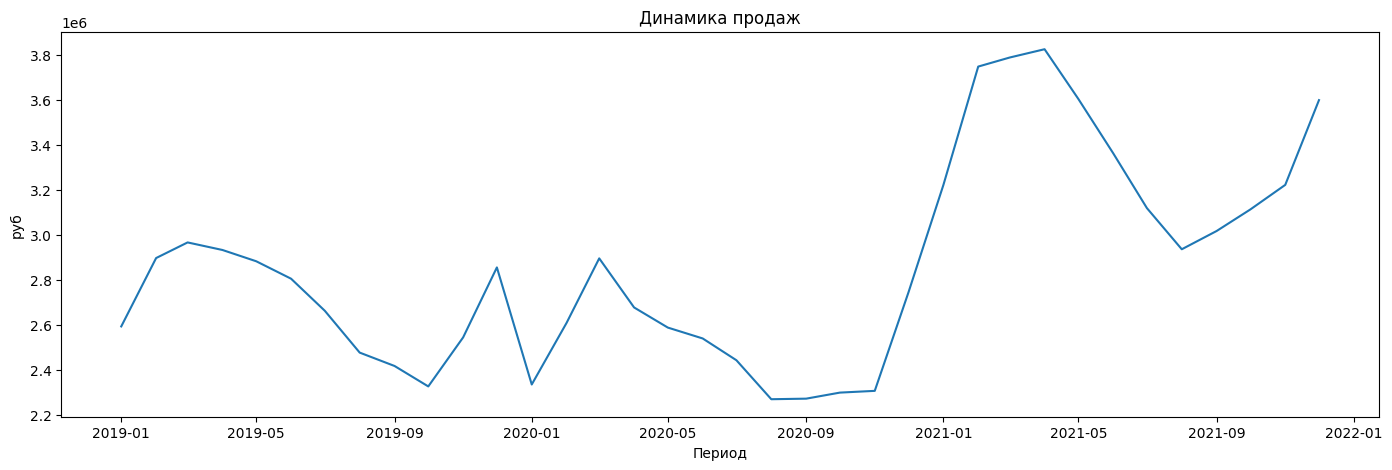

In [ ]:
# Динамика продаж
sales = df.groupby('month_year')['total_sales'].mean().sort_values()
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.lineplot(x = sales.index, y = sales.values, ax=axs)
plt.title('Динамика продаж')
plt.xlabel('Период')
plt.ylabel('руб')
plt.show()

###<h1><font color='orange'>Объем реализации по регионам и ФО

In [ ]:
sum_district = df.groupby('district')['quantity'].sum().sort_values(ascending=False)
sum_district

district
Центральный         23090043563.26
Приволжский         12756391680.31
Северо-Западный      8249276578.47
Сибирский            7576890838.37
Южный                6811638399.34
Уральский            6483618272.63
Дальневосточный      2604717173.87
Северо-Кавказский    1087237161.67
Name: quantity, dtype: float64

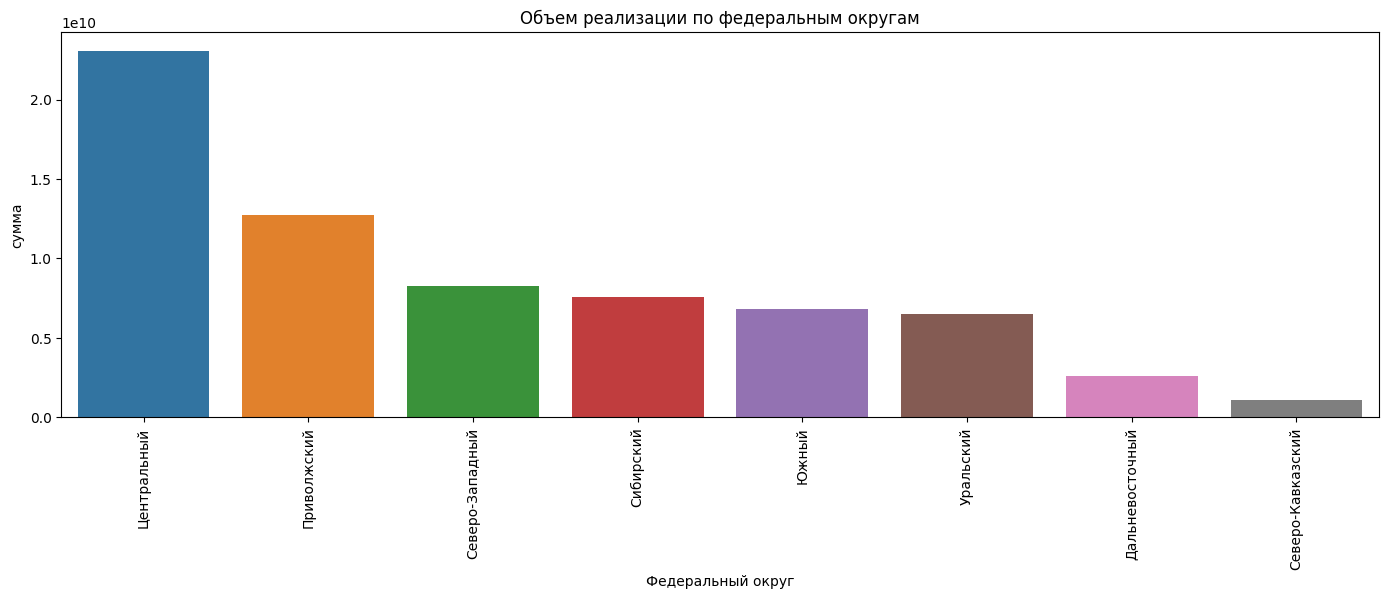

In [ ]:
# Объем по федеральным округам
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = sum_district.index, y = sum_district.values, ax=axs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Объем реализации по федеральным округам')
plt.xlabel('Федеральный округ')
plt.ylabel('сумма')
plt.show()

<font color='green'>Приволжский фо на втором место по объему реализации, несмотря на то, что у него невысокий рейтинг уровня жизни и одна из самых низких cpi. Скорее всего, здесь влияние численности населения

In [ ]:
sum_region = df.groupby('region_name')['quantity'].sum().sort_values(ascending=False)
sum_region

region_name
г. Москва                      6803678398.66
Московская область             6438403714.26
г. Санкт-Петербург             3386225460.99
Краснодарский край             2701405864.84
Свердловская область           2545655779.34
                                    ...     
Еврейская автономная область     47350457.35
Республика Тыва                  31217849.11
Ненецкий автономный округ        11867665.23
Чукотский автономный округ       11206584.05
Чеченская Республика             10404176.12
Name: quantity, Length: 84, dtype: float64

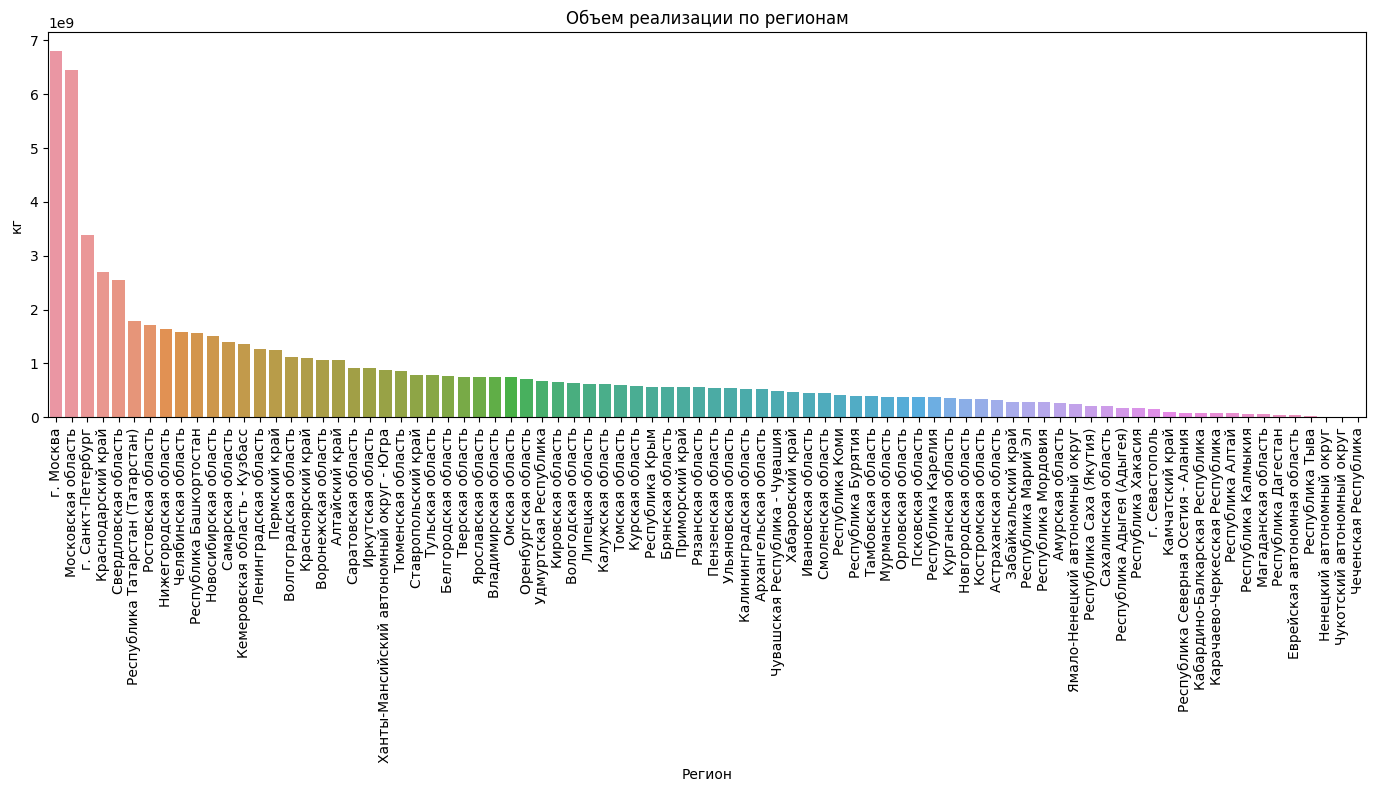

In [ ]:
# Объем в разрезе регионов
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = sum_region.index, y = sum_region.values, ax=axs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Объем реализации по регионам')
plt.xlabel('Регион')
plt.ylabel('кг')
plt.show()

<font color='green'>Большой разрыв между столичным регионом и остальными областями. А как за 2021 год?

In [ ]:
sum_region_2021 = df[df['date'].dt.year == 2021].groupby('region_name')['quantity'].sum().sort_values(ascending=False)
sum_region_2021

region_name
г. Москва                      2345472285.00
Московская область             2214701821.43
г. Санкт-Петербург             1121346475.13
Краснодарский край             1027256902.76
Свердловская область            888884421.13
                                    ...     
Республика Тыва                  16795888.81
Еврейская автономная область     15724045.50
Чеченская Республика              4276414.77
Чукотский автономный округ        3958665.43
Ненецкий автономный округ         3883251.78
Name: quantity, Length: 84, dtype: float64

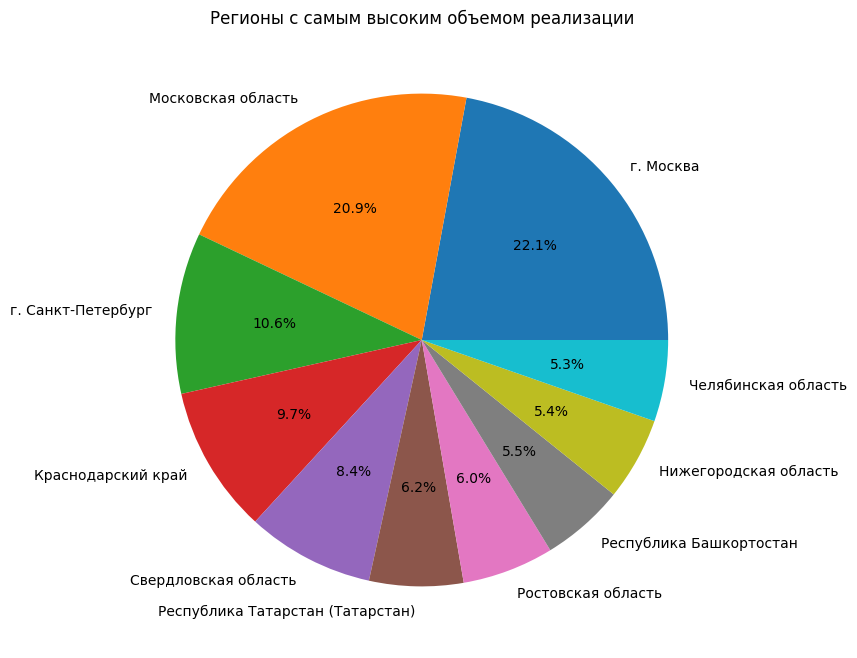

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(sum_region_2021[:10].values, labels=sum_region_2021[:10].index, autopct='%1.1f%%')
plt.title('Регионы с самым высоким объемом реализации')
plt.show()

In [ ]:
ratio_region_2021 = sum_region_2021.reset_index()
ratio_region_2021['ratio'] = ratio_region_2021['quantity'] / ratio_region_2021['quantity'].sum()


In [ ]:
ratio_region_2021.head(20)

region_name      quantity  ratio
0                          г. Москва 2345472285.00   0.10
1                 Московская область 2214701821.43   0.09
2                 г. Санкт-Петербург 1121346475.13   0.05
3                 Краснодарский край 1027256902.76   0.04
4               Свердловская область  888884421.13   0.04
5   Республика Татарстан (Татарстан)  654780667.64   0.03
6                 Ростовская область  637998151.99   0.03
7            Республика Башкортостан  581983655.17   0.02
8              Нижегородская область  577755801.63   0.02
9                Челябинская область  566951237.31   0.02
10             Новосибирская область  528180312.29   0.02
11                 Самарская область  497677262.02   0.02
12     Кемеровская область - Кузбасс  481792841.35   0.02
13                     Пермский край  454503630.15   0.02
14             Ленинградская область  434827260.57   0.02
15                 Красноярский край  417481339.53   0.02
16             Волгоградская область  387785535.25   0.02
17               Воронежская область  386107177.59   0.02
18                    Алтайский край  381036485.91   0.02
19                 Иркутская область  336961996.93   0.01

### <font color='orange'>Изменение объема по годам в разных фо

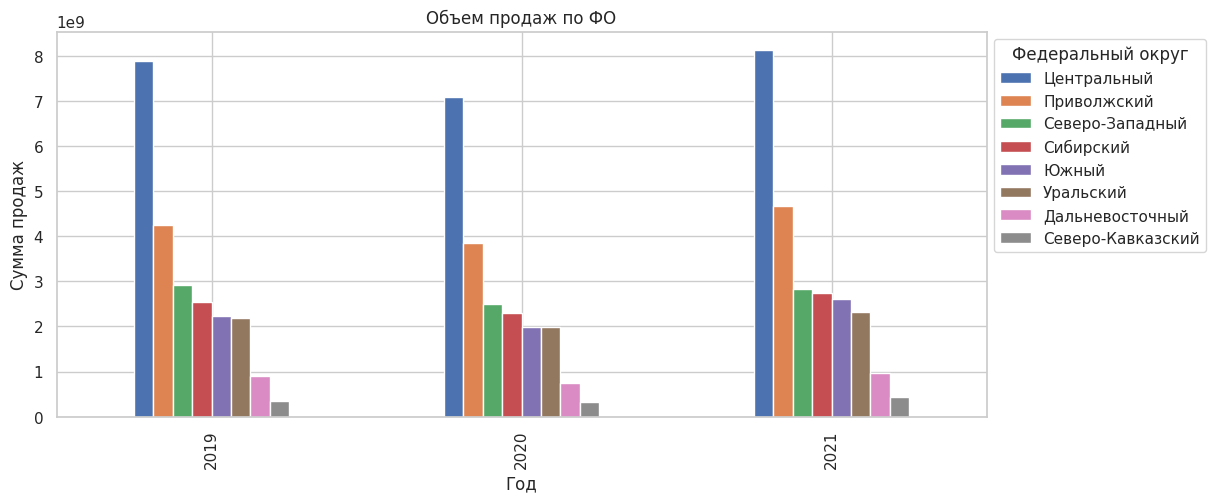

In [ ]:
year_sales_region = df.pivot_table(index=df['date'].dt.year, columns='district', values='quantity', aggfunc='sum')

# сортирую значения по убыванию для каждого года, сохраняя названия регионов
sorted_regions = year_sales_region.apply(lambda x: x.sort_values(ascending=False).index.values, axis=1)
sorted_sales_region = year_sales_region.apply(lambda x: x.sort_values(ascending=False).values, axis=1)
year_sales_region_sorted = pd.DataFrame(sorted_sales_region.values.tolist(), index=sorted_sales_region.index)

fig, ax = plt.subplots(figsize=(12, 5))
ax = year_sales_region_sorted.plot(kind='bar', ax=ax)
ax.set_xlabel('Год')
ax.set_ylabel('Сумма продаж')
ax.legend(sorted_regions.iloc[0], title='Федеральный округ', bbox_to_anchor=(1, 1), loc='upper left')

plt.title('Объем продаж по ФО')
plt.show()

### <font color='orange'>Как объем реализации зависит от численности населения

In [ ]:
# средние продажи за период
value_regions = df[['region', 'region_name', 'district', 'quantity']]
value_regions = value_regions.groupby(['district', 'region', 'region_name'])['quantity'].agg('sum').\
                                          reset_index().sort_values(by='quantity', ascending=False)
value_regions

district  region                   region_name      quantity
75        Центральный      77                     г. Москва 6803678398.66
67        Центральный      50            Московская область 6438403714.26
34    Северо-Западный      78            г. Санкт-Петербург 3386225460.99
78              Южный      23            Краснодарский край 2701405864.84
53          Уральский      66          Свердловская область 2545655779.34
..                ...     ...                           ...           ...
9     Дальневосточный      79  Еврейская автономная область   47350457.35
43          Сибирский      17               Республика Тыва   31217849.11
35    Северо-Западный      83     Ненецкий автономный округ   11867665.23
10    Дальневосточный      87    Чукотский автономный округ   11206584.05
40  Северо-Кавказский      20          Чеченская Республика   10404176.12

[84 rows x 4 columns]

In [ ]:
regions = value_regions.merge(population, how='left', left_on='region', right_on='code')\
                                  [['district', 'code', 'region_name', 'quantity', 'avg_population', 'rating']].sort_values(by='avg_population')

regions

district  code                   region_name      quantity  \
81  Северо-Западный    83     Ненецкий автономный округ   11867665.23   
82  Дальневосточный    87    Чукотский автономный округ   11206584.05   
77  Дальневосточный    49           Магаданская область   54852019.83   
79  Дальневосточный    79  Еврейская автономная область   47350457.35   
75        Сибирский     4              Республика Алтай   74155307.80   
..              ...   ...                           ...           ...   
4         Уральский    66          Свердловская область 2545655779.34   
2   Северо-Западный    78            г. Санкт-Петербург 3386225460.99   
3             Южный    23            Краснодарский край 2701405864.84   
1       Центральный    50            Московская область 6438403714.26   
0       Центральный    77                     г. Москва 6803678398.66   

    avg_population  rating  
81           41440      75  
82           47710      70  
77          135238      51  
79          148506      83  
75          210803      79  
..             ...     ...  
4          4251501      14  
2          5603201       2  
3          5825209       5  
1          8568355       3  
0         13056333       1  

[84 rows x 6 columns]

In [ ]:
regions.groupby('district')[['quantity', 'avg_population']].sum().sort_values(by='avg_population', ascending=False)

quantity  avg_population
district                                        
Центральный       23090043563.26        40263995
Приволжский       12756391680.31        28776673
Сибирский          7576890838.37        16702101
Южный              6811638399.34        16676709
Северо-Западный    8249276578.47        13888796
Уральский          6483618272.63        12270553
Северо-Кавказский  1087237161.67         9673840
Дальневосточный    2604717173.87         7934594

In [ ]:
regions.groupby('district')[['quantity', 'avg_population']].sum().sort_values(by='quantity', ascending=False)

quantity  avg_population
district                                        
Центральный       23090043563.26        40263995
Приволжский       12756391680.31        28776673
Северо-Западный    8249276578.47        13888796
Сибирский          7576890838.37        16702101
Южный              6811638399.34        16676709
Уральский          6483618272.63        12270553
Дальневосточный    2604717173.87         7934594
Северо-Кавказский  1087237161.67         9673840

<font color='green'>Примечательно, что в Северо-Западном фо объем выше, чем в Сибирском на 8% при меньшем количестве населения

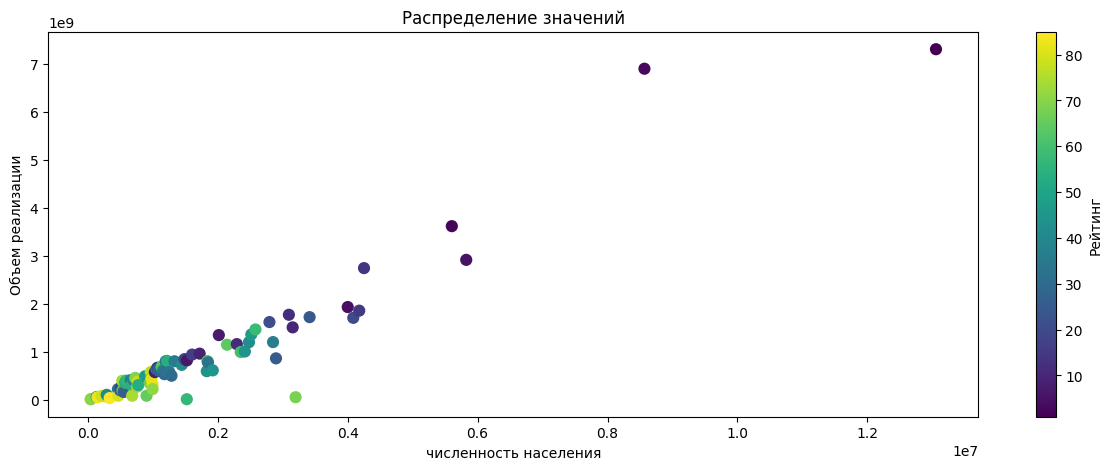

In [ ]:
x = regions['avg_population']
y = regions['quantity']
z = regions['rating']

plt.figure(figsize=(15, 5))
plt.scatter(x, y, c=z, s=60)

plt.xlabel('численность населения')
plt.ylabel('Объем реализации')


colorbar = plt.colorbar()
colorbar.set_label('Рейтинг')

plt.title('Распределение значений')

plt.show()

<font color='green'>В регионах с высоким рейтингом выше численность населения

### <font color='orange'>Корреляция

<font color='green'>Сильная разница в размерности Прологарифмирую значения.

In [ ]:
regions['quantity_log'] = np.log(regions['quantity'])
regions['avg_population_log'] = np.log(regions['avg_population'])

<font color='green'>Не удаляю выбросы, т.к они не являются ошибкой в данных

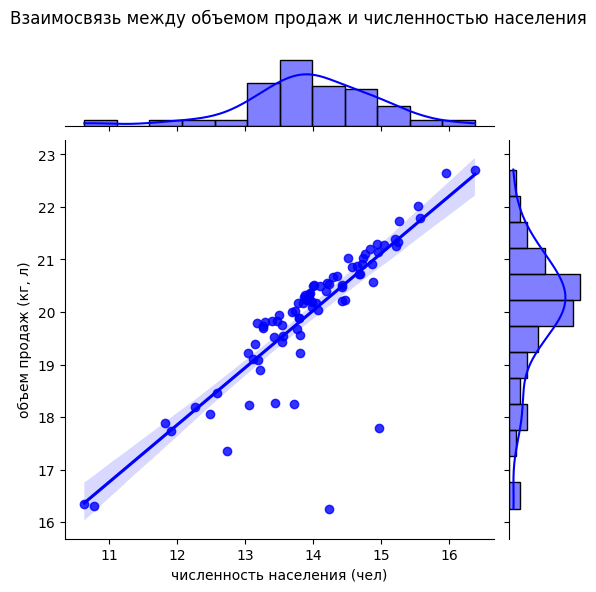

In [ ]:
sns_plot = sns.jointplot(x='avg_population_log', y='quantity_log', data=regions, kind='reg', color='b')
plt.xlabel('численность населения (чел)')
plt.ylabel('объем продаж (кг, л)')
sns_plot.fig.suptitle('Взаимосвязь между объемом продаж и численностью населения', fontsize=12)
plt.subplots_adjust(top=0.9)
plt.show()

<font color='green'>Наблюдается прямая взаимосвязь, т.к. с увеличением численности населения, растет объем продаж. Прослеживается линейный характер взаимосвязи. Распределения ненормальные.

In [ ]:
# Коэффициент корреляции Спирмана
regions[['quantity_log', 'avg_population_log']].corr(method='spearman')

quantity_log  avg_population_log
quantity_log                1.00                0.88
avg_population_log          0.88                1.00

<font color='green'>Коэффициент указывает на сильную связь

### <font color='orange'>Линейная регрессия

<font color='green'>Построю модель линейной регрессии. Она может быть полезна для торговой сети, которая планирует зайти в новый регион

<font color='green'>Данные имеют ограничения по количеству наблюдений. В идеале, хорошо бы отследить данные по каждому населенному пункту, но такой информации у нас нет.

<font color='green'>Воспользуюсь робастной линейной регрессией, т.к. она использует методы, которые менее чувствительны к выбросам и позволяют получить более устойчивую модель

In [ ]:
# делю на зависимую и независимую переменную
X = regions.loc[:, ['avg_population_log']]
y = regions.loc[:, 'quantity_log']

In [ ]:
# Разбиваю на тестовые и тренировочные данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
# построение робастной модели линейной регрессии
model = sm.RLM(y_train, sm.add_constant(X_train)).fit()

In [ ]:
# вывод результатов моделирования
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:           quantity_log   No. Observations:                   58
Model:                            RLM   Df Residuals:                       56
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 08 Jun 2023                                         
Time:                        06:40:48                                         
No. Iterations:                    17                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1561      0

<font color='green'>В данном случае, мы видим, что значения P < 0.05, что означает статистическую значимость для обоих коэффициентов. Также мы видим, что значение коэффициента для логарифма среднего значения населения (avg_population_log) составляет 1.1356, что говорит о том, что увеличение значения этого признака на единицу связано со средним изменением целевой переменной в 1.1356, при условии, что остальные переменные постоянны.
Константа (intercept) имеет значение 4.1561, что означает, что значение целевой переменной ожидается равным 4.1561, когда все другие признаки равны нулю.

In [ ]:
# Результат обучения
y_pred = model.predict(sm.add_constant(X_test))
y_pred

11   21.15
81   16.23
29   20.54
50   19.49
56   19.12
16   21.04
68   19.05
53   19.38
75   18.08
19   20.85
34   19.99
26   20.07
44   19.88
3    21.85
22   20.38
25   20.33
61   19.84
5    21.42
32   20.00
47   20.13
65   19.08
45   19.81
41   19.95
48   19.75
74   18.98
12   20.92
dtype: float64

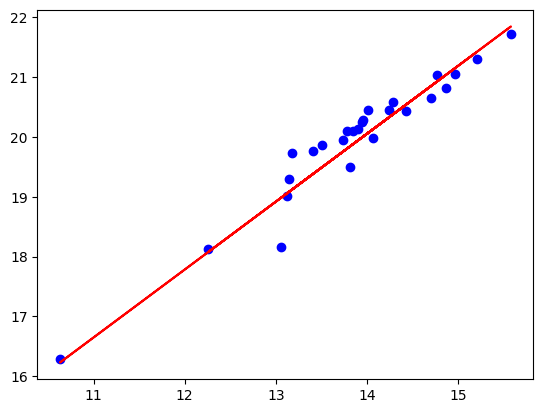

In [ ]:
# График линейной регрессии
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, y_pred, c='r')

In [ ]:
# Коэффициент детерминации

# R-квадрат для предсказанных значений и тестовых ответов
r_squared = r2_score(y_test, y_pred)

print("Коэффициент детерминации: ", r_squared)

Коэффициент детерминации:  0.9288964278165952


<font color='green'>Коэффициент детерминации высокий, модель неплохо объясняет измечивость объема от численности населения.

<font color='green'>***Анализ остатков***

Text(0, 0.5, 'Остатки')

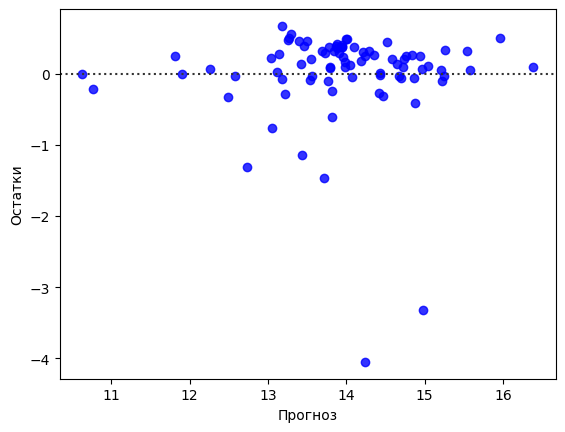

In [ ]:
# Построение графика остатков
sns.residplot(x='avg_population_log', y='quantity_log', data=regions,  color='b')
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

<font color='green'>Изменчивость остатков не совсем равномерная, что обусловлено малым количеством наблюдений для построении модели, и так же тем, что регионов с низкими параметрами мало

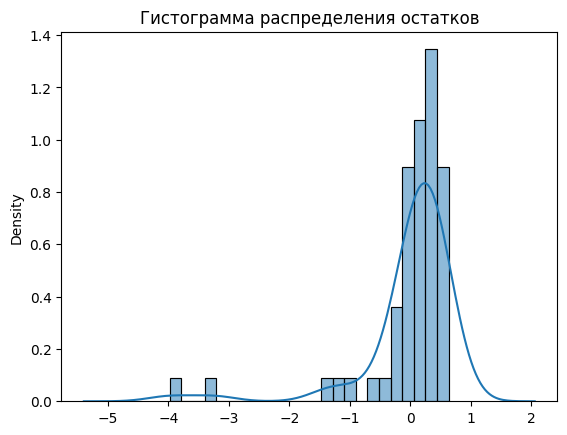

In [ ]:
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
sns.histplot(results.resid, kde=True, stat="density", kde_kws=dict(cut=4), alpha=.5)
plt.title('Гистограмма распределения остатков')
plt.show()

<font color='green'>Модель ошибается из-за неравномерного распределения параметров. Большая часть наблюдений имеет середние параметры, а тех регионов, где низкий объем и численность населения, мало. Если бы данные были представлены в разрезе городов, ошибки бы сгладились. Посмотрю на качество модели линейной регрессии, обученной с помощью бутстрэпа


In [ ]:
# количество выборок
n_bootstrap = 1000

#  массивы для сохранения коэффициентов регрессии из каждой выборки
coef_1_samples = np.zeros(n_bootstrap)
coef_0_samples = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    # случайные выборки с повторением из исходного набора данных
    bootstrap_sample = resample(regions, replace=True, n_samples=len(regions))

    # обучение линейной регрессии на выборке
    model = LinearRegression().fit(bootstrap_sample[['avg_population_log']], bootstrap_sample['quantity_log'])

    # сохраняем коэффициенты регрессии из текущей выборки
    coef_1_samples[i] = model.coef_[0]
    coef_0_samples[i] = model.intercept_


#  стандартные ошибки и доверительные интервалы для коэффициентов регрессии
print('среднеквадратичное отклонение коэффициента наклона линейной регрессии:', np.std(coef_1_samples))
print('95% доверительный интервал для коэффициента наклона линейной регрессии:', np.percentile(coef_1_samples, [2.5, 97.5]))
print('среднеквадратичное отклонение свободного члена линейной регрессии:', np.std(coef_0_samples))
print('95% доверительный интервал для свободного члена:', np.percentile(coef_0_samples, [2.5, 97.5]))


среднеквадратичное отклонение коэффициента наклона линейной регрессии: 0.060543453613014074
95% доверительный интервал для коэффициента наклона линейной регрессии: [0.94637266 1.19014846]
среднеквадратичное отклонение свободного члена линейной регрессии: 0.8163330315144119
95% доверительный интервал для свободного члена: [3.30366854 6.63935038]


<font color='green'>Согласно полученным результатам, можно сделать вывод, что модель достаточно точна и может хорошо предсказывать объем продаж на основе численности населения. Коэффициент наклона линейной регрессии находится в интервале [0.95, 1.19], что говорит о том, что при увеличении численности населения на единицу, объем продаж увеличивается в среднем от 0.95 до 1.19 единиц. Среднеквадратичное отклонение коэффициента наклона составляет 0.06, что говорит о том, что коэффициент наклона достаточно стабилен.

<font color='green'>Доверительный интервал для свободного члена модели находится в интервале [3.30, 6.64], что говорит о том, что объем продаж может быть различным в зависимости от других факторов, влияющих на процесс продаж (например, экономическая конъюнктура, уровень конкуренции и т.д.). Среднеквадратичное отклонение свободного члена составляет 0.81, что говорит о том, что свободный член модели также достаточно стабилен, но может иметь относительно большое смещение.

<font color='green'>Таким образом, можно сделать вывод о том, что модель хорошо предсказывает объем продаж на основе численности населения, но для более точных прогнозов необходимо учитывать и другие факторы.

### <font color='orange'>Расчет показателей на душу населения

<font color='green'>Объем продаж на душу населения за 2021 год

In [ ]:
person_value =  df[df['date'].dt.year == 2021].groupby('region')['quantity'].mean().reset_index()
person_value.columns = ['code', 'quantity']
person_value = person_value.merge(population, how='left', on='code')[['region', 'avg_population', 'quantity']]


In [ ]:
person_value['per_person'] = person_value['quantity'] / person_value['avg_population'] *100
person_value = person_value.sort_values(by='per_person', ascending=False)

In [ ]:
person_value

region  avg_population  quantity  per_person
48                 Московская область         8568355 209230.21        2.44
8                  Республика Карелия          530103  12145.20        2.29
58                  Псковская область          592208  12780.70        2.16
67                   Тверская область         1218365  25971.60        2.13
74                Ярославская область         1200086  24780.10        2.06
..                                ...             ...       ...         ...
15                    Республика Тыва          336775   1814.40        0.54
13  Республика Северная Осетия-Алания          682999   2907.99        0.43
5     Кабардино-Балкарская Республика          903692   3175.73        0.35
4                 Республика Дагестан         3198350   2609.43        0.08
18               Чеченская Республика         1523404    746.45        0.05

[84 rows x 4 columns]

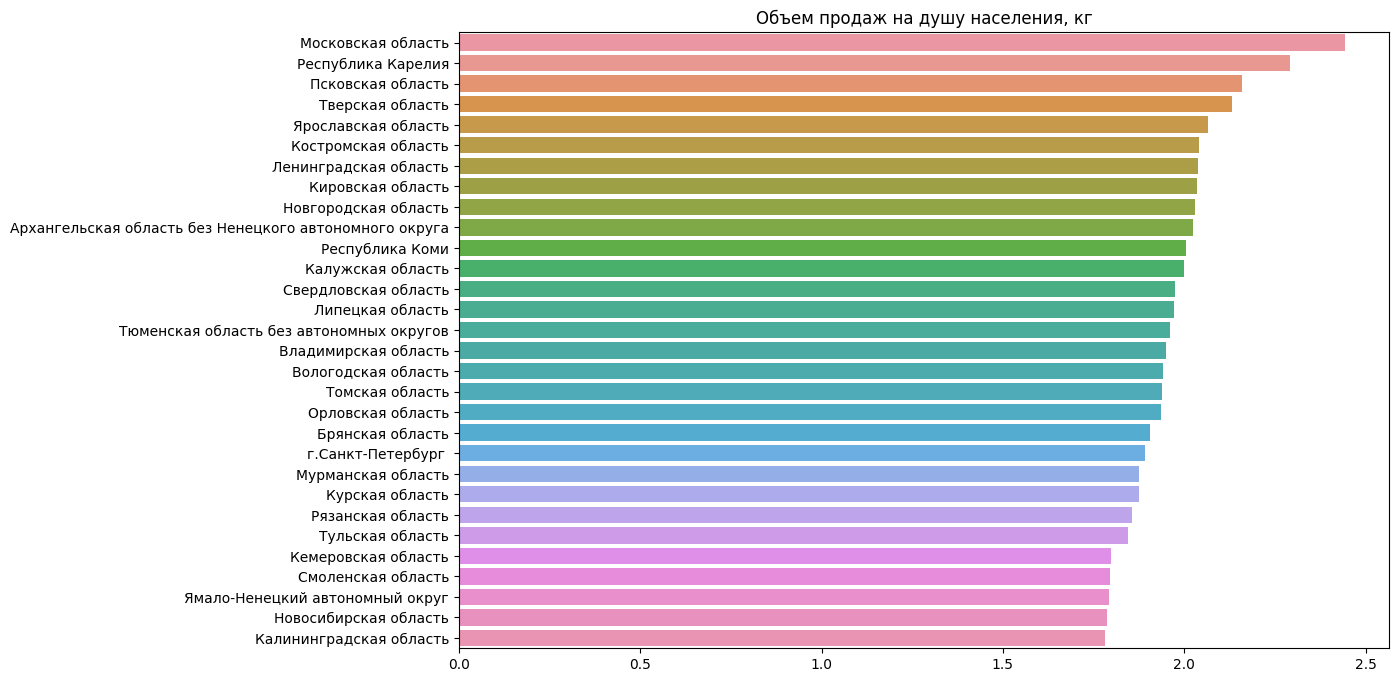

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=person_value[:30]["per_person"], y=person_value[:30]["region"])
ax.set_ylabel("", fontsize=7)
ax.set_xlabel("", fontsize=7)
plt.title('Объем продаж на душу населения, кг')
plt.show()

 <font color='green'>стоит учитывать, что данный показатель не  отражает полную картину потребительского спроса на все товары и услуги, а только по выбранным товарам. Это может быть полезным для анализа рынка конкретной отрасли или группы товаров, но не будет отражать общую экономическую активность региона.

<font color='green'>* Доля категорий товаров в продажах на душу населения за 2021 год


In [ ]:
person_category =  df[df['date'].dt.year == 2021].groupby(['region', 'category'])['quantity'].mean().reset_index()
person_category.columns = ['code', 'category', 'quantity']
person_category = person_category.merge(population, how='left', on='code')[['region', 'category', 'avg_population', 'quantity']]
person_category['per_person'] = person_category['quantity'] / person_category['avg_population']

In [ ]:
region_sales_per_person = person_category.groupby('region')['per_person'].sum().reset_index()
region_sales_per_person

region  per_person
0                                      Алтайский край        0.49
1                                    Амурская область        0.32
2   Архангельская область без Ненецкого автономног...        0.57
3                                Астраханская область        0.35
4                                Белгородская область        0.49
..                                                ...         ...
79                    Ямало-Ненецкий автономный округ        0.50
80                                Ярославская область        0.60
81                                          г. Москва        0.49
82                                     г. Севастополь        0.35
83                                 г.Санкт-Петербург         0.55

[84 rows x 2 columns]

In [ ]:
person_category = person_category.merge(region_sales_per_person, how='left', on='region')\
                                [['region',	'category',	'avg_population', 'quantity', 'per_person_x', 'per_person_y' ]]

In [ ]:
person_category['share_per_person'] = person_category['per_person_x'] / person_category['per_person_y']
person_category.drop(['avg_population', 'quantity', 'per_person_y', 'per_person_x'], axis=1, inplace=True)

In [ ]:
person_category = person_category.sort_values(by=['region', 'share_per_person'], ascending=False)

In [ ]:
person_category

region       category  share_per_person
2188  г.Санкт-Петербург    Молоко_кефир              0.15
2204  г.Санкт-Петербург          Фрукты              0.13
2205  г.Санкт-Петербург            Хлеб              0.10
2182  г.Санкт-Петербург       Картофель              0.08
2190  г.Санкт-Петербург      Мясо_птицы              0.08
...                  ...            ...               ...
581       Алтайский край         Сельдь              0.01
562       Алтайский край       Говядина              0.00
578       Алтайский край      Рыба_свеж              0.00
568       Алтайский край  Маргарин_жиры              0.00
560       Алтайский край       Баранина              0.00

[2403 rows x 3 columns]

In [ ]:
fig = px.bar(person_category, x='region', y='share_per_person', color='category',
             title = 'Доля товарных категорий в общем наборе продуктов на душу населения',
             labels = {'region': 'Регион', 'share_per_person': 'Доля'}, width=1200, height=900)
fig.update_layout(xaxis_tickangle=270)
fig.show()

<font color='green'>Этот показатель может помочь определить спрос на различные товары и потребности рынка

### <font color='orange'>Объем по товарным категориям

In [ ]:
# Как изменялся объем продаж по категориям
year_sales_category = df[['category', 'date', 'quantity']]
year_sales_category = year_sales_category.pivot_table(index='category', columns=year_sales_category['date'].dt.year, values='quantity', aggfunc='mean').reset_index()
pct_change_result = year_sales_category[[2019, 2020, 2021]].pct_change(axis=1)

year_sales_category['2019_change'] = pct_change_result[2019]
year_sales_category['2020_change'] = pct_change_result[2020]
year_sales_category['2021_change'] = pct_change_result[2021]
year_sales_category['growth_since_2019'] = pct_change_result[2020] + pct_change_result[2021]
year_sales_category.sort_values(by='growth_since_2019', ascending=False)

date              category      2019      2020      2021  2019_change  \
2                 Говядина   2622.04   2238.77   3349.71          NaN   
18               Рыба_свеж   1835.26   1616.71   2262.40          NaN   
23                    Соль   8348.03   7347.52  10046.55          NaN   
10         Масло_сливочное   5389.55   5121.63   6586.21          NaN   
25                     Сыр  12750.10  11725.77  15386.98          NaN   
21                  Сельдь   3031.36   2617.28   3499.11          NaN   
16            Прочие_овощи  19940.23  18927.82  23651.80          NaN   
20                 Свинина  14946.60  14067.96  17279.35          NaN   
15                 Печенье  18162.80  15240.10  19632.22          NaN   
7                 Макароны  33606.65  27960.30  36135.32          NaN   
0                 Баранина    525.29    482.03    581.24          NaN   
12                    Мука  21849.70  20141.31  24020.19          NaN   
5                Картофель  42397.35  39569.71  46483.91          NaN   
14         Огурцы_помидоры  31694.57  30413.28  34660.80          NaN   
4                  Капуста  15544.73  15261.45  16945.18          NaN   
13              Мясо_птицы  60857.07  54576.61  64947.36          NaN   
27                  Фрукты  80316.51  71830.50  85032.31          NaN   
17                     Рис   9406.43   8387.06   9900.85          NaN   
22                 Сметана  12056.76  11012.43  12753.71          NaN   
26                  Творог  11310.23  10110.33  11866.65          NaN   
9     Масло_раститительное  22071.96  19757.99  23143.35          NaN   
28                    Хлеб  92741.31  79406.00  95890.83          NaN   
8            Маргарин_жиры    759.32    686.50    794.16          NaN   
11            Молоко_кефир 131047.23 117106.59 136224.89          NaN   
6                  Конфеты  16470.30  13467.89  16604.73          NaN   
24     Столовые_корнеплоды  17407.32  16208.04  17704.63          NaN   
19                   Сахар  46507.65  40683.18  46598.19          NaN   
3             Другие крупы  21381.09  17676.21  20844.95          NaN   
1                  Бобовые   7583.54   6235.70   7019.41          NaN   

date  2020_change  2021_change  growth_since_2019  
2           -0.15         0.50               0.35  
18          -0.12         0.40               0.28  
23          -0.12         0.37               0.25  
10          -0.05         0.29               0.24  
25          -0.08         0.31               0.23  
21          -0.14         0.34               0.20  
16          -0.05         0.25               0.20  
20          -0.06         0.23               0.17  
15          -0.16         0.29               0.13  
7           -0.17         0.29               0.12  
0           -0.08         0.21               0.12  
12          -0.08         0.19               0.11  
5           -0.07         0.17               0.11  
14          -0.04         0.14               0.10  
4           -0.02         0.11               0.09  
13          -0.10         0.19               0.09  
27          -0.11         0.18               0.08  
17          -0.11         0.18               0.07  
22          -0.09         0.16               0.07  
26          -0.11         0.17               0.07  
9           -0.10         0.17               0.07  
28          -0.14         0.21               0.06  
8           -0.10         0.16               0.06  
11          -0.11         0.16               0.06  
6           -0.18         0.23               0.05  
24          -0.07         0.09               0.02  
19          -0.13         0.15               0.02  
3           -0.17         0.18               0.01  
1           -0.18         0.13              -0.05

In [ ]:
growth = year_sales_category[['category', 'growth_since_2019']].sort_values(by='growth_since_2019', ascending=False)
fig = px.bar(growth, x = 'category', y = 'growth_since_2019',
             title = 'Процентное изменение объема продаж по группам товаров за три года',
             labels = {'category': 'Категория', 'growth_since_2019': '% изменения'}, width=1200, height=900)
fig.update_layout(xaxis_tickangle=270)
fig.show()

<font color='green'>Сильнее всего за 2020 года снизился объем по конфетам, в 2021 году увеличение по говядине составило 50%. Практически все товарные категории отыграли падение 2020 года, кроме бобовых

In [ ]:
# Самые продаваемые группы в кг за 2021 год
year_2021 = df[df['date'].dt.year == 2021]
top_category_2021= year_2021.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()
top_category_2021['portion'] = top_category_2021['quantity'] / year_2021['quantity'].sum()
top_category_2021

category      quantity  portion
0           Молоко_кефир 4176246578.96     0.17
1                   Хлеб 2939916968.07     0.12
2                 Фрукты 2607005572.80     0.11
3             Мясо_птицы 1991156166.45     0.08
4              Картофель 1415899880.09     0.06
5                  Сахар 1402186169.98     0.06
6               Макароны 1107800443.42     0.04
7        Огурцы_помидоры 1061174926.91     0.04
8           Прочие_овощи  721687236.91     0.03
9                   Мука  719140604.96     0.03
10  Масло_раститительное  706867415.73     0.03
11          Другие крупы  638105728.66     0.03
12               Печенье  601904340.23     0.02
13   Столовые_корнеплоды  540752423.07     0.02
14               Капуста  511507185.49     0.02
15               Конфеты  509067793.50     0.02
16               Свинина  508462183.71     0.02
17                   Сыр  471749344.36     0.02
18               Сметана  390697039.46     0.02
19                Творог  361742994.00     0.01
20                   Рис  299688749.76     0.01
21                  Соль  290576406.90     0.01
22               Бобовые  210989385.50     0.01
23       Масло_сливочное  201867184.59     0.01
24                Сельдь  103538768.83     0.00
25              Говядина   96059501.27     0.00
26             Рыба_свеж   61804285.28     0.00
27         Маргарин_жиры   21280445.29     0.00
28              Баранина    5506053.78     0.00

In [ ]:
# как распределяеться объем топовых позиций по фо
top_category_fo = year_2021[year_2021['category'] == 'Молоко_кефир'].\
                  groupby(['category', 'district'])['quantity'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_category_fo = top_category_fo.pivot_table(values='quantity', index='district', columns='category', aggfunc=sum)
top_category_fo = top_category_fo.sort_values(by='Молоко_кефир', ascending=False)

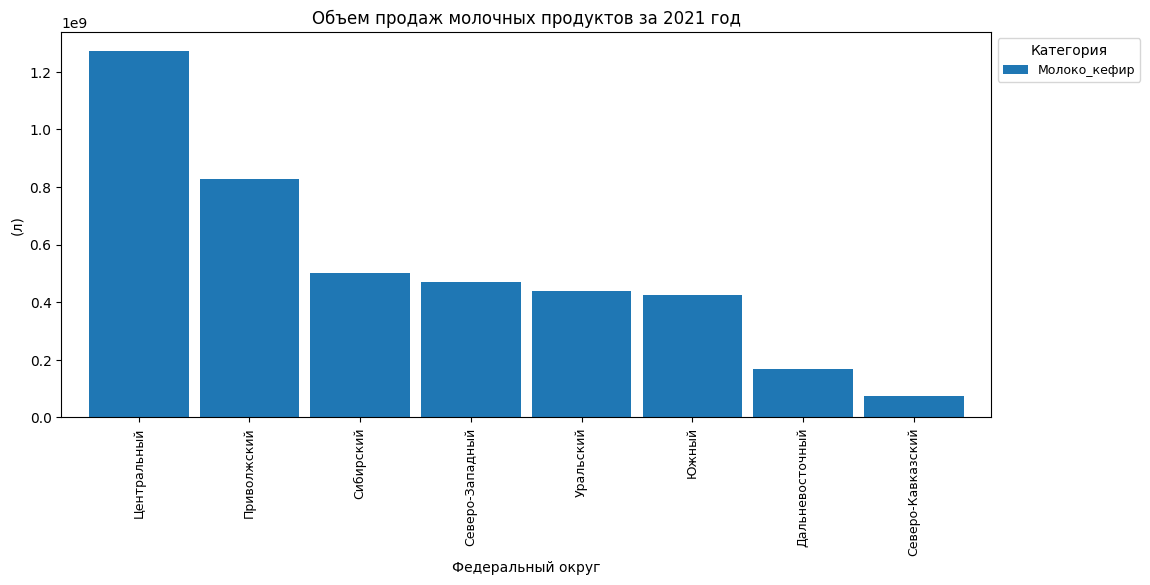

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = top_category_fo.plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('Федеральный округ')
ax.set_ylabel('(л)')
plt.xticks(fontsize=9)
plt.title('Объем продаж молочных продуктов за 2021 год')
ax.legend(title='Категория', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.show()

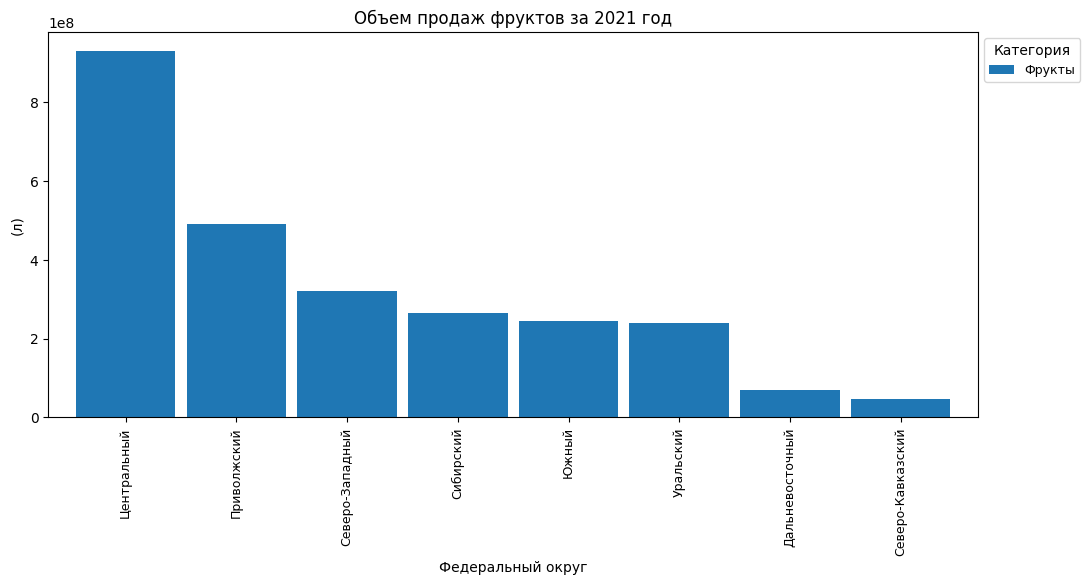

In [ ]:
top_category_fo = year_2021[year_2021['category'] == 'Фрукты'].\
                  groupby(['category', 'district'])['quantity'].sum().sort_values(ascending=False).reset_index()
top_category_fo = top_category_fo.pivot_table(values='quantity', index='district', columns='category', aggfunc=sum)
top_category_fo = top_category_fo.sort_values(by='Фрукты', ascending=False)
fig, ax = plt.subplots(figsize=(12, 5))
ax = top_category_fo.plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('Федеральный округ')
ax.set_ylabel('(л)')
plt.xticks(fontsize=9)
plt.title('Объем продаж фруктов за 2021 год')
ax.legend(title='Категория', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.show()

In [ ]:
# Изменились ли предпочтения по сравнению с 2020 годом?
year_2020 = df[df['date'].dt.year == 2020]
top_category_2020= year_2020.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()
top_category_2020['portion'] = top_category_2020['quantity'] / year_2020['quantity'].sum()
top_category_2020.head(5)

category      quantity  portion
0  Молоко_кефир 3598685604.27     0.17
1          Хлеб 2441099288.90     0.12
2        Фрукты 2208284940.70     0.11
3    Мясо_птицы 1673209801.48     0.08
4         Сахар 1235873599.98     0.06

In [ ]:
# 2019 год
year_2019 = df[df['date'].dt.year == 2019]
top_category_2019 = year_2019.groupby('category')['quantity'].sum().sort_values(ascending=False).reset_index()
top_category_2019['portion'] = top_category_2019['quantity'] / year_2019['quantity'].sum()
top_category_2019.head(5)

category      quantity  portion
0  Молоко_кефир 4017383864.62     0.17
1          Хлеб 2843355740.31     0.12
2        Фрукты 2462343671.10     0.11
3    Мясо_птицы 1865695068.01     0.08
4         Сахар 1409181710.84     0.06

<font color='green'>Доля категорий в общем объеме не изменилась. Больше всего потребляют молочных продуктов, хлеба и фруктов; меньше всего баранину, маргарин и свежую рыбу

### <font color='orange'>Сезонность в объеме реализации

In [ ]:
# Сезонность по федеральным округам
season_sales = df.groupby(['season','district'])['quantity'].mean().reset_index()
season_sales.head()

season           district  quantity
0       1    Дальневосточный   8146.80
1       1        Приволжский  30681.32
2       1    Северо-Западный  25465.72
3       1  Северо-Кавказский   6914.95
4       1          Сибирский  25622.71

In [ ]:
season_sales_region = season_sales.pivot_table(values='quantity', index='district', columns='season', aggfunc=sum)
season_sales_region

season                   1        2        3        4
district                                             
Дальневосточный    8146.80  8836.03  7808.20  7079.80
Приволжский       30681.32 32033.01 28595.76 26764.61
Северо-Западный   25465.72 27054.27 23791.18 22544.29
Северо-Кавказский  6914.95  7326.83  6452.94  6371.45
Сибирский         25622.71 26715.18 24420.66 23120.55
Уральский         36386.65 38031.15 33060.03 31804.16
Центральный       42718.25 45600.82 39233.82 38240.13
Южный             28329.02 29797.23 27254.96 25915.04

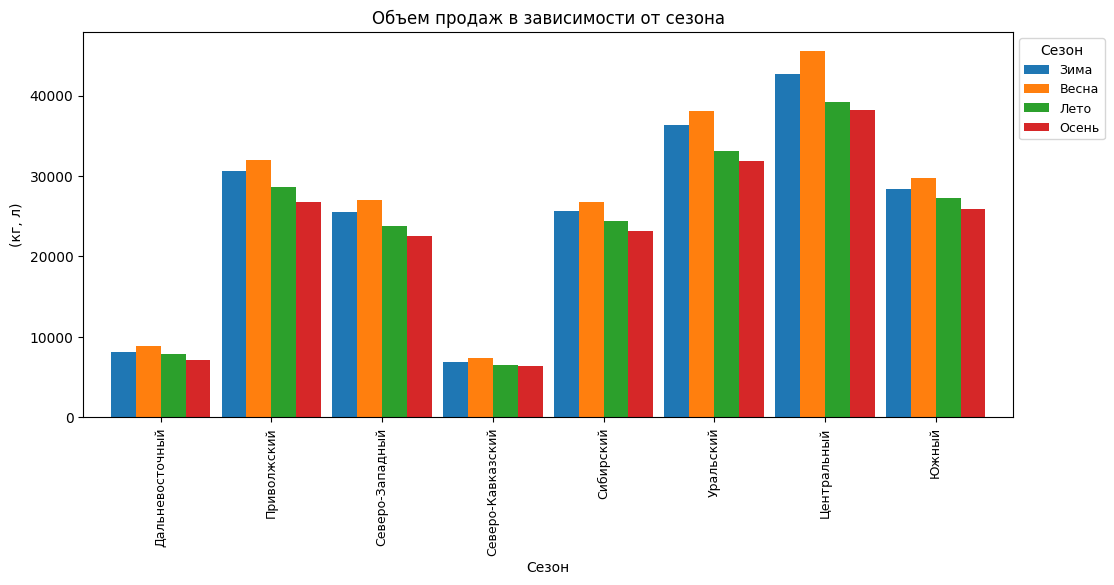

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = season_sales_region.plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('Сезон')
ax.set_ylabel('(кг, л)')
plt.xticks(fontsize=9)
ax.legend(labels=['Зима', 'Весна', 'Лето', 'Осень'], title='Сезон', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.title('Объем продаж в зависимости от сезона')
plt.show()

<font color='green'>Во всех регионах самый высокий объем продаж в весенние месяцы, постепенно снижается к осени. По Северо-кавказскому региону эта тенденция менее выражена

In [ ]:
# Сезонность по товарным категориям
season_category = df.pivot_table(index='category', columns='season', values='quantity', aggfunc='mean')
pct_change_result = season_category[[1, 2, 3, 4]].pct_change(axis=1)
season_category['зима_%'] = pct_change_result[1]
season_category['весна_%'] = pct_change_result[2]
season_category['лето_%'] = pct_change_result[3]
season_category['осень_%'] = pct_change_result[4]
season_category = season_category.sort_values(by=[1, 2, 3, 4], ascending=False)
season_category

season                       1         2         3         4  зима_%  весна_%  \
category                                                                        
Молоко_кефир         132725.06 139141.38 123329.34 117241.30     NaN     0.05   
Фрукты                93739.79  96819.50  63308.29  62430.32     NaN     0.03   
Хлеб                  90152.54  92986.17  87988.85  86201.73     NaN     0.03   
Мясо_птицы            60992.97  64185.04  59567.98  55741.33     NaN     0.05   
Картофель             45874.18  48709.53  39646.66  37004.98     NaN     0.06   
Сахар                 37990.80  42556.66  55230.22  42445.26     NaN     0.12   
Макароны              32434.76  33894.11  32316.40  31596.21     NaN     0.04   
Огурцы_помидоры       26928.11  40403.07  36533.98  24938.05     NaN     0.50   
Мука                  23255.70  24540.08  18996.50  21180.65     NaN     0.06   
Прочие_овощи          21862.88  22729.49  18290.05  20475.15     NaN     0.04   
Масло_раститительное  20687.96  22138.00  21645.24  22140.51     NaN     0.07   
Другие крупы          20527.51  22166.63  18494.99  18672.95     NaN     0.08   
Столовые_корнеплоды   19652.69  19518.50  14438.84  14818.76     NaN    -0.01   
Капуста               18164.30  17278.39  12859.74  15398.52     NaN    -0.05   
Печенье               17077.79  18845.81  17461.98  17304.22     NaN     0.10   
Конфеты               16821.96  16161.89  14131.60  14952.45     NaN    -0.04   
Свинина               16647.35  15996.39  14841.71  14246.61     NaN    -0.04   
Сыр                   14006.14  13526.70  12782.02  12838.68     NaN    -0.03   
Сметана               11925.07  12804.70  12135.09  10885.88     NaN     0.07   
Творог                11395.06  12183.27  10535.45  10259.76     NaN     0.07   
Рис                    9409.91  10047.08   8522.09   8944.92     NaN     0.07   
Бобовые                8386.46   7835.06   5249.57   6281.90     NaN    -0.07   
Соль                   8100.91   8697.75   9438.59   8068.54     NaN     0.07   
Масло_сливочное        6076.18   5909.24   5223.44   5596.29     NaN    -0.03   
Сельдь                 3672.58   3161.49   2380.48   2992.57     NaN    -0.14   
Говядина               2936.83   2802.00   2591.95   2633.06     NaN    -0.05   
Рыба_свеж              2026.74   2047.58   1765.58   1788.46     NaN     0.01   
Маргарин_жиры           812.12    790.80    664.21    716.34     NaN    -0.03   
Баранина                537.79    555.71    543.48    511.35     NaN     0.03   

season                лето_%  осень_%  
category                               
Молоко_кефир           -0.11    -0.05  
Фрукты                 -0.35    -0.01  
Хлеб                   -0.05    -0.02  
Мясо_птицы             -0.07    -0.06  
Картофель              -0.19    -0.07  
Сахар                   0.30    -0.23  
Макароны               -0.05    -0.02  
Огурцы_помидоры        -0.10    -0.32  
Мука                   -0.23     0.11  
Прочие_овощи           -0.20     0.12  
Масло_раститительное   -0.02     0.02  
Другие крупы           -0.17     0.01  
Столовые_корнеплоды    -0.26     0.03  
Капуста                -0.26     0.20  
Печенье                -0.07    -0.01  
Конфеты                -0.13     0.06  
Свинина                -0.07    -0.04  
Сыр                    -0.06     0.00  
Сметана                -0.05    -0.10  
Творог                 -0.14    -0.03  
Рис                    -0.15     0.05  
Бобовые                -0.33     0.20  
Соль                    0.09    -0.15  
Масло_сливочное        -0.12     0.07  
Сельдь                 -0.25     0.26  
Говядина               -0.07     0.02  
Рыба_свеж              -0.14     0.01  
Маргарин_жиры          -0.16     0.08  
Баранина               -0.02    -0.06

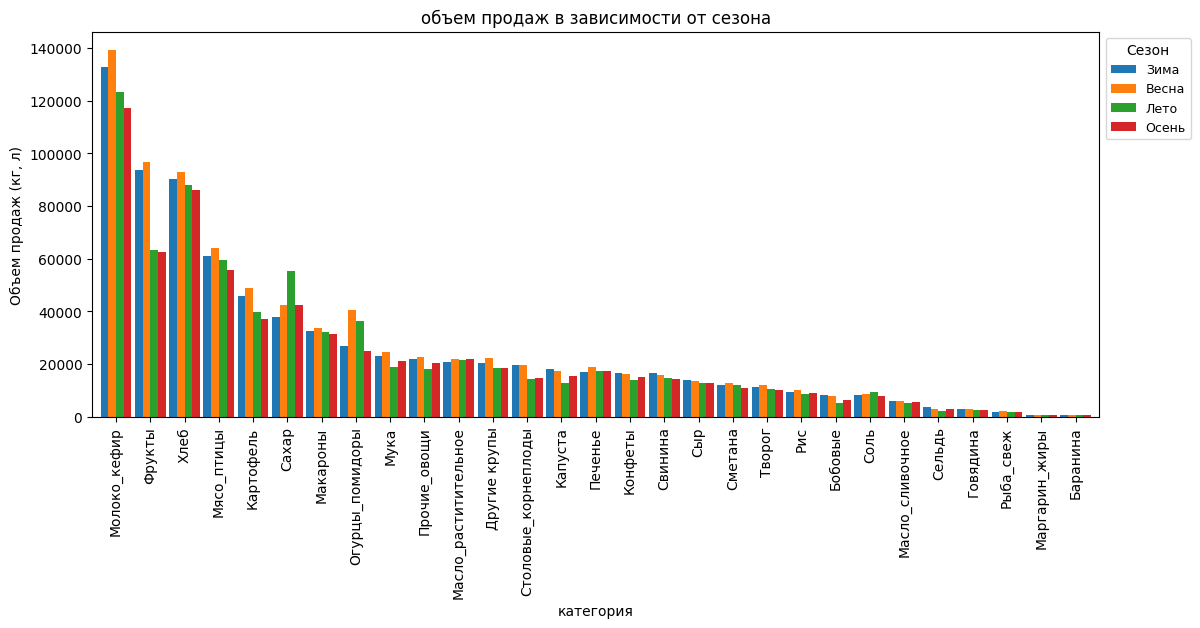

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = season_category[[1, 2, 3, 4]].plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('категория')
ax.set_ylabel('Объем продаж (кг, л)')
ax.legend(labels=['Зима', 'Весна', 'Лето', 'Осень'], title='Сезон', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.title('объем продаж в зависимости от сезона')
plt.show()

<font color='green'>Резкий рост объема реализации сахара летом, объясняется сезоном заготовок. Фрукты падают летом и осенью из-за появления собственного урожая, а так же отток покупателей этой категории на стихийные рынки и покупки без учета ккт. То же касается овощей. Рост объема печенья весной можно объянить Пасхой. Сезонность конфет зимой объясняется новогодними празниками

### <font color='orange'>Сезонность в ценах

In [ ]:
# Средняя цена взависимости от сезона
season_price = df.groupby('season')['price_per_unit'].mean()
season_price

season
1   166.71
2   165.82
3   165.95
4   166.15
Name: price_per_unit, dtype: float64

In [ ]:
# Изменение цен взависимости от сезона по категориям
season_price_category = df.pivot_table(values='price_per_unit', columns='season', index='category', aggfunc='mean')

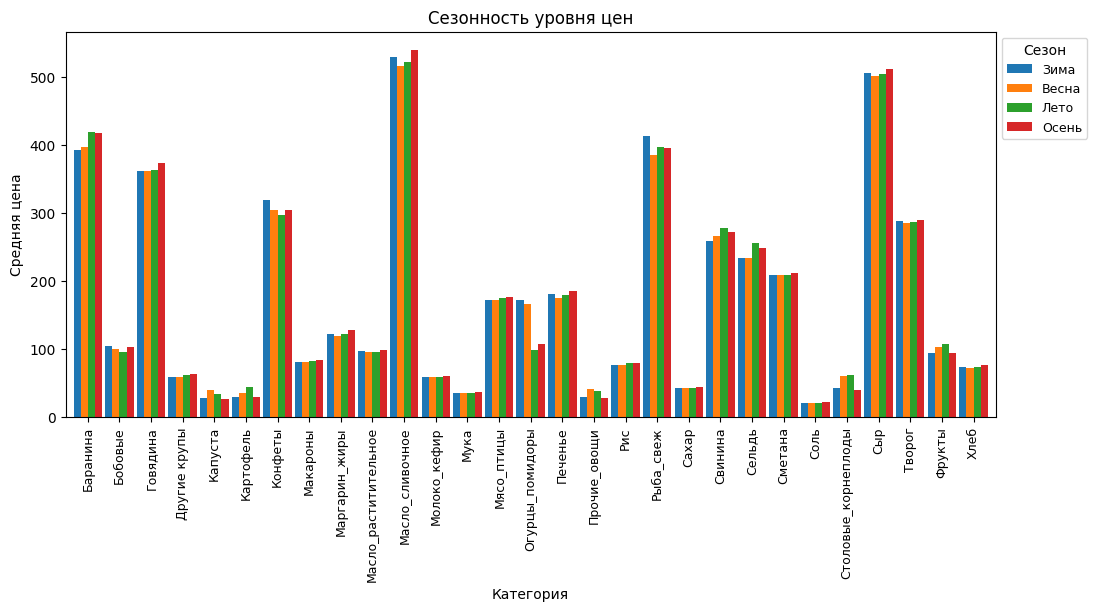

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = season_price_category.plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('Категория')
ax.set_ylabel('Средняя цена')
plt.xticks(fontsize=9)
ax.legend(labels=['Зима', 'Весна', 'Лето', 'Осень'], title='Сезон', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.title('Сезонность уровня цен')
plt.show()

<font color='green'>Можно проследить сезонность на все категории товаров. Так, например, на конфеты цены растут зимой, что может быть обусловлено повышенным спросом. На все овощи - весной и летом из-за того, что заканчивается прошлогодний урожай.

<font color='green'>Можно отследить сезонность в ценах по конкретной группе в каком-то регионе

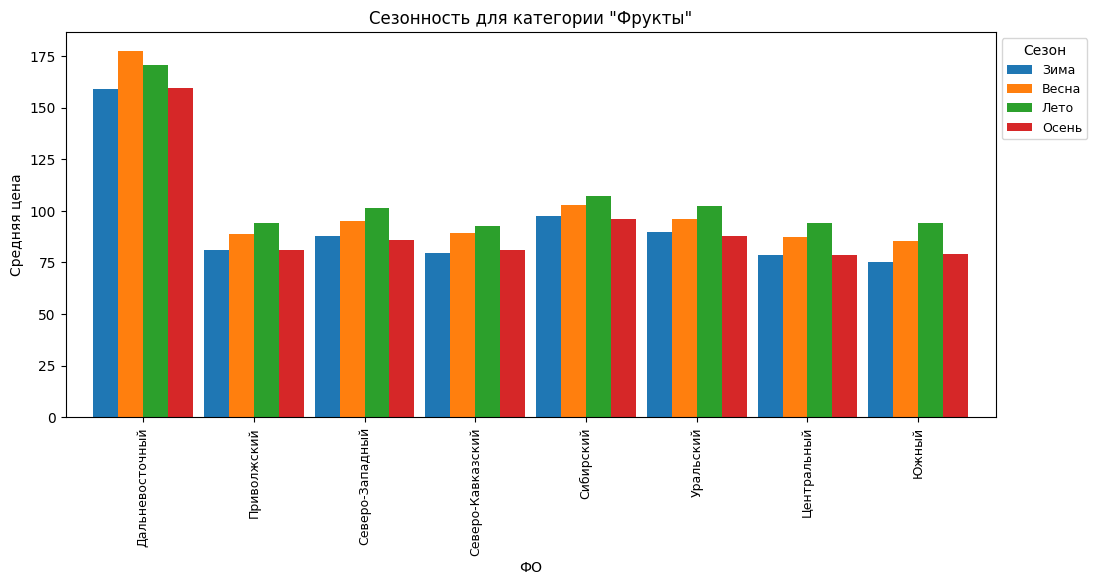

In [ ]:
# Для примера возьму Фрукты
season_price_fruit = df[(df['category'] == 'Фрукты') ].pivot_table(values='price_per_unit', columns='season', index='district', aggfunc='mean')

fig, ax = plt.subplots(figsize=(12, 5))
ax = season_price_fruit.plot(kind='bar', ax=ax, width=0.9)
ax.set_xlabel('ФО')
ax.set_ylabel('Средняя цена')
plt.xticks(fontsize=9)
ax.legend(labels=['Зима', 'Весна', 'Лето', 'Осень'], title='Сезон', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.title('Сезонность для категории "Фрукты"')
plt.show()

<font color='green'>В Дальневосточном ФО самые высокие цены на фрукты весной и снижаются летом, в других же регионах обратная ситуация

### <font color='orange'>Зависимость объема и цен

<font color='green'>Корреляция по товарам

In [ ]:
# За 2021 год
df_grouped = df[df['date'].dt.year == 2021].groupby(['category', 'date'])[['price_per_unit', 'quantity']].mean()

In [ ]:
corr = df_grouped.groupby('category').corr(method='spearman').iloc[0::2,-1].sort_values()
corr

category                            
Молоко_кефир          price_per_unit   -0.83
Творог                price_per_unit   -0.76
Сметана               price_per_unit   -0.75
Капуста               price_per_unit   -0.73
Печенье               price_per_unit   -0.70
Макароны              price_per_unit   -0.69
Другие крупы          price_per_unit   -0.57
Хлеб                  price_per_unit   -0.54
Мясо_птицы            price_per_unit   -0.52
Рис                   price_per_unit   -0.50
Сельдь                price_per_unit   -0.48
Соль                  price_per_unit   -0.43
Масло_сливочное       price_per_unit   -0.41
Сахар                 price_per_unit   -0.41
Масло_раститительное  price_per_unit   -0.36
Свинина               price_per_unit   -0.31
Маргарин_жиры         price_per_unit   -0.29
Говядина              price_per_unit   -0.26
Сыр                   price_per_unit   -0.25
Столовые_корнеплоды   price_per_unit   -0.18
Фрукты                price_per_unit   -0.17
Картофель         

<font color='green'>У большинства категорий наблюдается обратная зависимость объема продаж и цен. Потребление некоторых категорий снижается при увеличении цен. Низкое влияние цен на объем наблюдается на картофель, овощи и фрукты, а также конфеты и свежую рыбу. Увеличение цен и объема у бобовых, вызвано какими-то дополнительными факторами, например, возрастающим спросом


<font color='green'>Построение графиков корреляции объема продаж и цены для категорий с наибольшей зависимостью

In [ ]:
top_corr = ['Молоко_кефир', 'Творог', 'Сметана', 'Капуста', 'Печенье', 'Бобовые']
df_grouped = df[(df['category'].isin(top_corr)) & (df['date'].dt.year == 2021)].\
                  groupby(['category', 'date'])\
                   [['price_per_unit', 'quantity']].mean()


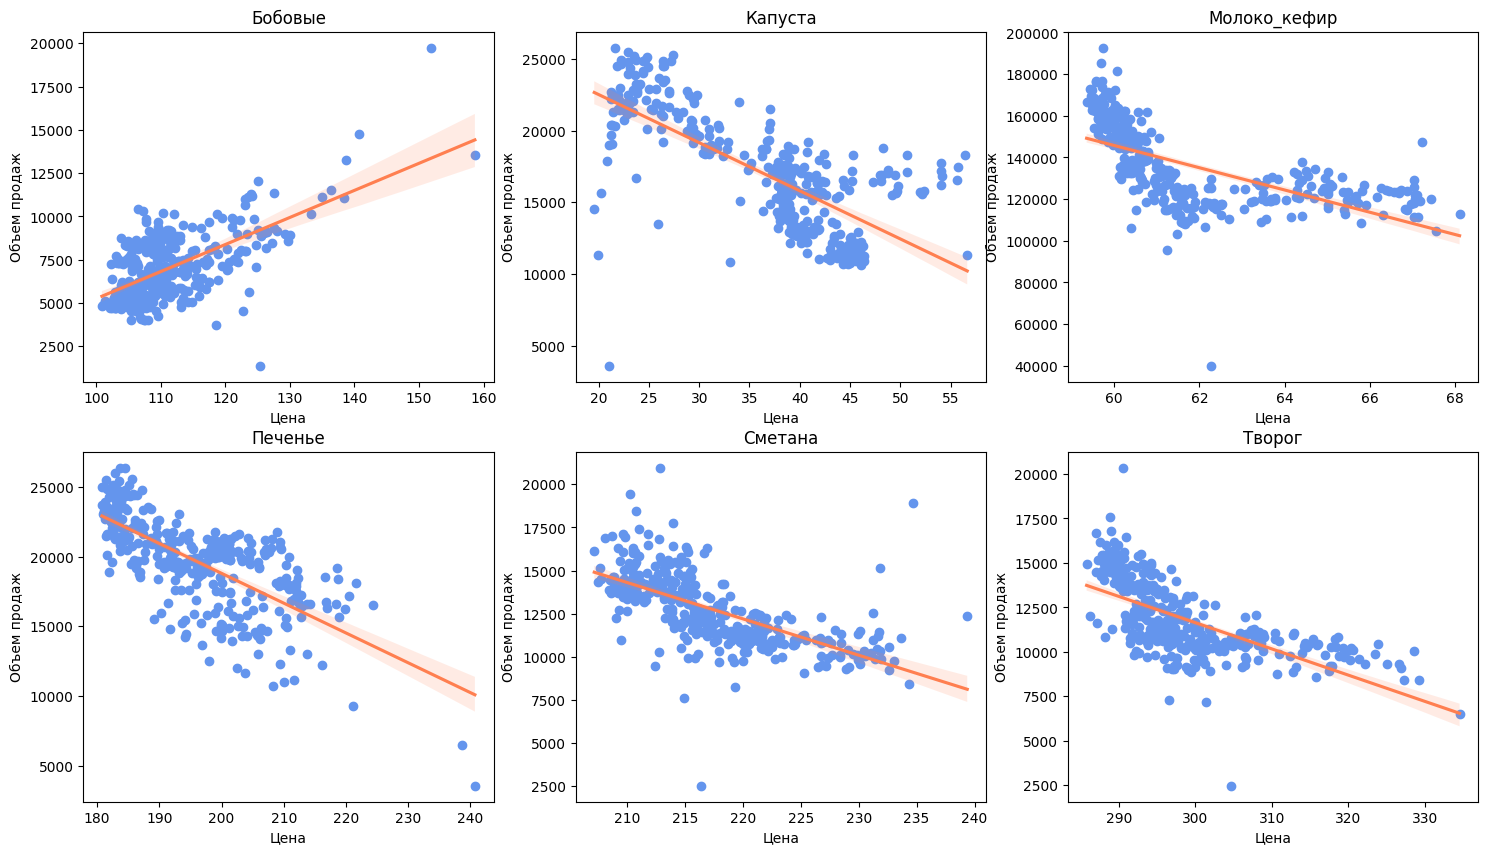

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# перебираем категории и соответствующие данные
for i, (category, data) in enumerate(df_grouped.groupby('category')):
    # определение текущей оси
    ax = axs[i//3, i%3]

    # построение точечного графика на текущей оси
    ax.scatter(data['price_per_unit'], data['quantity'], color='cornflowerblue')

    # построение линии регрессии
    sns.regplot(x='price_per_unit', y='quantity', data=data, scatter=False, ax=ax, color='coral')

    # задание заголовка и меток осей для текущей оси
    ax.set_title(category)
    ax.set_xlabel('Цена')
    ax.set_ylabel('Объем продаж')

# отображение графиков
plt.show()

<font color='green'>На этих графиках можно заметить наличие выбросов, которые могут искажать результат, например, на бобовые. В категории молоко_кефир наблюдается цикличность. Таким образом, при необходимости, надо смотреть на другие признаки, напримрер, сезон

<font color='green'>Корреляция по Регионам:

In [ ]:
# За 2021 год
grouped_reg = df[df['date'].dt.year == 2021].groupby(['region_name', 'date'])[['price_per_unit', 'quantity']].mean()

In [ ]:
corr_reg = grouped_reg.groupby('region_name').corr(method='spearman').iloc[0::2,-1].sort_values()
corr_reg.head(40)

region_name                                     
Республика Карелия                price_per_unit   -0.73
Пензенская область                price_per_unit   -0.72
г. Севастополь                    price_per_unit   -0.71
Кировская область                 price_per_unit   -0.68
Архангельская область             price_per_unit   -0.65
Вологодская область               price_per_unit   -0.64
Новгородская область              price_per_unit   -0.64
Чувашская Республика - Чувашия    price_per_unit   -0.62
Челябинская область               price_per_unit   -0.62
Республика Татарстан (Татарстан)  price_per_unit   -0.60
Сахалинская область               price_per_unit   -0.58
Забайкальский край                price_per_unit   -0.58
Удмуртская Республика             price_per_unit   -0.58
Краснодарский край                price_per_unit   -0.58
Владимирская область              price_per_unit   -0.58
Смоленская область                price_per_unit   -0.58
Республика Бурятия                price

In [ ]:
corr_reg.tail(44)

region_name                                             
Амурская область                          price_per_unit   -0.47
Орловская область                         price_per_unit   -0.46
Кемеровская область - Кузбасс             price_per_unit   -0.46
Калужская область                         price_per_unit   -0.45
Омская область                            price_per_unit   -0.45
г. Санкт-Петербург                        price_per_unit   -0.45
Республика Мордовия                       price_per_unit   -0.45
Астраханская область                      price_per_unit   -0.44
Республика Саха (Якутия)                  price_per_unit   -0.44
Томская область                           price_per_unit   -0.44
Тверская область                          price_per_unit   -0.43
Республика Хакасия                        price_per_unit   -0.43
Самарская область                         price_per_unit   -0.42
Хабаровский край                          price_per_unit   -0.42
Новосибирская область            

## <font color='orange'>Ранжирование

<font color='green'>Произведу ранжирование товаров и регионов по динамике продаж за последний год. Будет полезно для идентификации наиболее динамичных категорий. Для этого можно сравнить объем продаж в последний год с общим объемом продаж за три года и вычислить процентный прирост или уменьшение. У товаров или региона с наибольшим приростом будет выше рейтинг.

<font color='green'>Товар

In [ ]:
total = df.groupby('category')['quantity'].sum().reset_index()
last = df[df['date'].dt.year == 2021].groupby('category')['quantity'].sum().reset_index()
total['last_sales'] = last['quantity']

In [ ]:
# процентный прирост или уменьшение продаж за последний год
total['sales_growth'] = (total['last_sales'] - total['quantity']/3) / (total['quantity']/3) * 100

In [ ]:
# сортировка и присваивание ранга
ranked_sum = total.sort_values('sales_growth', ascending=False)
ranked_sum['rank_sum'] = range(1, len(ranked_sum)+1)

In [ ]:
ranked_sum

category       quantity    last_sales  sales_growth  rank_sum
0               Баранина    12274586.90    5506053.78         34.57         1
2               Говядина   233402357.56   96059501.27         23.47         2
18             Рыба_свеж   154060435.75   61804285.28         20.35         3
23                  Соль   744769301.93  290576406.90         17.05         4
10       Масло_сливочное   522630139.60  201867184.59         15.88         5
25                   Сыр  1223017628.95  471749344.36         15.72         6
21                Сельдь   268505372.08  103538768.83         15.68         7
16          Прочие_овощи  1910225041.14  721687236.91         13.34         8
20               Свинина  1359726536.90  508462183.71         12.18         9
15               Печенье  1627268825.66  601904340.23         10.97        10
7               Макароны  2997243408.39 1107800443.42         10.88        11
12                  Мука  1977588183.65  719140604.96          9.09        12
5              Картофель  3913715807.04 1415899880.09          8.53        13
13            Мясо_птицы  5530061035.94 1991156166.45          8.02        14
14       Огурцы_помидоры  2961936985.75 1061174926.91          7.48        15
27                Фрукты  7277634184.60 2607005572.80          7.47        16
17                   Рис   837800208.59  299688749.76          7.31        17
28                  Хлеб  8224371997.28 2939916968.07          7.24        18
26                Творог  1014132300.75  361742994.00          7.01        19
6                Конфеты  1428000608.97  509067793.50          6.95        20
22               Сметана  1096710804.18  390697039.46          6.87        21
4                Капуста  1435857924.76  511507185.49          6.87        22
9   Масло_раститительное  1987057031.05  706867415.73          6.72        23
8          Маргарин_жиры    59977030.57   21280445.29          6.44        24
11          Молоко_кефир 11792316047.85 4176246578.96          6.24        25
3           Другие крупы  1831296357.51  638105728.66          4.53        26
19                 Сахар  4047241480.80 1402186169.98          3.94        27
24   Столовые_корнеплоды  1568669976.25  540752423.07          3.42        28
1                Бобовые   622322067.52  210989385.50          1.71        29

<font color='green'>Регионы

In [ ]:
total_reg = df.groupby('region_name')['quantity'].sum().reset_index()
last = df[df['date'].dt.year == 2021].groupby('region_name')['quantity'].sum().reset_index()
total_reg['last_sales'] = last['quantity']

In [ ]:
# среднегодовой процентный прирост или уменьшение продаж за последний год
# разница между прошлым объемом продаж и текущем, деленное на прошлый объем продаж и умножить на 100
# делим на количество периодов, прошедших между двумя измерениями продаж
total_reg['sales_growth'] = (total_reg['last_sales'] - total_reg['quantity']/3) / (total_reg['quantity']/3) * 100

In [ ]:
# сортировка и присваивание ранга
ranked_region = total_reg.sort_values('sales_growth', ascending=False)
ranked_region['rank_sum'] = range(1, len(ranked_region)+1)

In [ ]:
ranked_region

region_name      quantity    last_sales  sales_growth  \
56               Республика Тыва   31217849.11   16795888.81         61.41   
46           Республика Дагестан   48505023.84   23594442.72         45.93   
83                г. Севастополь  148075990.46   71462522.99         44.78   
50               Республика Крым  563642424.65  251215862.52         33.71   
42    Республика Адыгея (Адыгея)  180895180.50   79454418.22         31.77   
..                           ...           ...           ...           ...   
48            Республика Карелия  370735512.60  124245359.36          0.54   
10  Еврейская автономная область   47350457.35   15724045.50         -0.38   
30            Мурманская область  383636130.38  127191455.00         -0.54   
82            г. Санкт-Петербург 3386225460.99 1121346475.13         -0.66   
31     Ненецкий автономный округ   11867665.23    3883251.78         -1.84   

    rank_sum  
56         1  
46         2  
83         3  
50         4  
42         5  
..       ...  
48        80  
10        81  
30        82  
82        83  
31        84  

[84 rows x 5 columns]

In [ ]:
fig = px.bar(ranked_region, x = 'region_name', y = 'sales_growth',
             title = 'Процентный прирост объема продаж по регионам',
             labels = {'region_name': 'Регион', 'sales_growth': '% прироста'}, width=1200, height=900)
fig.update_layout(xaxis_tickangle=270)
fig.show()

## <font color='orange'>Кластеризация

<font color='green'>Можно создать кластеры регионов и товарных групп с подобными характеристиками и использовать эти данные для прогнозирования продаж в будущем или планировании ценовой политики или управления товарными запасами

<font color='green'>* Регионы

In [ ]:
# выбираю нужные данные
regions = df.groupby(['region', 'region_name'])[['quantity', 'weighted_cpi']].mean().reset_index()
claster_regions = regions.merge(population, how='left', left_on='region', right_on='code')\
                          [['region_name', 'quantity', 'avg_population', 'weighted_cpi', 'rating']]

In [ ]:
# Выбросы в объеме реализации
q1 = claster_regions['quantity'].quantile(0.25)
q3 = claster_regions['quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
quantity_outliers = [x for x in claster_regions['quantity'] if x < lower_bound or x > upper_bound]

quantity_outliers

[84995.30770663563,
 202567.4463333753,
 80228.67252883707,
 214066.58901488216,
 106538.68175780267]

In [ ]:
# Выбросы в численности населения
q1 = claster_regions['avg_population'].quantile(0.25)
q3 = claster_regions['avg_population'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
population_outliers = [x for x in claster_regions['avg_population'] if x < lower_bound or x > upper_bound]

population_outliers

[5825209, 8568355, 13056333, 5603201]

In [ ]:
# Выбросы в cpi
q1 = claster_regions['weighted_cpi'].quantile(0.25)
q3 = claster_regions['weighted_cpi'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
cpi_outliers = [x for x in claster_regions['weighted_cpi'] if x < lower_bound or x > upper_bound]

cpi_outliers

[7589.065448598621,
 7050.718622598734,
 6864.466175416255,
 7799.225777309223,
 9003.582658530227,
 7428.479729221688,
 7828.52709375546,
 11337.942615400034]

<font color='green'>выбросы представляют собой реальные данные, их удаление может привести к потере информации и снижению точности модели

In [ ]:
X = claster_regions[['quantity', 'avg_population', 'rating', 'weighted_cpi']]

In [ ]:
# стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

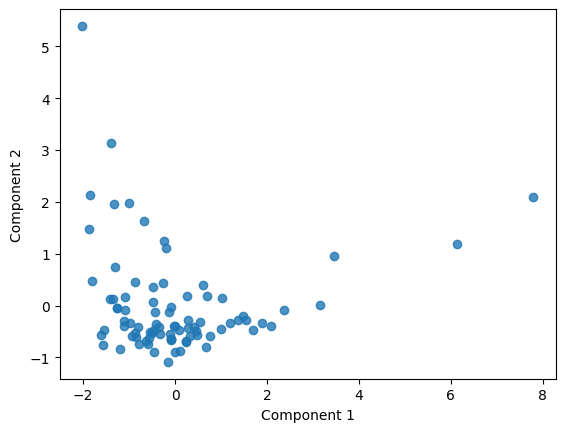

In [ ]:
# применение метода главных компонент для снижения размерности данных до 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# отображение данных на графике
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.8)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

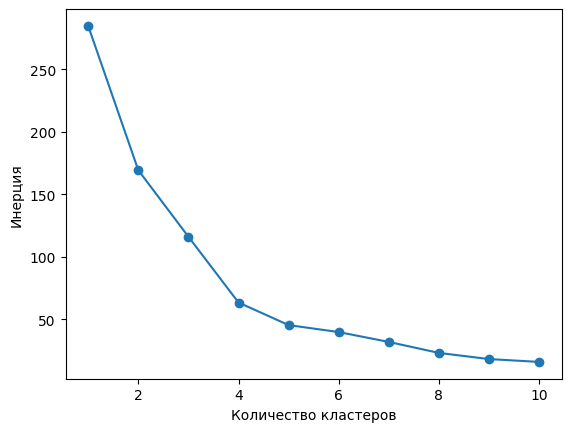

In [ ]:
# определение количества кластеров
inertias = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# построение графика метода локтя
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [ ]:
# модель кластеризации для трех кластеров
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# обучение модели на данных
kmeans.fit(X_scaled)

# добавление меток кластеров в датафрейм
claster_regions['cluster'] = kmeans.labels_

# вывод результатов кластеризации
print(claster_regions.groupby('cluster')[['quantity', 'avg_population',  'weighted_cpi',  'rating']].mean())

         quantity  avg_population  weighted_cpi  rating
cluster                                                
0        17896.20      1273810.45       5166.18   46.17
1        90805.13      5384724.55       5431.19   10.00
2         5974.76       603491.33       7967.89   55.11


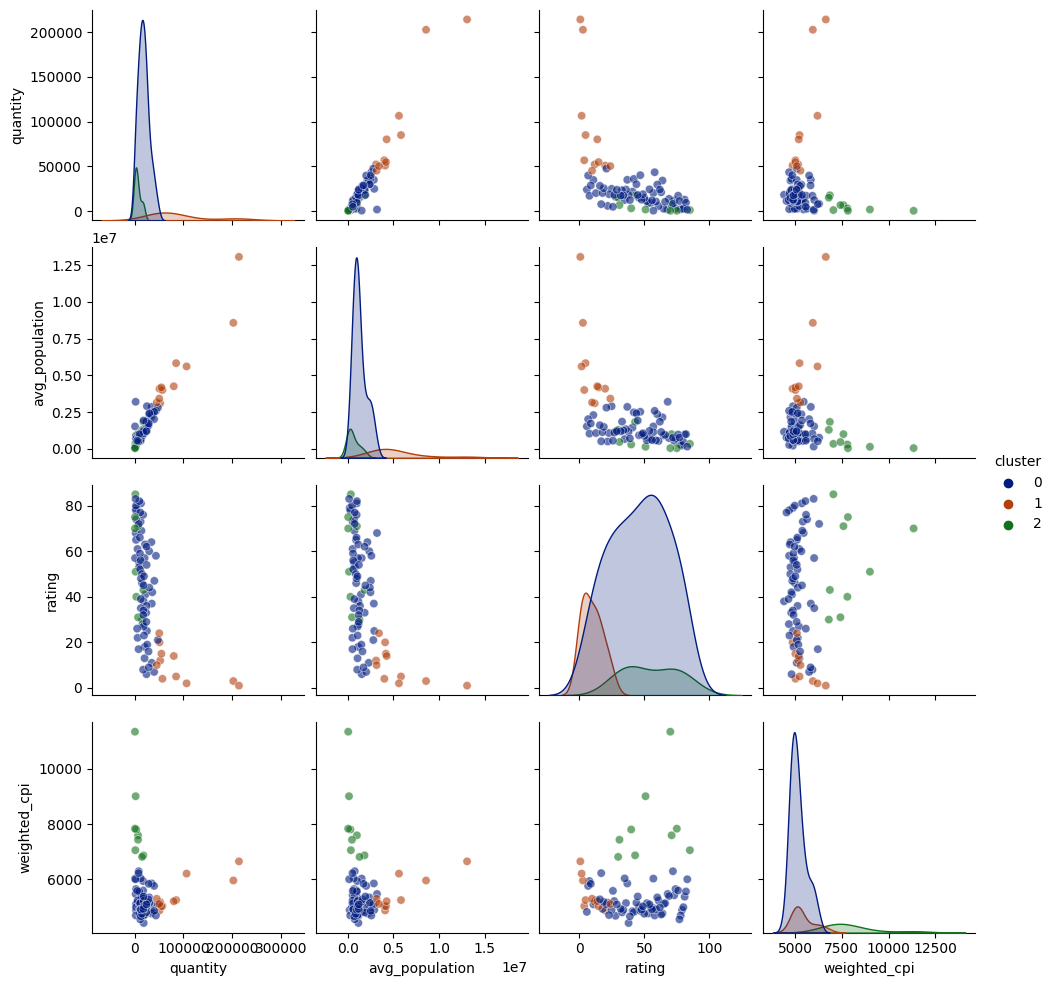

In [ ]:
sns.pairplot(claster_regions, vars=X.columns, hue="cluster", palette="dark", diag_kind="kde", plot_kws={'alpha': 0.6}, height=2.5)

plt.show()

<font color='green'>Модель неплохо делит на два кластера по признакам: численность населения - cpi, численность населения - объем реализации, объем реализаци - cpi, численность и рейтинг. При делении на три кластера наблюдаются значительные пересечения

In [ ]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.43944749770698216


<font color='green'>значения Silhouette Score могут говорить о том, что  кластеризация имеет средний уровень качества, но все еще есть значительные перекрывающиеся области между кластерами. Считаю, что это недостаток количества наблюдений

<font color='green'>* Товары

In [ ]:
# выбираю нужные данные
products = df.groupby('category')[['quantity', 'price_per_unit']].mean().reset_index()

In [ ]:
# Выбросы в объеме реализации
q1 = products['quantity'].quantile(0.25)
q3 = products['quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
quantity_outliers = [x for x in products['quantity'] if x < lower_bound or x > upper_bound]

quantity_outliers

[128117.46735601839, 79053.16298718228, 89337.08448055615]

<font color='green'>по аналогии с регионами, не удаляю выбросы, т.к они представляют собой реальные данные

<Axes: xlabel='price_per_unit', ylabel='quantity'>

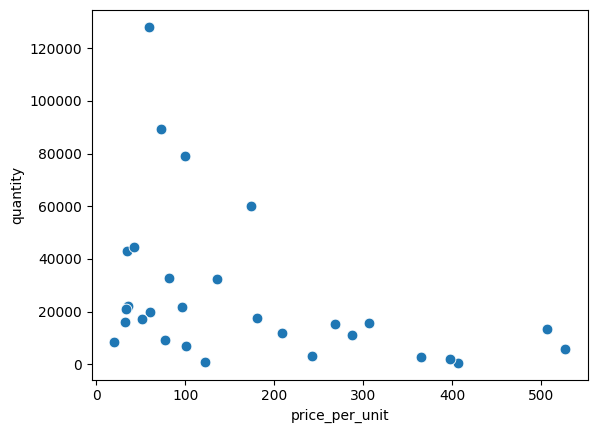

In [ ]:
sns.scatterplot(products, x='price_per_unit', y='quantity', s=60)

In [ ]:
X = products[['quantity', 'price_per_unit']]

In [ ]:
# стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

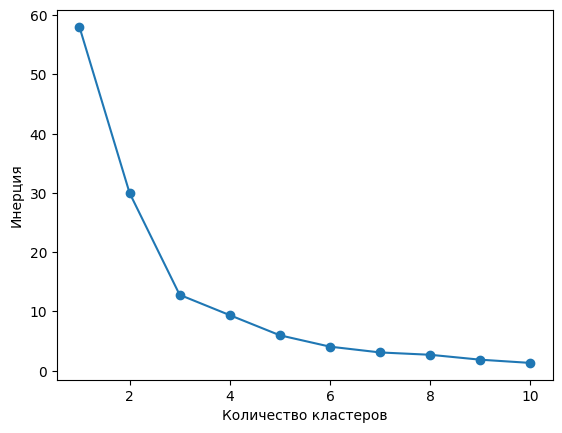

In [ ]:
# определение количества кластеров
inertias = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# построение графика метода локтя
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [ ]:
# модель кластеризации для двух кластеров
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)

# обучение модели на данных
kmeans.fit(X_scaled)

# добавление меток кластеров в датафрейм
products['cluster'] = kmeans.labels_

# вывод результатов кластеризации
print(products.groupby('cluster')[['quantity', 'price_per_unit']].mean())

         quantity  price_per_unit
cluster                          
0         8120.44          351.72
1        35238.30           79.39


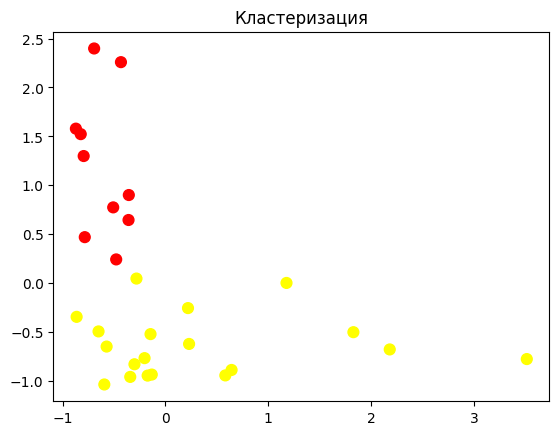

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=products['cluster'], s=60)
plt.title('Кластеризация')

plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4688521868367978


<font color='green'>кластеры достаточно хорошо разделены друг от друга, однако есть некоторое перекрытие между кластерами. Скорее всего, при обучении модели на большем количестве наблюдений, результат будет лучше

## <font color='orange'>Подготовка дашборда

### <font color='orange'>Графики

In [ ]:
# Общая сумма продаж за три года
value = df.groupby([df['date'].dt.year, 'region_name'])['quantity'].sum().reset_index().\
                       sort_values(by=['date', 'quantity'])
fig_value_sum = px.bar(value, x='date', y='quantity', color='region_name', title='Объем продаж за три года',
                                labels = {'date': '', 'quantity': 'кг, л', 'region_name': 'Регион'})
fig_value_sum.update_layout(xaxis=dict(tickmode='linear'))

for i in range(len(value['date'].unique())):
    year = value['date'].unique()[i]
    total_sales_year = sum(value[value['date']==year]['quantity'])
    fig_value_sum.add_annotation(x=year, y=total_sales_year, \
                                 text=str(round(total_sales_year/1000000000, 2))+'млн. тн', showarrow=False, font=dict(size=12), yshift=20)

fig_value_sum.show()

In [ ]:
# Динамика продаж
value_dinamic = df.groupby('month_year')['quantity'].sum().reset_index()
fig_dinamic_sum = px.line(value_dinamic, x='month_year', y='quantity', title='Динамика продаж',\
                          labels = {'month_year': '', 'quantity': 'кг, л'})


fig_dinamic_sum.show()

In [ ]:
# Динамика продаж по регионам
value_dinamic = df.groupby(['month_year', 'region_name'])['quantity'].sum().reset_index()
fig_dinamic_region = px.line(value_dinamic, x='month_year', y='quantity',  color='region_name', title='Динамика суммы продаж по регионам',\
                          labels = {'month_year': '', 'quantity': 'кг, л', 'region_name': 'Регион'})


fig_dinamic_region.show()

In [ ]:
# Прирост по регионам
total_reg = df.groupby('region_name')['quantity'].sum().reset_index()
last = df[df['date'].dt.year == 2021].groupby('region_name')['quantity'].sum().reset_index()
total_reg['last_sales'] = last['quantity']

total_reg['sales_growth'] = (total_reg['last_sales'] - total_reg['quantity']/3) / (total_reg['quantity']/3) * 100

ranked_region = total_reg.sort_values('sales_growth', ascending=False)
fig_growth = px.bar(ranked_region, x = 'region_name', y = 'sales_growth', color='region_name',
             title = 'Прирост объема по регионам за 2021 год',
             labels = {'region_name': '', 'sales_growth': '% прироста'}, width=1200, height=800)
fig_growth.update_traces(showlegend=False)
fig_growth.show()

In [ ]:
# корреляция объема и численности населения
value_regions = df[['region', 'region_name', 'district', 'quantity']]
value_regions = value_regions.groupby(['district', 'region', 'region_name'])['quantity'].agg('sum').\
                                          reset_index().sort_values(by='quantity', ascending=False)
regions = value_regions.merge(population, how='left', left_on='region', right_on='code')\
                                  [['region_name', 'quantity', 'avg_population']].sort_values(by='avg_population')

fig_corr = px.scatter(regions, x='avg_population', y='quantity', color='region_name', size='quantity',
                      title='Корреляция между численностью населения и объемом продаж',
                      labels = {'quantity': 'объем', 'avg_population': 'численность населения', 'region_name': 'регион'})
fig_corr.update_traces(showlegend=False)
fig_corr.show()

In [ ]:
# Показатель сезонности в общих продажах
value_season = df.groupby('month_year')['quantity'].mean()
fig_value_season = px.line(value_season, x=value_season.index.month, y=value_season, color=value_season.index.year,
              labels = {'x': '', 'color': 'год', 'y': 'кг, л'})
fig_value_season.update_layout(title='Сезонность в объеме продаж по годам')

month_names = [calendar.month_name[i] for i in range(1, 13)]
fig_value_season.update_xaxes(
    tickvals=list(range(1, 13)),
    ticktext=month_names)

fig_value_season.show()

In [ ]:
# Объем по ФО
value_regions = df.groupby('district')['quantity'].sum().reset_index()
fig_regions_sum = px.scatter(value_regions, x='district', y='quantity', size='quantity', color='district',
             title='Объем продаж по Федеральныи округам',
             labels = {'district': 'Федеральный округ', 'quantity': 'кг, л'})

fig_regions_sum.update_traces(marker=dict(sizemode='diameter'))

fig_regions_sum.update_layout(width=1000, height=800)

for index, row in value_regions.iterrows():
    text = '{:.0f}M'.format(row['quantity'] / 1_000_000)
    fig_regions_sum.add_annotation(x=row['district'], y=row['quantity'], text=text,
                                    showarrow=False, font=dict(size=12))
fig_regions_sum.show()


In [ ]:
# Средний чек
cpi_region = df.groupby('region_name')['weighted_cpi'].mean().sort_values(ascending=False)
fig_cpi_region = px.bar(cpi_region, x=cpi_region.index, y=cpi_region.values, color=cpi_region.index,
             title='Размер среднего чека в регионах',
             labels = {'region_name': 'Регион', 'y': 'руб', 'x': ''}, width=1200, height=700)
fig_cpi_region.update_traces(showlegend=False)
fig_cpi_region.show()


In [ ]:
# Категории
value_category = df.groupby(['category'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
fig_category_sum = px.bar(value_category, x='quantity', y='category', color='category',
             title='Рейтинг товарных категорий по объему продаж',
             labels = {'category': '', 'quantity': 'кг, л'})
fig_category_sum.update_traces(showlegend=False)
fig_category_sum.show()

In [ ]:
# Доли категорий
value_category['fraction'] = value_category['quantity'] / value_category['quantity'].sum()
fig_fraction = px.pie(value_category, values='quantity', names='category',
             title='Доля каждой категории и в общем объеме',
             hover_data=['fraction'])
# fig_fraction.update_layout(width=800, height=600)

fig_fraction.show()

In [ ]:
# Средняя цена продукта в регионах
mean_prices = df.groupby(['district', 'category'])['price_per_unit'].mean().reset_index().\
            sort_values(by=['price_per_unit'], ascending=False)
fig_mean_prices = px.bar(mean_prices, x='category', y='price_per_unit', color='district', barmode='group',
                         title='Средняя цена категорий товаров в Федеральных округах',
                         labels = {'district': 'Федеральный огруг', 'category': '', 'price_per_unit': 'цена' })
fig_mean_prices.show()

In [ ]:
# расчет изменения цен по каждой категории товаров с учетом изменения за каждый день в течение трех лет
grouped  = pd.DataFrame(df.groupby(['category', 'date'])['price_per_unit'].mean().reset_index())
grouped['date'] = pd.to_datetime(grouped['date'], format='%Y.%m.%d')

grouped['pct_change'] = grouped.groupby('category')['price_per_unit'].pct_change(periods=1095)

pct_change_category = grouped.groupby('category')['pct_change'].sum().sort_values(ascending=False).reset_index()

fig_change_category = px.bar(pct_change_category, x = 'category', y ='pct_change', color='category',
             title = 'Изменения цен по группам товаров %',
             labels = {'pct_change': '% изменения', 'category': '', 'color': 'Группа товаров'},
             hover_data={'pct_change':':.0%'})
fig_change_category.update_traces(showlegend=False)
fig_change_category.show()

### <font color='orange'>Дашборд

In [ ]:
!pip install jupyter-dash plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


In [ ]:
import dash
import dash_core_components as dcc
# import dash_html_components as html
from dash import html
from jupyter_dash import JupyterDash

In [ ]:
app = JupyterDash(__name__)

app.layout = html.Div(children=[
  html.H1(children='Анализ цен и объемов реализации продуктовых товаров'),

  html.Div(children='''
      Сведения о средних ценах и объемах реализации групп продовольственных товаров в субъектах РФ за 2019 год – истекший период 2021 года,
      полученные в результате обработки первичных административных данных об операциях на контрольно-кассовой технике (ККТ).
  '''),
  html.Div([
      html.Div([
          dcc.Graph(id='graph-1a', figure=fig_value_sum),
      ], className='six columns', style={'display': 'inline-block'}),

      html.Div([
          dcc.Graph(id='graph-1b', figure=fig_dinamic_sum)
      ], className='six columns', style={'display': 'inline-block'})
  ], className='row', style={'width': '100%'}),
    dcc.Graph(
        id='graph-2',
        figure=fig_dinamic_region
    ),
    dcc.Graph(
        id='graph-3',
        figure=fig_growth
    ),
  html.Div([
        dcc.Graph(id='graph-4a', figure=fig_corr),
    ], className='six columns', style={'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='graph-4b', figure=fig_value_season)
    ], className='six columns', style={'display': 'inline-block'}),
    dcc.Graph(
        id='graph-5',
        figure=fig_regions_sum
    ),
    dcc.Graph(
        id='graph-6',
        figure=fig_cpi_region
    ),
    html.Div([
        dcc.Graph(id='graph-7a', figure=fig_category_sum),
    ], className='six columns', style={'display': 'inline-block'}),

    html.Div([
        dcc.Graph(id='graph-7b', figure=fig_fraction)
    ], className='six columns', style={'display': 'inline-block'}),
    dcc.Graph(
        id='graph-8',
        figure=fig_mean_prices
    ),
    dcc.Graph(
        id='graph-9',
        figure=fig_change_category
    ),

  ], className='row', style={'width': '100%'})


# if __name__ == '__main__':
#     app.run_server(mode='inline') # выводит дашборд в текущей ячейке

if __name__ == '__main__':
   app.run_server(debug=False, port=8050) # получение ссылки, чтобы открыть в новой вкладке браузера (Dash app running on:   )

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [09/Jun/2023 08:04:14] "GET /_alive_c2491780-65de-4af1-9d9a-ef8052c8dbda HTTP/1.1" 200 -


Dash app running on:


<IPython.core.display.Javascript object>